In [1]:
import pandas as pd 
#pd.set_option('compute.use_numexpr', False)
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import gzip
import yaml
import requests
import csv
import re
from tqdm import tqdm
from itertools import product
import json
import pickle
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [2]:
import pandas as pd 
#pd.set_option('compute.use_numexpr', False)
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import gzip

import csv
import pandas as pd 
import numpy as np 
from collections import defaultdict
import re
import sys
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
import time
import numpy as np
from pprint import pprint

import spacy  # For preprocessing
import nltk
import string

import preprocessor as p  #pip install tweet-preprocessor
import logging  # Setting up the loggings to monitor gensim
from nltk.stem import WordNetLemmatizer
from string import punctuation as punc

import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.models as gsm
from gensim.test.utils import datapath

import regex


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision.transforms as transforms
from torch.autograd import Variable

torch.manual_seed(1)

/Users/tunaz/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
# # ### Load propublica data
# propub = pd.read_csv( 'data/en-US',low_memory=False) #(28189, 6)

# propub.head(10) #852799 rows × 11 columns

# # import zipfile

# # zf = zipfile.ZipFile('data/en-US.zip') 
# # # if you want to see all files inside zip folder
# # zf.namelist() 
# # # now read your csv file 
# # df = pd.read_csv(zf.open('data/en-US.csv'))


In [4]:
# ### Load predicted fb all (predicted_fb_all) 0.8 million
predicted_fb_all = pd.read_csv( 'data/predicted_all_para.csv',low_memory=False) #(28189, 6)

predicted_fb_all #852799 rows × 11 columns




,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0
3,653784258879707,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001443', 'age': '18-24', 'g...",3,2,2
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
852794,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0
852795,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0
852796,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0
852797,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0


In [5]:
predicted_fb_all.tail(150) 

#Club for Growth Action #C #American Potential Fund#C
#The Lincoln Project #L #Committee to Protect Medicare#L #United We Dream Action#L




,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
852649,387796429015109,"I know Joe Biden, and I know he’ll make a grea...",BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,4,0
852650,398711548182833,"I know Joe Biden, and I know he’ll make a grea...",BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '1', 'age': '35-44', 'gender':...",0,4,0
852651,743152116276601,Esta elección es la más importante elección de...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.004545', 'age': '55-64', 'g...",3,-1,0
852652,796787941114767,We have to vote for Joe Biden in numbers that ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001079', 'age': '45-54', 'g...",0,3,0
852653,1227019391015703,"I know Joe Biden, and I know he’ll make a grea...",BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.025641', 'age': '45-54', 'g...",0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
852794,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0
852795,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0
852796,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0
852797,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0


## Qualitative analysis using 50 unbias funding entities 

In [1061]:
top_fe = pd.read_csv( 'data/top_50_fe_updated.csv',low_memory=False) #(28189, 6)

In [516]:
top = top_fe.loc[(top_fe['funding_entity'] == 'American Potential Fund')]#
top
top.to_csv('data/aba.csv', line_terminator='\r\n', encoding='utf-8', index = False) 

In [487]:


#for accuracy with entity level prediction
count_pp = 0
pb = 0
pt = 0
ab = 0
at = 0
ns = 0
for i in range (0, top_fe.shape[0]):
    if top_fe['funding_entity'][i] == 'American Potential Fund':
        if top_fe.pred_stance[i] == 0:
            pb = pb + 1
        elif top_fe.pred_stance[i] == 1:
            pt = pt + 1
        elif top_fe.pred_stance[i] == 2:
            ab = ab + 1
        elif top_fe.pred_stance[i] == 3:
            at = at + 1
        else:
            ns = ns + 1
        
print(pb , pt, ab, at, ns)   





0 0 0 4 0


In [1240]:
### Issue distribution over 2 bias funding entities
fe_issue = predicted_fb_all.loc[(predicted_fb_all['funding_entity'] == 'BIDEN FOR PRESIDENT') | 
                      (predicted_fb_all['funding_entity'] == 'DONALD J. TRUMP FOR PRESIDENT, INC.')]

fe_issue.reset_index(inplace=True) # Resets the index, makes factor a column

fe_issue

,index,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
0,11,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,2
1,12,706934070204471,“From COVID-19 to the environment to racial ju...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '900', 'upper_bound': '999'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001595', 'age': '55-64', 'g...",3,2,0
2,13,400390437669186,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '900', 'upper_bound': '999'}","[{'percentage': '1', 'region': 'North Carolina'}]","[{'percentage': '0.056253', 'age': '65+', 'gen...",3,4,2
3,14,3234369906690043,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '15000', 'upper_bound': '19999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '1', 'region': 'Michigan'}]","[{'percentage': '0.001843', 'age': '55-64', 'g...",3,4,2
4,15,281430079797096,"“Today, we call on Free Press readers to suppo...",BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '900', 'upper_bound': '999'}","[{'percentage': '1', 'region': 'Michigan'}]","[{'percentage': '0.001359', 'age': '65+', 'gen...",3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283405,852745,961950977647142,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.079463', 'region': 'Arizona...","[{'percentage': '0.000676', 'age': '45-54', 'g...",3,3,2
283406,852746,1582949411913883,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.06932', 'region': 'Arizona'...","[{'percentage': '0.00212', 'age': '45-54', 'ge...",3,3,2
283407,852747,2782079008739433,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.062943', 'region': 'Arizona...","[{'percentage': '0.000259', 'age': '65+', 'gen...",3,3,2
283408,852748,2800349690183550,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-27,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.055379', 'region': 'Arizona...","[{'percentage': '0.001044', 'age': '35-44', 'g...",3,3,2


In [145]:
fe_issue['ad_creative_body'].nunique()

1226

In [1243]:
### Issue distribution over 2 non-bias funding entities

fe_issue = top_fe.loc[(top_fe['funding_entity'] == 'Independence USA PAC') | 
                      (top_fe['funding_entity'] == 'American Potential Fund')]


# fe_issue = top_fe.loc[(top_fe['funding_entity'] == 'Union 2020') | 
#                       (top_fe['funding_entity'] == 'America First Action')]




fe_issue.reset_index(inplace=True) # Resets the index, makes factor a column

fe_issue

,index,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
0,15,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1,2
1,16,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1,2
2,17,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4,2
3,18,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8,2
4,19,357617868835725,Don’t let Donald Trump raise the cost of presc...,Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008', 'region': 'Alabama'},...","[{'percentage': '0.008028', 'age': '25-34', 'g...",3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,23876,348252053094503,"""Candidate Biden claims that he was in charge ...",American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.043617', 'region': 'Alabama...","[{'percentage': '0.031915', 'age': '35-44', 'g...",2,1,0
9074,23877,752149412032959,"""On May 13, 2017, I received an email concerni...",American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.041009', 'region': 'Alabama...","[{'percentage': '0.003155', 'age': '18-24', 'g...",2,6,0
9075,23878,1780071658825495,"""On May 13, 2017, I received an email concerni...",American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.043321', 'region': 'Alabama...","[{'percentage': '0.001203', 'age': '25-34', 'g...",2,6,0
9076,23879,3731603070240022,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.033129', 'region': 'Alabama...","[{'percentage': '0.003681', 'age': '65+', 'gen...",2,9,2


In [1358]:

ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
for j in range (0, fe_issue.shape[0] ):
    list_dic = eval(fe_issue['region_distribution'][j])
    #print (list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        #if dic['region'] == 'Alabama':
        #if dic['region'] == 'Alabama' or dic['region'] == 'Idaho' or dic['region'] == 'Wyoming': # 3 red
        if dic['region'] == 'California' or dic['region'] == 'New York' or dic['region'] == 'Oregon': # 3 blue
        #if dic['region'] == 'California' or dic['region'] == 'New York' or dic['region'] == 'Illinois' or dic['region'] == 'Minnesota' or dic['region'] == 'Vermont' or dic['region'] == 'Oregon' : #6 blue states
        #if dic['region'] == 'Alabama' or dic['region'] == 'Idaho' or dic['region'] == 'Wyoming' or dic['region'] == 'Kansas' or dic['region'] == 'Arkansas' or dic['region'] == 'Oklahoma' : #6 red states
        #if  dic['region'] == 'Pennsylvania': #'Pennsylvania': #we checked for Alabama(c), Florida(s) in the paper
            ad_id.append(fe_issue.id[j])
            text.append(fe_issue.ad_creative_body[j])
            fe.append(fe_issue.funding_entity[j])
            start.append(fe_issue.ad_delivery_start_time[j])
            stop.append(fe_issue.ad_delivery_stop_time[j])
            imp.append(fe_issue.impressions[j])
            spend.append(fe_issue.spend[j])
            region.append(fe_issue.region_distribution[j])
            demo.append(fe_issue.demographic_distribution[j])
            stance_p.append(fe_issue.pred_stance[j])
            issue_p.append(fe_issue.pred_issue[j])

In [1359]:
state_fe_issue = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            })
state_fe_issue

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1
1,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1
2,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1
3,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1
4,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1
...,...,...,...,...,...,...,...,...,...,...,...
315,3731603070240022,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.033129', 'region': 'Alabama...","[{'percentage': '0.003681', 'age': '65+', 'gen...",2,9
316,3731603070240022,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.033129', 'region': 'Alabama...","[{'percentage': '0.003681', 'age': '65+', 'gen...",2,9
317,338839017416246,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.034667', 'region': 'Alabama...","[{'percentage': '0.002667', 'age': '55-64', 'g...",2,9
318,338839017416246,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.034667', 'region': 'Alabama...","[{'percentage': '0.002667', 'age': '55-64', 'g...",2,9


In [1360]:

#state_fe_issue['ad_creative_body'].nunique()

#one_state_fe = state_fe_issue.loc[(state_fe_issue['funding_entity'] == 'Independence USA PAC')]
#one_state_fe = state_fe_issue.loc[(state_fe_issue['funding_entity'] == 'Union 2020')]
#one_state_fe


one_state_fe = state_fe_issue.loc[(state_fe_issue['funding_entity'] == 'American Potential Fund')]
one_state_fe

# fe_issue = top_fe.loc[(top_fe['funding_entity'] == 'Independence USA PAC') | 
#                       (top_fe['funding_entity'] == 'American Potential Fund')]



# 
#                       (predicted_fb_all['funding_entity'] == 'DONALD J. TRUMP FOR PRESIDENT, INC.')
# (state_fe_issue['funding_entity'] == 'BIDEN FOR PRESIDENT')


# top_fe.loc[(top_fe['funding_entity'] == 'Union 2020') | 
#                       (top_fe['funding_entity'] == 'America First Action')]



,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
29,682662292364649,"Joe Biden: ""If I'm President...Charter Schools...",American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.03433', 'region': 'Alabama'...","[{'percentage': '0.002215', 'age': '65+', 'gen...",2,5
30,682662292364649,"Joe Biden: ""If I'm President...Charter Schools...",American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.03433', 'region': 'Alabama'...","[{'percentage': '0.002215', 'age': '65+', 'gen...",2,5
31,682662292364649,"Joe Biden: ""If I'm President...Charter Schools...",American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.03433', 'region': 'Alabama'...","[{'percentage': '0.002215', 'age': '65+', 'gen...",2,5
32,288256962241026,"Joe Biden: ""If I'm President...Charter Schools...",American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.021786', 'region': 'Alabama...","[{'percentage': '0.004357', 'age': '55-64', 'g...",2,5
33,288256962241026,"Joe Biden: ""If I'm President...Charter Schools...",American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.021786', 'region': 'Alabama...","[{'percentage': '0.004357', 'age': '55-64', 'g...",2,5
...,...,...,...,...,...,...,...,...,...,...,...
315,3731603070240022,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.033129', 'region': 'Alabama...","[{'percentage': '0.003681', 'age': '65+', 'gen...",2,9
316,3731603070240022,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.033129', 'region': 'Alabama...","[{'percentage': '0.003681', 'age': '65+', 'gen...",2,9
317,338839017416246,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.034667', 'region': 'Alabama...","[{'percentage': '0.002667', 'age': '55-64', 'g...",2,9
318,338839017416246,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.034667', 'region': 'Alabama...","[{'percentage': '0.002667', 'age': '55-64', 'g...",2,9


In [1361]:
## This is for Issue distribution over two non-bias and bias funding entities for specific state
sfei = state_fe_issue.groupby(['pred_issue', 'funding_entity']).agg({'id': 'count'}).unstack()
sfei

id                     
funding_entity American Potential Fund Independence USA PAC
pred_issue                                                 
1                                 84.0                 61.0
3                                  NaN                 12.0
4                                  NaN                 33.0
5                                 36.0                  NaN
6                                 30.0                  NaN
8                                  NaN                 38.0
9                                 26.0                  NaN

In [1362]:
## This is for Issue distribution over two non-bias and bias funding entities for all states
fei = fe_issue.groupby(['pred_issue', 'funding_entity']).agg({'id': 'count'}).unstack()
fei

id                     
funding_entity American Potential Fund Independence USA PAC
pred_issue                                                 
1                                 47.0               2497.0
3                                  NaN                  4.0
4                                  NaN               1124.0
5                                 13.0                  NaN
6                                 10.0                  NaN
8                                  NaN               5362.0
9                                  9.0                  NaN
10                                12.0                  NaN

In [1363]:
#asfe = age_state_fe.groupby(['demographic_distribution', 'funding_entity']).agg({'id': 'count'})

In [1364]:
#type(eval(new_df['region_distribution'][93568])), type(eval(new_df['region_distribution'][93568])[0]), eval(new_df['region_distribution'][93568])[0]

In [1367]:
#new_df = top_fe.loc[top_fe['pred_stance'] == '1'] #top10 pro-trump 38168 (not good)
#new_df = one_state_fe.loc[one_state_fe['pred_issue'] == 1] #covid

new_df = one_state_fe.loc[(one_state_fe['pred_stance'] == 1) | (one_state_fe['pred_stance'] == 2)] #pro-trump, anti-biden
#new_df = one_state_fe.loc[(one_state_fe['pred_stance'] == 0) | (one_state_fe['pred_stance'] == 3)] #pro-biden, anti-trump


In [1368]:
new_df.shape #17179
new_df['ad_creative_body'].unique()

array(['Joe Biden: "If I\'m President...Charter Schools are gone"\n\nPresident Trump: "Education is the Civil Rights issue of our time... I am calling on members of both parties to pass an education bill that funds school choice for disadvantage kids, including millions of African American and Latino children"',
       '"Before President Trump, we [African Americans] were promised so much, but few politicans delivered" - Evangelist Alveda King (MLK\'s Niece)\n\nUnder President Trump:\n\n✅ Lowest Unemployment for Black Americans\n✅ Billions invested into urban communities through Opportunity Zones\n✅ Fully funded Historical Black Colleges',
       '"On May 13, 2017, I received an email concerning allocation of equity of money paid by China 🇨🇳, which says 10% held by H [Hunter] for "The Big Guy" [Joe Biden]" -Tony Bobulinski (Business Parneter of Biden Family and Fmr. Luitenet in U.S. Navy)',
       '"Candidate Biden claims that he was in charge when the 2010 H1N1 Pandemic struck, which 

In [1341]:
text = " ".join(review for review in new_df['ad_creative_body'].str.lower())
#text = " ".join(review.lower() for review in new_df['ad_creative_body'].unique())

#print ("There are {} words in the combination ads.".format(len(text)))

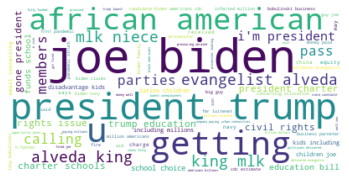

In [1342]:
#!pip install wordcloud
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#get stop words of all languages
#STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
# # Create stopword list:
# stopwords = set(STOPWORDS)
stop_words.update(["would","get","going","across","held","join","make","have","not"
                   "need","know","will","be","is","us","now","tommorow","today","yesterday","take",
                   "sure", "country","state", "county","p","tonight","like","ready","time","tell","midnight","year","month","week","day",
                  "want","three","please","ever","years","months","days","hour","hours","amount","wants",
                   "show","pm","am","need","let","use","used","really","think","new","party","name", "59pm"
                   ])

# stop_words.update(["would","get","going","across","held","join","joe", "biden", "kamala", "harris","make","donald","trump","pence","election","have","not"
#                    "need","know", "november","will","be","is","us","now","tommorow","today","yesterday","take","democrats","democrat","republican", "republicans",
#                    "sure", "country","state", "county","p","tonight","like","ready","time","tell","midnight","year","month","week","day",
#                   "want","three","please","ever","years","months","days","hour","hours","amount","wants","democratic",
#                    "show","pm","am","need","let","contribute","use","used","really","think","new","party","name",
#                    "defeat","vote","bernie","sanders","presidential","president","ballot","campaign","see","donation",
#                    "chip","candidate","moven","org", "senate","donate","one","people","jill","poll","niece","survey","minutes",
#                   "http","trump2020","coin","https","www","trump2020","biden-harris","trump-pence","biden2020","com","moveon",
#                    "conservatecollections",'hat','conservatecollection','conservativecollections.','even','give'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1236]:
#wordcloud.to_file("image/PA_unbias_america_1st.png")
#wordcloud.to_file("image/PA_unbias_union2020.png")
#wordcloud.to_file("image/pres_trump.png")
#wordcloud.to_file("image/pres_biden.png")

## LDA Topic modeling

In [1369]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = new_df.ad_creative_body.values.tolist()
data_words = list(sent_to_words(data))
#print(data_words[:1])
#data_words

In [1370]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 
#                    'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 
#                    'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
#                    'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 
#                    'https','http','www','rt','am','pm','co','com','amp','&','nhttps','amit','late'])

nlp = spacy.load('en_core_web_sm')#python -m spacy download en


In [1371]:
bigram = gensim.models.Phrases(data_words, min_count=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], min_count=5)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
#print(bigram_mod)
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    #print(text)
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    #print(texts)
    texts = [bigram_mod[doc] for doc in texts]
    #print(texts)
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    #print(texts)
    #sys.exit()
    texts_out = []
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    #texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [1374]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 2, 
                                           random_state=100,
                                           #update_every=1,
                                           chunksize=2000,
                                           passes=20,
                                           alpha='auto',
                                           iterations=400,
                                           eval_every = None,
                                           per_word_topics=True)



top_topics = lda_model.top_topics(corpus, topn=10) #top 10 high frequency words of specific topic

from pprint import pprint
pprint(top_topics)

#pprint(lda_model.print_topics())
#> [(0,

[([(0.064672165, 'school'),
   (0.06467006, 'president'),
   (0.06466928, 'education'),
   (0.032560434, 'biden'),
   (0.03256018, 'million'),
   (0.03255972, 'american'),
   (0.03255933, 'kid'),
   (0.03255893, 'party'),
   (0.03255885, 'charter'),
   (0.032558825, 'go')],
  -0.3238490298894337),
 ([(0.05523898, 'biden'),
   (0.037219416, 'fire'),
   (0.028687043, 'american'),
   (0.026788581, 'pay'),
   (0.026788555, 'say'),
   (0.026788533, 'money'),
   (0.02678837, 'joe'),
   (0.024892015, 'get'),
   (0.024891922, 'son'),
   (0.0248918, 'prosecutor')],
  -5.218385904877307)]


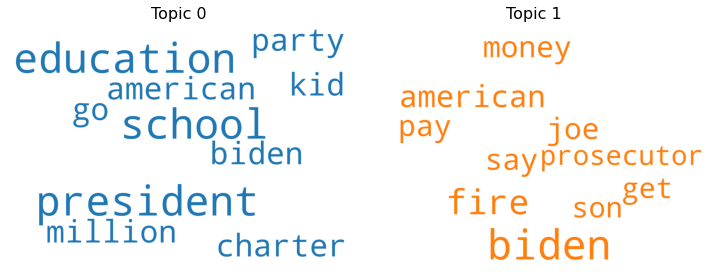

In [1375]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_words=10, formatted=False)

#fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

#plt.savefig("image/apf_in_blue.png") #american potential fund in blue state topic
#plt.savefig("image/iu_in_red.png") #independence usa red topic
plt.show()

## Swing state info for Wisconsin, Pennsylvania

In [29]:
# #Swing state info for Wisconsin, Pennsylvania
# ad_id = []
# stance_p = []
# text = []
# fe = []
# start = []
# stop = []
# imp = []
# spend = []
# region = []
# demo = []
# issue_p = []
# for j in range (0, predicted_fb_all.shape[0] ):
#     dic = eval(predicted_fb_all['region_distribution'][j])[0]
#     if dic['region'] == 'Wisconsin' or dic['region'] == 'Pennsylvania':
#         ad_id.append(predicted_fb_all.id[j])
#         text.append(predicted_fb_all.ad_creative_body[j])
#         fe.append(predicted_fb_all.funding_entity[j])
#         start.append(predicted_fb_all.ad_delivery_start_time[j])
#         stop.append(predicted_fb_all.ad_delivery_stop_time[j])
#         imp.append(predicted_fb_all.impressions[j])
#         spend.append(predicted_fb_all.spend[j])
#         region.append(predicted_fb_all.region_distribution[j])
#         demo.append(predicted_fb_all.demographic_distribution[j])
#         stance_p.append(predicted_fb_all.pred_stance[j])
#         issue_p.append(predicted_fb_all.pred_issue[j])



            

#Only pennsylvania

#Swing state info for Wisconsin, Pennsylvania, Florida, Michighan
ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
impression = []
imp_upper = []
imp_lower = []
spend_upper = []
spend_lower = []
# for j in range (0, predicted_fb_all.shape[0] ):
#     dic = eval(predicted_fb_all['region_distribution'][j])[0]
#     if dic['region'] == 'Pennsylvania' : #'Pennsylvania':
#         ad_id.append(predicted_fb_all.id[j])
#         text.append(predicted_fb_all.ad_creative_body[j])
#         fe.append(predicted_fb_all.funding_entity[j])
#         start.append(predicted_fb_all.ad_delivery_start_time[j])
#         stop.append(predicted_fb_all.ad_delivery_stop_time[j])
#         imp.append(predicted_fb_all.impressions[j])
#         spend.append(predicted_fb_all.spend[j])
#         region.append(predicted_fb_all.region_distribution[j])
#         demo.append(predicted_fb_all.demographic_distribution[j])
#         stance_p.append(predicted_fb_all.pred_stance[j])
#         issue_p.append(predicted_fb_all.pred_issue[j])


for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['region_distribution'][j])
#     list_imp_dic = eval(predicted_fb_all['impressions'][j])
#     list_spend_dic = eval(predicted_fb_all['spend'][j])
#     print (list_dic, list_imp_dic, list_imp_dic['upper_bound'], list_spend_dic, list_spend_dic['lower_bound'])
#     sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Pennsylvania' : #'Pennsylvania':
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            start.append(predicted_fb_all.ad_delivery_start_time[j])
            stop.append(predicted_fb_all.ad_delivery_stop_time[j])
            imp.append(predicted_fb_all.impressions[j])
            spend.append(predicted_fb_all.spend[j])
            region.append(predicted_fb_all.region_distribution[j])
            demo.append(predicted_fb_all.demographic_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])

                                                           
                                                           
# for j in range (0, swing.shape[0] ):
#     list_dic = eval(swing['demographic_distribution'][j])
#     for i in range (0, len(list_dic)):
#         #print(list_dic[i])  
#         dic = list_dic[i]
#         #print(dic['age'] )
#         #sys.exit()
#         if dic['age'] == '13-17' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])

In [30]:
#eval(predicted_fb_all['region_distribution'][0])[0]['region']

In [31]:
swing = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            })

In [32]:
swing #451576 

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2
1,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3
2,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2
3,2507744629528044,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.217391', 'age': '25-34', 'g...",2,3
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4
...,...,...,...,...,...,...,...,...,...,...,...
451571,991508644587877,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008333', 'region': 'Nevada'...","[{'percentage': '0.016667', 'age': '25-34', 'g...",3,6
451572,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10
451573,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10
451574,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10


In [33]:
impression = []

for j in range (0, swing.shape[0] ):
    list_dic = eval(swing['region_distribution'][j])
    #print(list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Pennsylvania' :
            impression.append(dic['percentage'])
#         print(dic)
#         sys.exit()
        
        

In [34]:
len(impression)

451576

In [35]:
swing['reg_imp'] = impression
swing['reg_imp'] =  swing['reg_imp'].astype(float)
swing

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2,1.000000
1,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3,1.000000
2,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2,1.000000
3,2507744629528044,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.217391', 'age': '25-34', 'g...",2,3,1.000000
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
451571,991508644587877,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008333', 'region': 'Nevada'...","[{'percentage': '0.016667', 'age': '25-34', 'g...",3,6,0.033333
451572,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.005405
451573,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.015942
451574,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.022722


In [130]:
# sort_swing = swing.sort_values(by = 'reg_imp', ascending = False)
# print(sort_swing)
top_swing = swing.loc[(swing['reg_imp'] > 0.1)] #ads having > 10% regional impressions in PA
top_swing = top_swing.reset_index(drop=True)
print(top_swing)

                      id                                   ad_creative_body  \
0        621482761788913  Trump is a "climate arsonist" and "climate den...   
1        810003639786906  The former vice president emphasized his commi...   
2        664254741166305  Trump is a "climate arsonist" and "climate den...   
3       2507744629528044  The former vice president emphasized his commi...   
4        810669683067159  83% of Trump's tax giveaway will flow to the t...   
...                  ...                                                ...   
102434  1582949411913883  “We deserve better as a country.” Just one of ...   
102435  2782079008739433  “We deserve better as a country.” Just one of ...   
102436  2800349690183550  “We deserve better as a country.” Just one of ...   
102437  3398130810269121  “We deserve better as a country.” Just one of ...   
102438  2480065575627370  Swats away flies and lies. Get yours today: \n...   

             funding_entity ad_delivery_start_time 

In [37]:
#drop "none" (-1) issue, state
new_swing = top_swing[top_swing.pred_issue != -1]
new_swing2 = new_swing[new_swing.pred_stance != -1]
new_swing2 = new_swing2.reset_index(drop=True)
new_swing2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2,1.000000
1,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3,1.000000
2,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2,1.000000
3,2507744629528044,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.217391', 'age': '25-34', 'g...",2,3,1.000000
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
424890,991508644587877,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008333', 'region': 'Nevada'...","[{'percentage': '0.016667', 'age': '25-34', 'g...",3,6,0.033333
424891,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.005405
424892,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.015942
424893,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.022722


In [1033]:
###Use groupby() function to form groups based on more than one category (i.e. Use more than one column to perform the splitting).
## gkk = df.groupby(['Team', 'Position']) 
###for color coded
dfc = new_swing2.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                   
pred_stance     0      1     2     3
pred_issue                          
0              29   2175   107   346
1             333    838    88  5243
2             312    236    43  1586
3             577  10437  5663  1418
4             705    347   620  4012
5             170    338    27   424
6             325   3229  1348   267
7              48    534    10    55
8             446    288    97  1642
9              43   2106  2672  1038
10           1277  33491  1175  5328
11             39   6477   852   413
12              3    153    29    48

In [946]:
#dfc['id'][0].values


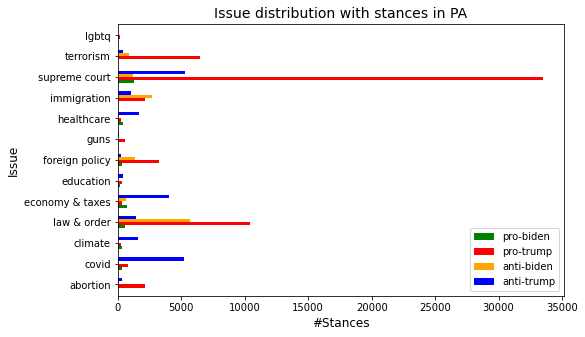

In [1034]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.6, color=['green', 'red', 'orange', 'blue']);
plt.title('Issue distribution with stances in PA', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Issue', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#ylabels = g.get_yticks().tolist()
#print(ylabels, type(ylabels[0]))
#ylabels[0] = 'abortion'

ylabels = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
    
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(4), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/issue_PA.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [15]:
# swing.pred_stance.value_counts().plot.bar()
# plt.savefig('data/swing_stance_dis.png')

# swing.pred_issue.value_counts().plot.bar()
# plt.savefig('data/swing_issue_dis.png')



In [1138]:
#####swing states (PA, WI)  two different funding entities 
# state_fe = swing.loc[(swing['funding_entity'] == 'America First Action') | 
#                               (swing['funding_entity'] == 'Union 2020') ]


state_fe = swing.loc[(swing['funding_entity'] == 'BIDEN FOR PRESIDENT') | 
                              (swing['funding_entity'] == 'DONALD J. TRUMP FOR PRESIDENT, INC.') ]

## DONALD J. TRUMP FOR PRESIDENT, INC., #TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE
#state_fe = swing.loc[(swing['funding_entity'] == 'BIDEN FOR PRESIDENT') ]
#state_fe = swing.loc[(swing['funding_entity'] == 'Union 2020') ]
state_fe.reset_index(inplace=True) # Resets the index, makes factor a column

In [1139]:
state_fe

,index,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,1.000000
1,5,706934070204471,“From COVID-19 to the environment to racial ju...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '900', 'upper_bound': '999'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001595', 'age': '55-64', 'g...",3,2,1.000000
2,37,469665837342614,Every single day since Donald Trump was electe...,BIDEN FOR PRESIDENT,2020-11-02,2020-11-04,"{'lower_bound': '9000', 'upper_bound': '9999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000817', 'age': '45-54', 'g...",3,4,1.000000
3,38,1471054636426026,"URGENT: Election Day is Tuesday, November 3, a...",BIDEN FOR PRESIDENT,2020-11-01,2020-11-03,"{'lower_bound': '9000', 'upper_bound': '9999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001366', 'age': '25-34', 'g...",3,4,1.000000
4,39,270613241037902,Every single day since Donald Trump was electe...,BIDEN FOR PRESIDENT,2020-11-01,2020-11-02,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.00062', 'age': '55-64', 'ge...",3,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84989,451549,961950977647142,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.079463', 'region': 'Arizona...","[{'percentage': '0.000676', 'age': '45-54', 'g...",3,3,0.206967
84990,451550,1582949411913883,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.06932', 'region': 'Arizona'...","[{'percentage': '0.00212', 'age': '45-54', 'ge...",3,3,0.253316
84991,451551,2782079008739433,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '3000', 'upper_bound': '3999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.062943', 'region': 'Arizona...","[{'percentage': '0.000259', 'age': '65+', 'gen...",3,3,0.207710
84992,451552,2800349690183550,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-27,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.055379', 'region': 'Arizona...","[{'percentage': '0.001044', 'age': '35-44', 'g...",3,3,0.188713


In [1140]:
sfe = state_fe.groupby(['pred_stance']).agg({'id': 'count'})
sfe

,id
pred_stance,
0,2582
1,44504
2,25143
3,12765


In [178]:
#state_fe.to_csv('data/state_fe_PA_Union 2020.csv', line_terminator='\r\n', encoding='utf-8', index = False) 

In [1141]:
##### Demographic age for specific state for two funding entities
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, state_fe.shape[0] ):
    #print(state_fe['demographic_distribution'][j])
    list_dic = eval(state_fe['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
        elif dic['age'] == '18-24' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
        
        elif dic['age'] == '65+' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])

In [1142]:
age_state_fe = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'demographic_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1143]:
age_state_fe

,id,ad_creative_body,funding_entity,demographic_distribution,pred_stance,pred_issue
0,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,35-44,3,4
1,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,45-54,3,4
2,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,45-54,3,4
3,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,35-44,3,4
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,55-64,3,4
...,...,...,...,...,...,...
1115795,3398130810269121,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,65+,3,3
1115796,3398130810269121,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,25-34,3,3
1115797,3398130810269121,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,45-54,3,3
1115798,3398130810269121,“We deserve better as a country.” Just one of ...,BIDEN FOR PRESIDENT,45-54,3,3


In [1144]:
asfe = age_state_fe.groupby(['demographic_distribution', 'funding_entity']).agg({'id': 'count'}).unstack()
#asfe = age_state_fe.groupby(['demographic_distribution']).agg({'id': 'count'})
asfe

id  \
funding_entity           BIDEN FOR PRESIDENT   
demographic_distribution                       
13-17                                    224   
18-24                                  21862   
25-34                                  35601   
35-44                                  36160   
45-54                                  35273   
55-64                                  35347   
65+                                    35511   

                                                              
funding_entity           DONALD J. TRUMP FOR PRESIDENT, INC.  
demographic_distribution                                      
13-17                                                     66  
18-24                                                 120585  
25-34                                                 146974  
35-44                                                 157047  
45-54                                                 161929  
55-64                                                 166146  
65+                                                   163075

In [1145]:
##### ##### Demographic gender for specific state for two funding entities
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, state_fe.shape[0] ):
    list_dic = eval(state_fe['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
            
        elif dic['gender'] == 'unknown' :
            ad_id.append(state_fe.id[j])
            text.append(state_fe.ad_creative_body[j])
            fe.append(state_fe.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(state_fe.pred_stance[j])
            issue_p.append(state_fe.pred_issue[j])
        

In [1146]:
gender_state_fe = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'demographic_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [1147]:
gsfe = gender_state_fe.groupby(['demographic_distribution', 'funding_entity']).agg({'id': 'count'}).unstack()
#gsfe = gender_state_fe.groupby(['demographic_distribution']).agg({'id': 'count'})
gsfe

id  \
funding_entity           BIDEN FOR PRESIDENT   
demographic_distribution                       
female                                 72824   
male                                   72001   
unknown                                55153   

                                                              
funding_entity           DONALD J. TRUMP FOR PRESIDENT, INC.  
demographic_distribution                                      
female                                                367606  
male                                                  369929  
unknown                                               178287

## Blue state NY

In [87]:
# #Blue state info for California , New York
# ad_id = []
# stance_p = []
# text = []
# fe = []
# start = []
# stop = []
# imp = []
# spend = []
# region = []
# demo = []
# issue_p = []
# for j in range (0, predicted_fb_all.shape[0] ):
#     dic = eval(predicted_fb_all['region_distribution'][j])[0]
#     if dic['region'] == 'New York' or dic['region'] == 'California':
#         ad_id.append(predicted_fb_all.id[j])
#         text.append(predicted_fb_all.ad_creative_body[j])
#         fe.append(predicted_fb_all.funding_entity[j])
#         start.append(predicted_fb_all.ad_delivery_start_time[j])
#         stop.append(predicted_fb_all.ad_delivery_stop_time[j])
#         imp.append(predicted_fb_all.impressions[j])
#         spend.append(predicted_fb_all.spend[j])
#         region.append(predicted_fb_all.region_distribution[j])
#         demo.append(predicted_fb_all.demographic_distribution[j])
#         stance_p.append(predicted_fb_all.pred_stance[j])
#         issue_p.append(predicted_fb_all.pred_issue[j])

#Blue state info for New York
ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['region_distribution'][j])
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'New York' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            start.append(predicted_fb_all.ad_delivery_start_time[j])
            stop.append(predicted_fb_all.ad_delivery_stop_time[j])
            imp.append(predicted_fb_all.impressions[j])
            spend.append(predicted_fb_all.spend[j])
            region.append(predicted_fb_all.region_distribution[j])
            demo.append(predicted_fb_all.demographic_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        


                                                      

In [88]:
blue = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) #34200, (NY = 5552)

In [89]:
blue

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1
1,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1
2,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4
3,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8
4,357617868835725,Don’t let Donald Trump raise the cost of presc...,Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008', 'region': 'Alabama'},...","[{'percentage': '0.008028', 'age': '25-34', 'g...",3,8
...,...,...,...,...,...,...,...,...,...,...,...
389783,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.333333', 'region': 'Califor...","[{'percentage': '0.333333', 'age': '55-64', 'g...",0,10
389784,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10
389785,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10
389786,2765797337011737,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.1', 'region': 'California'}...","[{'percentage': '0.1', 'age': '55-64', 'gender...",0,10


In [90]:
impression = []

for j in range (0, blue.shape[0] ):
    list_dic = eval(blue['region_distribution'][j])
    #print(list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'New York' :
            impression.append(dic['percentage'])
#         print(dic)
#         sys.exit()
        

In [91]:
blue['reg_imp'] = impression
blue['reg_imp'] =  blue['reg_imp'].astype(float)
blue

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.00437', 'region': 'Alabama'...","[{'percentage': '0.125547', 'age': '35-44', 'g...",3,1,0.021122
1,690073895238389,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007375', 'region': 'Alabama...","[{'percentage': '0.005822', 'age': '35-44', 'g...",3,1,0.023599
2,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4,0.014000
3,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8,0.009804
4,357617868835725,Don’t let Donald Trump raise the cost of presc...,Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.008', 'region': 'Alabama'},...","[{'percentage': '0.008028', 'age': '25-34', 'g...",3,8,0.009143
...,...,...,...,...,...,...,...,...,...,...,...,...
389783,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.333333', 'region': 'Califor...","[{'percentage': '0.333333', 'age': '55-64', 'g...",0,10,0.666667
389784,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.090570
389785,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.087991
389786,2765797337011737,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.1', 'region': 'California'}...","[{'percentage': '0.1', 'age': '55-64', 'gender...",0,10,0.100000


In [125]:
top_blue = blue.loc[(blue['reg_imp'] > 0.1)] #ads having > 10% regional impressions in NY
top_blue = top_blue.reset_index(drop=True)
print(top_blue)

                     id                                   ad_creative_body  \
0      2840069269573211  A lot of pundits are in denial. They think thi...   
1      3385816044865105  Don’t scroll away just yet — this is important...   
2       269497537832229  A lot of pundits are in denial. They think thi...   
3       861478011340529  I need to know we pulled out all the stops to ...   
4       712266809375431  A lot of pundits are in denial. They think thi...   
...                 ...                                                ...   
44581  2480065575627370  Swats away flies and lies. Get yours today: \n...   
44582  3097119380394798  Swats away flies and lies. Get yours today: \n...   
44583  3796917330330480  Swats away flies and lies. Get yours today: \n...   
44584   852836738857491  You’ve heard from Joe. You’ve heard from Kamal...   
44585  2558726044418112  You’ve heard from Joe. You’ve heard from Kamal...   

           funding_entity ad_delivery_start_time ad_delivery_st

In [126]:
#drop "none" (-1) issue, stance
#drop "none" (-1) issue, state

new_blue = top_blue[top_blue.pred_issue != -1]
new_blue2 = new_blue[new_blue.pred_stance != -1]
new_blue2 = new_blue2.reset_index(drop=True)
new_blue2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,2020-11-01,2020-11-03,"{'lower_bound': '175000', 'upper_bound': '1999...","{'lower_bound': '2500', 'upper_bound': '2999'}","[{'percentage': '0.005491', 'region': 'Alabama...","[{'percentage': '0.001568', 'age': '55-64', 'g...",3,4,0.101781
1,3385816044865105,Don’t scroll away just yet — this is important...,BIDEN VICTORY FUND,2020-11-01,2020-11-04,{'lower_bound': '1000000'},"{'lower_bound': '60000', 'upper_bound': '69999'}","[{'percentage': '0.004769', 'region': 'Alabama...","[{'percentage': '0.001843', 'age': '45-54', 'g...",3,4,0.112428
2,269497537832229,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,2020-11-01,2020-11-02,"{'lower_bound': '100000', 'upper_bound': '1249...","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '0.006779', 'region': 'Alabama...","[{'percentage': '0.003948', 'age': '35-44', 'g...",3,4,0.103728
3,861478011340529,I need to know we pulled out all the stops to ...,BIDEN VICTORY FUND,2020-11-01,2020-11-02,"{'lower_bound': '70000', 'upper_bound': '79999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.006955', 'region': 'Alabama...","[{'percentage': '0.002596', 'age': '45-54', 'g...",3,4,0.115440
4,712266809375431,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,2020-11-01,2020-11-03,"{'lower_bound': '200000', 'upper_bound': '2499...","{'lower_bound': '3000', 'upper_bound': '3499'}","[{'percentage': '0.007106', 'region': 'Alabama...","[{'percentage': '0.001782', 'age': '55-64', 'g...",3,4,0.100213
...,...,...,...,...,...,...,...,...,...,...,...,...
39201,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.021277', 'region': 'Illinoi...","[{'percentage': '0.021277', 'age': '25-34', 'g...",3,6,0.106383
39202,3097119380394798,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.035714', 'region': 'Minneso...","[{'percentage': '0.035714', 'age': '55-64', 'g...",3,6,0.107143
39203,3796917330330480,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.041667', 'region': 'Marylan...","[{'percentage': '0.041667', 'age': '45-54', 'g...",3,6,0.125000
39204,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.113514


In [127]:
###Use groupby() function to form groups based on more than one category (i.e. Use more than one column to perform the splitting).
dfc = new_blue2.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                       
pred_stance       0       1      2       3
pred_issue                                
0               NaN   719.0   17.0   144.0
1              17.0   370.0    7.0  1344.0
2             208.0    88.0   20.0  1451.0
3              80.0  3058.0  977.0  1177.0
4            1770.0   308.0  868.0  9315.0
5              10.0    79.0    5.0   355.0
6              64.0  1820.0   23.0   117.0
7               3.0   650.0   12.0    41.0
8             117.0   145.0   53.0   540.0
9               9.0   570.0  379.0   601.0
10            117.0  7509.0  259.0  1950.0
11              5.0   798.0  126.0   558.0
12              2.0   299.0   27.0    25.0

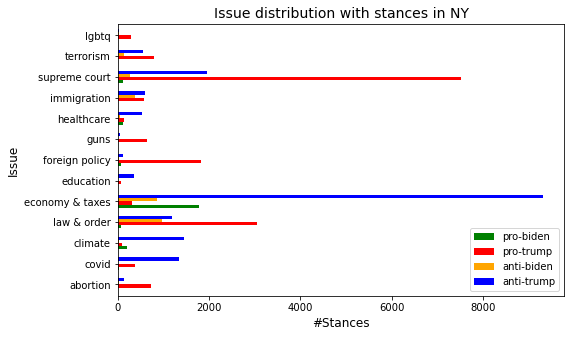

In [128]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.6, color=['green', 'red', 'orange', 'blue']);
plt.title('Issue distribution with stances in NY', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Issue', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#ylabels = g.get_yticks().tolist()
#print(ylabels, type(ylabels[0]))
#ylabels[0] = 'abortion'

ylabels = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
    
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(4), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/issue_NY.png", dpi=300, bbox_inches = "tight") 
plt.show()

## Red state Idaho

In [55]:

#Red state info for Idaho 
ad_id = []
stance_p = []
text = []
fe = []
start = []
stop = []
imp = []
spend = []
region = []
demo = []
issue_p = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['region_distribution'][j])
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Idaho' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            start.append(predicted_fb_all.ad_delivery_start_time[j])
            stop.append(predicted_fb_all.ad_delivery_stop_time[j])
            imp.append(predicted_fb_all.impressions[j])
            spend.append(predicted_fb_all.spend[j])
            region.append(predicted_fb_all.region_distribution[j])
            demo.append(predicted_fb_all.demographic_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        

In [56]:
red = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'ad_delivery_start_time': start, 'ad_delivery_stop_time' : stop,
                             'impressions' : imp, 'spend' : spend, 'region_distribution': region,
                             'demographic_distribution': demo, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) #8659 ##idaho = 4346

In [57]:
red 

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue
0,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4
1,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8
2,1069839450110712,Coronavirus deaths are surging in Florida. The...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007663', 'region': 'Califor...","[{'percentage': '0.038314', 'age': '18-24', 'g...",3,1
3,2966972133403938,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '300', 'upper_bound': '399'}","[{'percentage': '0.008094', 'region': 'Alabama...","[{'percentage': '0.000565', 'age': '18-24', 'g...",3,1
4,816679569155587,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '6000', 'upper_bound': '6999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.007033', 'region': 'Alabama...","[{'percentage': '0.128296', 'age': '35-44', 'g...",3,4
...,...,...,...,...,...,...,...,...,...,...,...
306471,416090896054420,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.003195', 'region': 'Alaska'...","[{'percentage': '0.003195', 'age': '25-34', 'g...",3,6
306472,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10
306473,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10
306474,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10


In [58]:
impression = []

for j in range (0, red.shape[0] ):
    list_dic = eval(red['region_distribution'][j])
    #print(list_dic)
    #sys.exit()
    for i in range (0, len(list_dic)):
        dic = list_dic[i]
        if dic['region'] == 'Idaho' :
            impression.append(dic['percentage'])
#         print(dic)
#         sys.exit()
        

In [59]:
red['reg_imp'] = impression
red['reg_imp'] =  red['reg_imp'].astype(float)
red

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.004586', 'region': 'Alabama...","[{'percentage': '0.000947', 'age': '18-24', 'g...",3,4,0.000965
1,349621539606033,Trump has a plan to cut $500 billion from Medi...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '2000', 'upper_bound': '2999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.007246', 'region': 'Alabama...","[{'percentage': '0.099746', 'age': '18-24', 'g...",3,8,0.001705
2,1069839450110712,Coronavirus deaths are surging in Florida. The...,Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.007663', 'region': 'Califor...","[{'percentage': '0.038314', 'age': '18-24', 'g...",3,1,0.007663
3,2966972133403938,"COVID is rising again in Florida, but Trump st...",Independence USA PAC,2020-11-02,2020-11-03,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '300', 'upper_bound': '399'}","[{'percentage': '0.008094', 'region': 'Alabama...","[{'percentage': '0.000565', 'age': '18-24', 'g...",3,1,0.000852
4,816679569155587,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,2020-11-02,2020-11-04,"{'lower_bound': '6000', 'upper_bound': '6999'}","{'lower_bound': '200', 'upper_bound': '299'}","[{'percentage': '0.007033', 'region': 'Alabama...","[{'percentage': '0.128296', 'age': '35-44', 'g...",3,4,0.000491
...,...,...,...,...,...,...,...,...,...,...,...,...
306471,416090896054420,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.003195', 'region': 'Alaska'...","[{'percentage': '0.003195', 'age': '25-34', 'g...",3,6,0.003195
306472,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.016216', 'region': 'Alabama...","[{'percentage': '0.016216', 'age': '18-24', 'g...",0,10,0.005405
306473,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0.004555
306474,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0.004621


In [129]:
top_red = red.loc[(red['reg_imp'] > 0.1)] #ads having > 10% regional impressions in ID
top_red = top_red.reset_index(drop=True)
print(top_red)

                    id                                   ad_creative_body  \
0      696114684345232  After FOUR DECADES in the Washington Swamp, Jo...   
1     3294661053966543  Robert Reich: Trump’s efforts to undermine the...   
2      673390183564953  MoveOn is working nonstop—and working SMART—to...   
3      677697969789352  Take our survey for a chance to win $500! It o...   
4      823839158430032  🚨 It's Almost Election Day 🚨\n\nOur path to vi...   
...                ...                                                ...   
1401   262546971767171  I need your help to fight back against the Fak...   
1402  3487781107965006  To all of our Puertorriqueños voting for the f...   
1403  1536773819866847  Will you take a few moments to answer two quic...   
1404   677196993208172  Hi, this is Campaign Manager Jen O’Malley Dill...   
1405  3917411804969983  Hi, this is Campaign Manager Jen O’Malley Dill...   

                                funding_entity ad_delivery_start_time  \
0 

In [1030]:
#drop "none" (-1) issue
new_red = top_red[top_red.pred_issue != -1]
new_red2 = new_red[new_red.pred_stance != -1]
new_red2 = new_red2.reset_index(drop=True)
new_red2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,reg_imp
0,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2020-11-02,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.125', 'region': 'Alabama'},...","[{'percentage': '0.375', 'age': '65+', 'gender...",2,3,0.125000
1,673390183564953,MoveOn is working nonstop—and working SMART—to...,MOVEON.ORG POLITICAL ACTION,2020-10-29,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.5', 'region': 'Idaho'}, {'p...","[{'percentage': '0.5', 'age': '65+', 'gender':...",3,4,0.500000
2,677697969789352,Take our survey for a chance to win $500! It o...,"Public Opinion Research Group, Inc",2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Idaho'}]","[{'percentage': '1', 'age': '55-64', 'gender':...",1,10,1.000000
3,823839158430032,🚨 It's Almost Election Day 🚨\n\nOur path to vi...,BIDEN VICTORY FUND,2020-10-29,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.076923', 'region': 'Hawaii'...","[{'percentage': '0.153846', 'age': '55-64', 'g...",0,4,0.153846
4,2711394052469127,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.083333', 'region': 'Alabama...","[{'percentage': '0.083333', 'age': '35-44', 'g...",2,3,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,262546971767171,I need your help to fight back against the Fak...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-05-26,2020-05-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.111111', 'region': 'Tenness...","[{'percentage': '0.111111', 'age': '55-64', 'g...",1,10,0.111111
1360,3487781107965006,To all of our Puertorriqueños voting for the f...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.076923', 'region': 'Alabama...","[{'percentage': '0.076923', 'age': '35-44', 'g...",3,3,0.153846
1361,1536773819866847,Will you take a few moments to answer two quic...,BIDEN FOR PRESIDENT,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.2', 'region': 'Arizona'}, {...","[{'percentage': '0.4', 'age': '55-64', 'gender...",3,10,0.200000
1362,677196993208172,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,2020-10-26,2020-10-30,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.052632', 'region': 'New Yor...","[{'percentage': '0.052632', 'age': '25-34', 'g...",0,4,0.105263


In [1038]:
dfc = new_red2.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                   
pred_stance     0      1     2     3
pred_issue                          
0             NaN   57.0   3.0   4.0
1             NaN   35.0   NaN  26.0
2             1.0   16.0   NaN  24.0
3             NaN  181.0  67.0   7.0
4            10.0    4.0  35.0  67.0
5             NaN    6.0   NaN   6.0
6             NaN  138.0   1.0   2.0
7             NaN   79.0   NaN   NaN
8             NaN    2.0   NaN  11.0
9             NaN   37.0  31.0   3.0
10            NaN  408.0   4.0  23.0
11            NaN   46.0  10.0  11.0
12            NaN    8.0   NaN   1.0

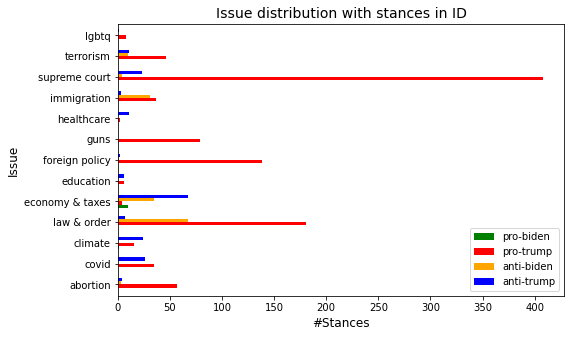

In [1039]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.6, color=['green', 'red', 'orange', 'blue']);
plt.title('Issue distribution with stances in ID', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Issue', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#ylabels = g.get_yticks().tolist()
#print(ylabels, type(ylabels[0]))
#ylabels[0] = 'abortion'

ylabels = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
    
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(4), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/issue_ID.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [476]:
###issue of 6 states
#new_df = swing.loc[predicted_fb_all['pred_issue'] == '4'] #economy
#new_df = swing.loc[predicted_fb_all['pred_issue'] == '10'] #supreme court

In [477]:
#df["first_column"]. str. lower()
text = " ".join(review for review in new_df['ad_creative_body'].str.lower())
print ("There are {} words in the combination of all pro-biden ads.".format(len(text)))

There are 1197636 words in the combination of all pro-biden ads.


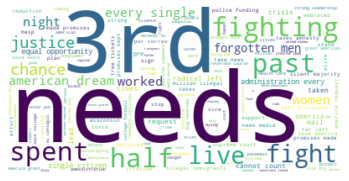

In [478]:
#get stop words of all languages
#STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
# # Create stopword list:
# stopwords = set(STOPWORDS)
# stop_words.update(["would","get","going","across","held","join","joe", "biden", "kamala", "harris","make","donald","trump","pence","election","have","not"
#                    "need","know", "november","will","be","is","us","now","tommorow","today","yesterday","take","democrats","democrat","republican", "republicans",
#                    "sure", "country","state", "county","p","tonight","like","ready","time","tell","midnight","year","month","week","day",
#                   "want","three","please","ever","years","months","days","hour","hours","amount","wants","democratic",
#                    "show","pm","am","need","let","contribute","use","used","really","think","new","party","name",
#                    ])

stop_words.update(["would","get","going","across","held","join","joe", "biden", "kamala", "harris","make","donald","trump","pence","election","have","not"
                   "need","know", "november","will","be","is","us","now","tommorow","today","yesterday","take","democrats","democrat","republican", "republicans",
                   "sure", "country","state", "county","p","tonight","like","ready","time","tell","midnight","year","month","week","day",
                  "want","three","please","ever","years","months","days","hour","hours","amount","wants","democratic",
                   "show","pm","am","need","let","contribute","use","used","really","think","new","party","name",
                   "defeat","vote","bernie","sanders","presidential","president","ballot","campaign","see","donation",
                   "chip","candidate","moven","org", "senate","donate","one","people","jill","poll","niece","survey","minutes",
                  "http","trump2020","coin","https","www","trump2020","biden-harris","trump-pence","biden2020","com","moveon",
                   "conservatecollections",'hat','conservatecollection','conservativecollections.','even','give','long','trying'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [472]:
#wordcloud.to_file("data/swing_economy_wc.png")

## Descriptive insights of data 

In [6]:
###Use groupby() function to form groups based on more than one category (i.e. Use more than one column to perform the splitting).
#issue distribution over stance
#dfc = predicted_fb_all.groupby(['pred_issue', 'pred_stance']).agg({'id': 'count'})
#stance distribution over issue
dfc = predicted_fb_all.groupby(['pred_stance', 'pred_issue']).agg({'id': 'count'})
dfc

id
pred_stance pred_issue        
-1           1               3
             9               6
 0          -1            1484
             0             290
             1            1170
             2            1994
             3            2167
             4           10347
             5             583
             6            1657
             7             182
             8            1817
             9             259
             10           3909
             11            205
             12             35
 1          -1            3631
             0           15915
             1           13273
             2            2926
             3           73951
             4            3227
             5            4643
             6           39663
             7           20293
             8            5553
             9           12632
             10         226716
             11          46320
             12           5903
 2          -1            7547
             0             663
             1             662
             2             163
             3           40800
             4           15579
             5             242
             6            4085
             7             396
             8             779
             9           29894
             10          13107
             11           4109
             12            103
 3          -1           29039
             0            2873
             1           39117
             2           15429
             3           11099
             4           65160
             5            5059
             6            2213
             7             997
             8           20318
             9            8438
             10          29130
             11           4479
             12            565

In [45]:
# predicted_fb_all.ad_creative_body.nunique()

35323

In [248]:
# get distinct values of the dataframe based on column
distinct_ad = predicted_fb_all.drop_duplicates(subset = ["ad_creative_body"])
distinct_ad = distinct_ad.reset_index(drop=True)
distinct_ad

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0
3,364645051536385,Hey Wisconsin - Joe Biden’s anti-life agenda i...,Women Speak Out PAC,2020-11-03,2020-11-04,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.000292', 'age': '65+', 'gen...",2,0,0
4,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
35318,1063249584108238,The difference between Justice Kenny Griffis a...,Improve MS Political Action Committee,2020-10-26,2020-11-04,"{'lower_bound': '20000', 'upper_bound': '24999'}","{'lower_bound': '600', 'upper_bound': '699'}","[{'percentage': '9.3E-5', 'region': 'Iowa'}, {...","[{'percentage': '0.000378', 'age': '45-54', 'g...",2,10,1
35319,2763658733912774,I asked U.S. EPA Administrator Andrew Wheeler\...,LANCE GOODEN FOR CONGRESS COMMITTEE,2020-10-26,2020-10-29,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.000399', 'region': 'Alaska'...","[{'percentage': '0.001383', 'age': '35-44', 'g...",2,6,3
35320,4466907490050508,Joe Biden and Kamala Harris are LEADING in key...,Off the Sidelines,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.004415', 'region': 'Alaska'...","[{'percentage': '0.083885', 'age': '45-54', 'g...",3,10,0
35321,357472945586944,There is still time to receive before the big ...,Adam Edward Ratliff,2020-10-26,2020-10-30,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.001003', 'region': 'Alaska'...","[{'percentage': '0.00011', 'age': '35-44', 'ge...",1,10,3


## Trigrams, Z-score, wordcloud for stances

In [2171]:
### for all ads
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 0)] #pro-biden
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 1)] #pro-trump
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 2)] #anti-biden
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 3)] #anti-trump

# new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 0) | (predicted_fb_all['pred_stance'] == 3)] #pro-biden, anti-trump
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 1) | (predicted_fb_all['pred_stance'] == 2)] #pro-trump, anti-biden

### for distinct ads
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 0)] #pro-biden
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 1)] #pro-trump
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 2)] #anti-biden
#new_df = distinct_ad.loc[(distinct_ad['pred_stance'] == 3)] #anti-trump

## for issue specific ads
# new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 0) & (predicted_fb_all['pred_issue'] == 1) ] #covid
# new_df3 = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 3) & (predicted_fb_all['pred_issue'] == 1) ] 
# new_df1 = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 1) & (predicted_fb_all['pred_issue'] == 1) ] 
# new_df2 = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 2) & (predicted_fb_all['pred_issue'] == 1) ] 

new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 0) & (predicted_fb_all['pred_issue'] == 9) ] #immigration
new_df3 = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 3) & (predicted_fb_all['pred_issue'] == 9) ] 
new_df1 = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 1) & (predicted_fb_all['pred_issue'] == 9) ] 
new_df2 = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 2) & (predicted_fb_all['pred_issue'] == 9) ] 

#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 2) & (predicted_fb_all['pred_issue'] == 0) ] #abortion
#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_stance'] == 3) & (predicted_fb_all['pred_issue'] == 9) ] #immigration

#print(new_df)

#new_df = predicted_fb_all.loc[(predicted_fb_all['pred_issue'] == 9) ]


In [2172]:
from langdetect import detect

def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

new_df3 = new_df3[new_df3['ad_creative_body'].apply(detect_en)]
new_df3

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
94,1573970959448547,"Donald Trump claims to be a ""Law & Order"" Pres...",Jonathan Miichaei Lebe,2020-11-01,2020-11-03,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.005486', 'age': '25-34', 'g...",3,9,3
102,646531732704055,Crime was @ historical lows during Biden/Obama...,Needhelppayingbills.com,2020-11-01,2020-11-03,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.047379', 'region': 'Arizona...","[{'percentage': '0.000538', 'age': '25-34', 'g...",3,9,2
1278,1478260019037372,Crime was @ historical lows during Biden/Obama...,Needhelppayingbills.com,2020-10-30,2020-11-01,"{'lower_bound': '6000', 'upper_bound': '6999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.050779', 'region': 'Arizona...","[{'percentage': '0.000348', 'age': '35-44', 'g...",3,9,2
2986,365637511371469,"TRUMPSTERS! TAKE HEED! \n\nOn Nov 3, we are t...",Disinfect America 2020,2020-10-26,2020-11-04,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.05466', 'region': 'Arizona'...","[{'percentage': '0.003689', 'age': '18-24', 'g...",3,9,2
3097,687748875435668,"Biden states his administration will ensure ""d...","PACRONYM, PACRONYM.org. Not authorized by any ...",2020-10-26,2020-10-27,"{'lower_bound': '6000', 'upper_bound': '6999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.210607', 'region': 'Arizona...","[{'percentage': '0.000926', 'age': '35-44', 'g...",3,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
843683,570715750251616,Yuma news: Trump Admin Cancels Construction of...,"SmartNews International, Inc.",2020-05-26,2020-05-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Arizona'}]","[{'percentage': '0.166667', 'age': '65+', 'gen...",3,9,1
843684,176892570379361,Yuma news: Trump Admin Cancels Construction of...,"SmartNews International, Inc.",2020-05-27,2020-05-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Arizona'}]","[{'percentage': '0.5', 'age': '45-54', 'gender...",3,9,1
843705,707343880037795,Press Sec. McEnany dismisses Yamiche's questio...,"Recount Media, Inc",2020-05-26,2020-05-27,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.030181', 'region': 'Alabama...","[{'percentage': '0.001031', 'age': '18-24', 'g...",3,9,2
847812,2832681950350602,Order now to receive before election day.,Adam Edward Ratliff,2020-10-26,2020-10-30,"{'lower_bound': '7000', 'upper_bound': '7999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '0.000767', 'region': 'Alaska'...","[{'percentage': '0.147755', 'age': '55-64', 'g...",3,9,2


In [2173]:
new_df2

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
305,725776648291891,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-01,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '1', 'age': '25-34', 'gender':...",2,9,0
315,1011356202625513,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-10-31,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '1', 'age': '25-34', 'gender':...",2,9,0
321,1731924953624130,WE MUST DRAIN THE SWAMP!,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.000917', 'age': '55-64', 'g...",2,9,2
326,372512667301385,WE MUST DRAIN THE SWAMP!,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-02,"{'lower_bound': '25000', 'upper_bound': '29999'}","{'lower_bound': '900', 'upper_bound': '999'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.000407', 'age': '18-24', 'g...",2,9,2
328,756140591608386,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-01,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
852716,1340425856349395,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.034375', 'region': 'Alabama...","[{'percentage': '0.015625', 'age': '45-54', 'g...",2,9,2
852717,1304462256559160,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.051136', 'region': 'Alabama...","[{'percentage': '0.03125', 'age': '35-44', 'ge...",2,9,2
852722,777694833079536,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.023026', 'region': 'Alabama...","[{'percentage': '0.006579', 'age': '18-24', 'g...",2,9,2
852728,3731603070240022,Joe Biden on pressuring Ukraine to fire the pr...,American Potential Fund,2020-10-26,2020-10-27,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.033129', 'region': 'Alabama...","[{'percentage': '0.003681', 'age': '65+', 'gen...",2,9,2


In [2175]:
#issue_specific_df =  new_df[new_df['ad_creative_body'].str.contains('coronavirus | covid | pandemic | flu | vaccine | virus | china | plague | chinavirus') ]
#issue_specific_df =  new_df[new_df['ad_creative_body'].str.contains('abortion | reproductive | parenthood | birth | pregnant| pregnancy | assault | late term | roe v. wade | stem | rape|  right | protect | body | fetus | fetal | unborn| health | roe | wade | choice | prolife | prochoice | life | pro | catholic | religion | christian | god' ) ]

## for covid
# issue_specific_df =  new_df[new_df['ad_creative_body'].str.contains('coronavirus | covid | pandemic | flu | vaccine | virus | china | plague | chinavirus | chineese | health') ]
# issue_specific_df3 =  new_df3[new_df3['ad_creative_body'].str.contains('coronavirus | covid | pandemic | flu | vaccine | virus | china | plague | chinavirus | chineese | health') ]
# issue_specific_df1 =  new_df1[new_df1['ad_creative_body'].str.contains('coronavirus | covid | pandemic | flu | vaccine | virus | china | plague | chinavirus | chineese | health ') ]
# issue_specific_df2 =  new_df2[new_df2['ad_creative_body'].str.contains('coronavirus | covid | pandemic | flu | vaccine | virus | china | plague | chinavirus | chineese | health') ]

## for immigration
issue_specific_df =  new_df[new_df['ad_creative_body'].str.contains('immigrant| immigration | wall | mexico | humanitarian | immigration | nafta | cage | illegal | inhuman | children | innocent | welcome | asylum | wage | border | terrorism | terrorist | detention | deportation | detain | deport | refugee | amnesty | birthright | citizen | citizenship | daca | racism | xenophobia | chain | prison') ]
issue_specific_df3 =  new_df3[new_df3['ad_creative_body'].str.contains('immigrant| immigration | wall | mexico | humanitarian | immigration | nafta | cage | illegal | inhuman | children | innocent | welcome | asylum | wage | border | terrorism | terrorist | detention | deportation | detain | deport | refugee | amnesty | birthright | citizen | citizenship | daca | racism | xenophobia | chain | prison') ]
issue_specific_df1 =  new_df1[new_df1['ad_creative_body'].str.contains('immigrant| immigration | wall | mexico | humanitarian | immigration | nafta | cage | illegal | inhuman | children | innocent | welcome | asylum | wage | border | terrorism | terrorist | detention | deportation | detain | deport | refugee | amnesty | birthright | citizen | citizenship | daca | racism | xenophobia | chain | prison') ]
issue_specific_df2 =  new_df2[new_df2['ad_creative_body'].str.contains('immigrant| immigration | wall | mexico | humanitarian | immigration | nafta | cage | illegal | inhuman | children | innocent | welcome | asylum | wage | border | terrorism | terrorist | detention | deportation | detain | deport | refugee | amnesty | birthright | citizen | citizenship | daca | racism | xenophobia | chain | prison') ]


issue_specific_df2



,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
305,725776648291891,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-01,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '1', 'age': '25-34', 'gender':...",2,9,0
315,1011356202625513,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-10-31,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '1', 'age': '25-34', 'gender':...",2,9,0
328,756140591608386,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-01,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",2,9,0
341,3547219985326029,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-01,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.037037', 'age': '35-44', 'g...",2,9,0
347,382941166406666,Joe Biden is a career politician who spent dec...,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-10-31,2020-11-01,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
835982,2629284440680816,Sign the Petition to President Trump! Tell Pre...,LEADERSHIP INSTITUTE INC,2020-05-29,2020-08-17,"{'lower_bound': '175000', 'upper_bound': '1999...","{'lower_bound': '5000', 'upper_bound': '5999'}","[{'percentage': '0.015888', 'region': 'Alabama...","[{'percentage': '0.002706', 'age': '45-54', 'g...",2,9,2
835983,197773331338742,Sign the Petition to President Trump! Tell Pre...,LEADERSHIP INSTITUTE INC,2020-06-02,2020-08-16,"{'lower_bound': '25000', 'upper_bound': '29999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.001405', 'region': 'Vermont...","[{'percentage': '0.004472', 'age': '65+', 'gen...",2,9,2
835985,286593419048767,Sign the Petition to President Trump! Tell Pre...,LEADERSHIP INSTITUTE INC,2020-05-29,2020-08-16,"{'lower_bound': '20000', 'upper_bound': '24999'}","{'lower_bound': '800', 'upper_bound': '899'}","[{'percentage': '0.005439', 'region': 'Montana...","[{'percentage': '0.001861', 'age': '45-54', 'g...",2,9,2
837710,2988973884556414,"America is a nation of immigrants, but our cur...",COLE FOR CONGRESS,2020-05-28,2020-08-03,"{'lower_bound': '10000', 'upper_bound': '14999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Oklahoma'}]","[{'percentage': '0.000183', 'age': '18-24', 'g...",2,9,1


In [2005]:
#issue_specific_df2.to_csv('bal.csv')

## most common trigrams & Z-score & Pearson correlation

In [2176]:
from gensim.parsing.preprocessing import STOPWORDS
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  #stopwords = nltk.corpus.stopwords.words('english')
  all_stopwords_gensim = STOPWORDS
  sw_list = {"not","never"}
  all_stopwords_gensim = STOPWORDS.difference(sw_list)
  newStopWords = ['moveonorg', 'polmoveonorg', 'to', 'you', 'the', 'smartnews', 'install','s']
  #words = re.sub(r'[^\w\s]', '', text).split()
  text = text.replace("\\n","")
  #print(type(text),text)
  words = re.sub(r"[^\w'\s]", ' ', text).split()
  #print(words)
  #return [wnl.lemmatize(word.lower()) for word in words if word not in all_stopwords_gensim]
  #return [wnl.lemmatize(word.lower()) for word in words if word not in all_stopwords_gensim and word not in newStopWords ]
  #print(type(words), words,[''.join(word) for word in words], type([''.join(word) for word in words]), [''.join(word) for word in words][0])
  result = []
  for word in words:
    #print(word)
    word = word.lower()
    if word not in all_stopwords_gensim and word not in newStopWords:
        #print(word)
        #sys.exit()
        result.append(wnl.lemmatize(word))
  return result
        



In [2177]:
#true_word = basic_clean(''.join(str(new_df1['ad_creative_body'].tolist()))) #for stance and ads
true_word = basic_clean(''.join(str(issue_specific_df1['ad_creative_body'].tolist()))) # for issue specific stance and ads


In [2180]:
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:25]

true_trigrams_series

(end, illegal, immigration)        1198
(border, end, illegal)             1195
(million, illegal, immigrant)      1192
(long, joe, biden)                 1191
(chosen, illegal, immigrant)       1191
(illegal, immigrant, free)         1191
(joe, biden, support)              1191
(support, giving, taxpayer)        1191
(biden, support, giving)           1191
(supported, effort, grant)         1191
(immigrant, american, people)      1191
(illegal, immigrant, president)    1191
(protect, america's, border)       1191
(funded, health, care)             1191
(effort, grant, amnesty)           1191
(giving, taxpayer, funded)         1191
(voted, supported, effort)         1191
(free, voted, supported)           1191
(american, people, long)           1191
(grant, amnesty, million)          1191
(taxpayer, funded, health)         1191
(health, care, illegal)            1191
(immigrant, free, voted)           1191
(people, long, joe)                1191
(democrat, chosen, illegal)        1191


In [2181]:
# pb_cov = ['joe biden ready', 'ready tackle coronavirus', 'help rebuild country', 'effort develop vaccine', 'biden confront crisis']

# at_cov = ['donald trump failure', 'truth over lies', 'let coronavirus spread', 'depression donald trump', 'floridian died deserve', 'covid rising florida', 'ignores health expert', 'ignoring doctor costing']

# pt_cov = ['virus head leader', 'trump tackled virus', 'closed border china', 'veteran trump priority']

# ab_cov = [ 'aborted fetal tissue', 'force people wear', 'gaslighting disinformation operation', 'latest coronavirus news', 'pay dollar pocket']

## main
# covid = ['joe biden ready', 'ready tackle coronavirus', 'help rebuild country', 'effort develop vaccine', 'biden confront crisis', 
#        'donald trump failure', 'truth over lies', 'let coronavirus spread', 'depression donald trump', 'floridian died deserve', 'covid rising florida', 'ignores health expert', 'ignoring doctor costing',
#       'america believe freedom','funded coronavirus testing','unemployment benefit stimulus', 'closed border china', 'veteran trump priority', 'party dictate behavior',
#       'aborted fetal tissue', 'force people wear', 'pay dollar pocket']

# immigration = ['american lost job', 'continued support nafta', 'support family act','trump family leave', 'unregulated child prison', 'immigrant refugee child',
#                'add citizenship question', 'census operation count', 'trump xenophobic administration','undocumented folk impression', 'inhumane treatment immigrant', 'blaming taking job', 
#                'protect social security', 'border end illegal', 'taxpayerfunded health care','security medicare protection', 'grant amnesty million', 
#                'million illegal immigrants', 'cut social security','trillions new taxes&amnesty', 'dangerous illegal immigration', 'promised build wall']

#covid_pb = ['joe biden ready', 'biden rebuild country', 'biden ready tackle','effort develop vaccine','ready tackle coronavirus']
#covid_at = ['trump ignoring doctor', 'covid rising florida', 'ignores health expert','covid19 case increasing','coronavirus death surging']
#covid_pt = ['trump never stopped', 'greatest american comeback', 'president trump tackled',"trump reopen country",'meet american patriot']
#covid_ab = ['frontline worker hazard', 'benefit stimulus check', 'unemployment benefit stimulus', 'loan debt forgiveness',"pay sick leave"]


#immigration_pb = ['joe biden ready', 'biden rebuild country', 'biden ready tackle','effort develop vaccine','ready tackle coronavirus']
#immigration_at = ['trump ignoring doctor', 'covid rising florida', 'ignores health expert','covid19 case increasing','coronavirus death surging']
immigration = ['end illegal immigration', 'border end illegal', 'million illegal immigrant',"protect america's border",'taxpayer funded health']
#immigration_ab = ['frontline worker hazard', 'benefit stimulus check', 'unemployment benefit stimulus', 'loan debt forgiveness',"pay sick leave"]


In [2121]:
import scipy.stats as stats
stats.zscore(true_trigrams_series)

array([ 1.844826  ,  1.844826  ,  1.844826  ,  1.844826  ,  1.844826  ,
        1.844826  ,  1.844826  ,  1.844826  ,  1.79961522,  1.79961522,
        1.09884808,  1.09884808,  1.09884808, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359,
       -0.58525359, -0.58525359, -0.58525359, -0.58525359, -0.58525359])

In [2182]:
from gensim.parsing.preprocessing import STOPWORDS
def basic_clean_sent(texts):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  #stopwords = nltk.corpus.stopwords.words('english')
  all_stopwords_gensim = STOPWORDS
  sw_list = {"not","never"}
  all_stopwords_gensim = STOPWORDS.difference(sw_list)
  newStopWords = ['moveonorg', 'polmoveonorg', 'to', 'you', 'the', 'smartnews', 'install','s']
  clean_sent = []
  for text in texts:
      #words = re.sub(r'[^\w\s]', '', text).split()
      text = text.replace("\\n","")
      #print(type(text),text)
      words = re.sub(r"[^\w'\s]", ' ', text).split()
      result = []
      for word in words:
        word = word.lower()
        if word not in all_stopwords_gensim and word not in newStopWords:
            #print(word)
            #sys.exit()
            result.append(wnl.lemmatize(word))
      clean_sent.append(result)
  return clean_sent
        



In [2183]:
sents = basic_clean_sent(new_df['ad_creative_body'].values)
print(type(sents), sents[0])

### for covid
# sents0 = basic_clean_sent(issue_specific_df['ad_creative_body'].values)
# sents3 = basic_clean_sent(issue_specific_df3['ad_creative_body'].values)
# sents1 = basic_clean_sent(issue_specific_df1['ad_creative_body'].values)
# sents2 = basic_clean_sent(issue_specific_df2['ad_creative_body'].values)

### for immigration
sents0 = basic_clean_sent(new_df['ad_creative_body'].values)
sents3 = basic_clean_sent(new_df3['ad_creative_body'].values)
sents1 = basic_clean_sent(new_df1['ad_creative_body'].values)
sents2 = basic_clean_sent(new_df2['ad_creative_body'].values)


print(len(sents0), len(sents3), len(sents1), len(sents2))

<class 'list'> ['joe', 'biden', 'reverse', 'pres', 'trump', 'failed', 'policy', 'work', 'improve', 'life', 'cuban', 'venezuelan']
259 5097 12632 29894


In [2184]:
joined_sents = []
joined_sents0 = []
joined_sents3 = []
joined_sents1 = []
joined_sents2 = []
for sent in sents:
    joined_sents.append(" ".join(sent))
print(joined_sents[0:5], len(joined_sents))

for sent in sents0:
    joined_sents0.append(" ".join(sent))
    
for sent in sents3:
    joined_sents3.append(" ".join(sent))
    
    
for sent in sents1:
    joined_sents1.append(" ".join(sent))
    
for sent in sents2:
    joined_sents2.append(" ".join(sent))

['joe biden reverse pres trump failed policy work improve life cuban venezuelan', 'al endosar el plan biden para puerto rico el nuevo día confirma que está del lado del avance nuestros valores democráticos más sagrados siendo uno ellos el respeto la dignidad humana sin importar raza credo o condición económica', 'al endosar el plan biden para puerto rico el nuevo día confirma que está del lado del avance nuestros valores democráticos más sagrados siendo uno ellos el respeto la dignidad humana sin importar raza credo o condición económica', 'al endosar el plan biden para puerto rico el nuevo día confirma que está del lado del avance nuestros valores democráticos más sagrados siendo uno ellos el respeto la dignidad humana sin importar raza credo o condición económica', 'al endosar el plan biden para puerto rico el nuevo día confirma que está del lado del avance nuestros valores democráticos más sagrados siendo uno ellos el respeto la dignidad humana sin importar raza credo o condición ec

### for trigram stances vs ads

In [1366]:
#tri_pb = ['vote joe biden', 'presidential election held', 'joe kamala democrat','will vote joe','vote democrat joe','defeat donald trump', 'sure joe biden', 'endorse joe biden', 'joe biden president','kamala democrat country']
tri_pb = ['vote joe biden', 'presidential election held', 'joe kamala democrat','today vote democrat','vote democrat joe','defeat donald trump', 'sure joe biden', 'endorse joe biden', 'joe biden president','kamala democrat country']
tri_at = ['defeat donald trump', 'request ballot today','time running out','not authorized candidate','affordable care act','new trumpcare plan','health insurance affordable','save big health', 'defeat trump gop','condemn donald trump']
tri_pt = ['president trump need','trump need vote','vote november 3rd','3rd president trump', 'fake news medium', 'president trump spent','poll sleepy joe','live american dream','forgotten men woman','equal opportunity justice']
#tri_pt = ['president trump need','trump need vote','vote november 3rd','support president trump','stand president trump','fake news medium','contribute any amount','live american dream','reelect president trump','equal opportunity justice']
tri_ab = ['joe biden democratic','dont let america','taken joe biden','radical left taken','democratic party dont','million illegal immigrants','trillions new taxes&amnesty', 'biden embraced policy','policy far left','reduction police funding']



In [616]:
true_trigrams_series

(defeat, donald, trump)                   9409
(time, running, outnrequest)              8397
(outnrequest, ballot, today)              8397
(running, outnrequest, ballot)            8397
(today, time, running)                    8297
(ballot, today, time)                     8293
(candidate, candidate, committee)         8151
(authorized, candidate, candidate)        8142
(not, authorized, candidate)              8140
(action, not, authorized)                 6031
(political, action, not)                  6030
(affordable, care, act)                   4726
(president, trump, new)                   4700
(new, trumpcare, plan)                    4691
(set, finally, fix)                       4691
(nnand, citizen, save)                    4691
(health, insurance, affordable)           4691
(save, big, health)                       4691
(plan, set, finally)                      4691
(finally, fix, healthcare)                4691
(affordable, evernn, hit)                 4691
(insurancennt

In [617]:
from sentence_transformers import SentenceTransformer

In [618]:
model = SentenceTransformer('all-mpnet-base-v2')

In [619]:
embeddings_pb = model.encode(tri_pb)
embeddings_at = model.encode(tri_at)
embeddings_pt = model.encode(tri_pt)
embeddings_ab = model.encode(tri_ab)


In [620]:
embeddings_pb, len(embeddings_pb), len(embeddings_pb[0])

(array([[-0.02224399,  0.15658176,  0.02904682, ..., -0.04746139,
          0.03612429, -0.01432067],
        [-0.02547462,  0.01285205,  0.00409123, ..., -0.0057029 ,
         -0.01997384,  0.00394288],
        [ 0.00769779,  0.10754836,  0.01816541, ..., -0.04518803,
         -0.00125848, -0.01298395],
        ...,
        [-0.01593111,  0.14902164,  0.04039939, ..., -0.02253534,
          0.02805858, -0.04403836],
        [ 0.00735224,  0.11703079,  0.02403241, ..., -0.02148243,
          0.06156252, -0.06612857],
        [-0.01912093,  0.09415253, -0.01055261, ..., -0.02378732,
         -0.02213748,  0.00509259]], dtype=float32),
 10,
 768)

In [346]:
embeddings_ads = model.encode(joined_sents)

In [347]:
embeddings_ads

array([[-0.01596074,  0.08708752,  0.01623863, ..., -0.00589992,
        -0.03379266, -0.05364911],
       [-0.01596074,  0.08708752,  0.01623863, ..., -0.00589992,
        -0.03379266, -0.05364911],
       [-0.01596074,  0.08708752,  0.01623863, ..., -0.00589992,
        -0.03379266, -0.05364911],
       ...,
       [ 0.01170707,  0.01285967, -0.00524952, ..., -0.01501442,
         0.01167665, -0.01538193],
       [ 0.01170707,  0.01285967, -0.00524952, ..., -0.01501442,
         0.01167665, -0.01538193],
       [ 0.01170707,  0.01285967, -0.00524952, ..., -0.01501442,
         0.01167665, -0.01538193]], dtype=float32)

In [348]:

# with open('embeddings_ads_pb_full.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_pt_full.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_pt_full_new.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_ab.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_ab_full.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_pt.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_at.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

# with open('embeddings_ads_at_full.npy', 'wb') as f:
#     np.save(f, embeddings_ads)

In [621]:
# with open('embeddings_ads_pb_full.npy', 'rb') as f:
#     a = np.load(f)

# with open('embeddings_ads_pt.npy', 'rb') as f:
#     a = np.load(f)

# with open('embeddings_ads_pt_full.npy', 'rb') as f:
#     a = np.load(f)

# with open('embeddings_ads_pt_full_new.npy', 'rb') as f:
#     a = np.load(f)
    
# with open('embeddings_ads_ab.npy', 'rb') as f:
#     a = np.load(f)

# with open('embeddings_ads_ab_full.npy', 'rb') as f:
#     a = np.load(f)


# with open('embeddings_ads_at.npy', 'rb') as f:
#     a = np.load(f)

# with open('embeddings_ads_at_full.npy', 'rb') as f:
#     a = np.load(f)

In [622]:
 avg_embeddings_ads = np.mean(a, axis = 0)

In [623]:
#avg_embeddings_ads = np.mean(embeddings_ads, axis = 0)

In [624]:
len(avg_embeddings_ads)

768

In [1899]:
# calculate the Pearson's correlation between two variables
from scipy.stats import pearsonr

for i in range (0, 10):
    corr, _ = pearsonr(avg_embeddings_ads, embeddings_at[i])
    print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.535
Pearsons correlation: 0.479
Pearsons correlation: 0.164
Pearsons correlation: 0.308
Pearsons correlation: 0.249
Pearsons correlation: 0.387
Pearsons correlation: 0.151
Pearsons correlation: 0.143
Pearsons correlation: 0.537
Pearsons correlation: 0.361


### issue specific ads stance vs ads

In [2165]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [2185]:
#pb_cov = ['joe biden ready',  'ready tackle coronavirus', 'help rebuild country', 'effort develop vaccine', 'join global effort']

#pb_cov = ['joe biden ready',  'ready tackle coronavirus' , 'help rebuild country', 'effort develop vaccine', 'refuse join global']

#at_cov = ['donald trump failure', 'truth over lies', 'let coronavirus spread', 'depression donald trump', 'spread virus trump']

# covid = ['joe biden ready', 'ready tackle coronavirus', 'help rebuild country', 'effort develop vaccine', 'biden confront crisis', 
#        'donald trump failure', 'truth over lies', 'let coronavirus spread', 'depression donald trump', 'floridian died deserve', 'covid rising florida', 'ignores health expert', 'ignoring doctor costing',
#       'virus head leader', 'trump tackled virus', 'closed border china', 'veteran trump priority',
#       'aborted fetal tissue', 'force people wear', 'gaslighting disinformation operation', 'latest coronavirus news', 'pay dollar pocket']

## main 2
# covid = ['joe biden ready', 'ready tackle coronavirus', 'help rebuild country', 'effort develop vaccine', 'biden confront crisis', 
#        'donald trump failure', 'truth over lies', 'let coronavirus spread', 'depression donald trump', 'floridian died deserve', 'covid rising florida', 'ignores health expert', 'ignoring doctor costing',
#       'america believe freedom','funded coronavirus testing','unemployment benefit stimulus', 'closed border china', 'veteran trump priority', 'party dictate behavior',
#       'aborted fetal tissue', 'force people wear', 'pay dollar pocket']

# immigration = ['american lost job', 'continued support nafta', 'support family act','trump family leave', 'unregulated child prison', 'immigrant refugee child',
#                'add citizenship question', 'census operation count', 'trump xenophobic administration','undocumented folk impression', 'inhumane treatment immigrant', 'blaming taking job', 
#                'protect social security', 'border end illegal', 'taxpayerfunded health care','security medicare protection', 'grant amnesty million', 
#                'million illegal immigrants', 'cut social security','trillions new taxes&amnesty', 'dangerous illegal immigration', 'promised build wall']


embed_covid = model.encode(covid)
embed_immig = model.encode(immigration)



In [2187]:
ad_pb = model.encode(joined_sents0)
ad_at = model.encode(joined_sents3)
ad_pt = model.encode(joined_sents1)
ad_ab = model.encode(joined_sents2)

In [2188]:
# with open('data/covid_embeddings_ads_pro_biden.npy', 'wb') as f:
#     np.save(f, ad_pb)

# with open('data/covid_embeddings_ads_anti_trump.npy', 'wb') as f:
#     np.save(f, ad_at)

# with open('data/covid_embeddings_ads_pro_trump.npy', 'wb') as f:
#     np.save(f, ad_pt)

# with open('data/covid_embeddings_ads_anti_biden.npy', 'wb') as f:
#     np.save(f, ad_ab)


# with open('data/immigration_embeddings_ads_pro_biden.npy', 'wb') as f:
#     np.save(f, ad_pb)

# with open('data/immigration_embeddings_ads_anti_trump.npy', 'wb') as f:
#     np.save(f, ad_at)

# with open('data/immigration_embeddings_ads_pro_trump.npy', 'wb') as f:
#     np.save(f, ad_pt)

# with open('data/immigration_embeddings_ads_anti_biden.npy', 'wb') as f:
#     np.save(f, ad_ab)

In [2194]:
# with open('data/covid_embeddings_ads_pro_biden.npy', 'rb') as f:
#     ad_pb = np.load(f)
# with open('data/covid_embeddings_ads_anti_trump.npy', 'rb') as f:
#     ad_at = np.load(f)
# with open('data/covid_embeddings_ads_pro_trump.npy', 'rb') as f:
#     ad_pt = np.load(f)    
# with open('data/covid_embeddings_ads_anti_biden.npy', 'rb') as f:
#     ad_ab = np.load(f)

with open('data/immigration_embeddings_ads_pro_biden.npy', 'rb') as f:
    ad_pb = np.load(f)
with open('data/immigration_embeddings_ads_anti_trump.npy', 'rb') as f:
    ad_at = np.load(f)
with open('data/immigration_embeddings_ads_pro_trump.npy', 'rb') as f:
    ad_pt = np.load(f)    
with open('data/immigration_embeddings_ads_anti_biden.npy', 'rb') as f:
    ad_ab = np.load(f)

In [2195]:

avg_emb_ad_pb = np.mean(ad_pb, axis = 0)
avg_emb_ad_at = np.mean(ad_at, axis = 0)
avg_emb_ad_pt = np.mean(ad_pt, axis = 0)
avg_emb_ad_ab = np.mean(ad_ab, axis = 0)

### for covid

In [2167]:
cor_ad_pb = []
cor_ad_at = []
cor_ad_pt = []
cor_ad_ab = []

for i in range(0,len(embed_covid)):
    
    corr0, _ = pearsonr(avg_emb_ad_pb, embed_covid[i])
    cor_ad_pb.append(corr0)
print(cor_ad_pb )

for i in range(0,len(embed_covid)):
    
    corr0, _ = pearsonr(avg_emb_ad_at, embed_covid[i])
    cor_ad_at.append(corr0)
print(cor_ad_at )


for i in range(0,len(embed_covid)):
    
    corr0, _ = pearsonr(avg_emb_ad_pt, embed_covid[i])
    cor_ad_pt.append(corr0)
print(cor_ad_pt )


for i in range(0,len(embed_covid)):
    
    corr0, _ = pearsonr(avg_emb_ad_ab, embed_covid[i])
    cor_ad_ab.append(corr0)
print(cor_ad_ab )


[0.6711092753052013, 0.6753393033344208, 0.5187225610350128, 0.29597116558844005, 0.5063933400560079]
[0.38839224298546826, 0.3578390190072811, 0.28461394522410616, 0.25591800498570216, 0.5232285864481905]
[0.44166001654342263, 0.4399897458387354, 0.32410246466568665, 0.09967643274713388, 0.3116174330414776]
[0.503319036068152, 0.44863967784093917, 0.3970808676806388, 0.21824124135191192, 0.4276121192712698]


### for immigration

In [2196]:
cor_ad_pb = []
cor_ad_at = []
cor_ad_pt = []
cor_ad_ab = []

for i in range(0,len(embed_immig)):
    
    corr0, _ = pearsonr(avg_emb_ad_pb, embed_immig[i])
    cor_ad_pb.append(corr0)
print(cor_ad_pb )

for i in range(0,len(embed_immig)):
    
    corr0, _ = pearsonr(avg_emb_ad_at, embed_immig[i])
    cor_ad_at.append(corr0)
print(cor_ad_at )


for i in range(0,len(embed_immig)):
    
    corr0, _ = pearsonr(avg_emb_ad_pt, embed_immig[i])
    cor_ad_pt.append(corr0)
print(cor_ad_pt )


for i in range(0,len(embed_immig)):
    
    corr0, _ = pearsonr(avg_emb_ad_ab, embed_immig[i])
    cor_ad_ab.append(corr0)
print(cor_ad_ab )


[0.340337998418838, 0.33984133785870074, 0.343217097025754, 0.37743944993290157, 0.3037826521307251]
[0.5272465741859671, 0.4921920425977988, 0.4566115373469307, 0.5098247454450351, 0.3459412115286723]
[0.44670250236975767, 0.41493978023709377, 0.3673665107146502, 0.4221650179963667, 0.31295170691115964]
[0.3558842303578635, 0.36740837181847963, 0.3273996461614844, 0.3725565837690617, 0.31827419890031944]


### for covid

In [2142]:
print(len(embed_covid[0]), len(ad_pb) , len(ad_at), len(ad_pt), len(ad_ab))

cor_ad_pb = []
cor_ad_at = []
cor_ad_pt = []
cor_ad_ab = []

for i in range(0,len(embed_covid)):
    temp0 =[]
    for j in range (0,len(ad_pb)):
        corr0, _ = pearsonr(ad_pb[j], embed_covid[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_pb.append(np.mean(temp0))
print(cor_ad_pb )

for i in range(0,len(embed_covid)):
    temp0 =[]
    for j in range (0,len(ad_at)):
        corr0, _ = pearsonr(ad_at[j], embed_covid[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_at.append(np.mean(temp0))
print(cor_ad_at )

for i in range(0,len(embed_covid)):
    temp0 =[]
    for j in range (0,len(ad_pt)):
        corr0, _ = pearsonr(ad_pt[j], embed_covid[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_pt.append(np.mean(temp0))
print(cor_ad_pt )

for i in range(0,len(embed_covid)):
    temp0 =[]
    for j in range (0,len(ad_ab)):
        corr0, _ = pearsonr(ad_ab[j], embed_covid[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_ab.append(np.mean(temp0))
print(cor_ad_ab )

768 1170 39117 13273 662
[0.25368567148171, 0.17773909499762242, 0.24489095091713828, 0.32411321744685645, 0.24219951582585347]
[0.2497897377194262, 0.16341954082790572, 0.23416359253802774, 0.2795890824844112, 0.18878402994880378]
[0.2722498540130284, 0.21780193546444634, 0.2664054371165167, 0.33056277834200093, 0.26026582997316566]
[0.17778378787676255, 0.13883302152607593, 0.18161824814899513, 0.1873504598301981, 0.15973017397609965]


### for immigration

In [2202]:

print(len(embed_immig[0]), len(ad_pb) , len(ad_at), len(ad_pt), len(ad_ab))

cor_ad_pb = []
cor_ad_at = []
cor_ad_pt = []
cor_ad_ab = []

for i in range(0,len(embed_immig)):
    temp0 =[]
    for j in range (0,len(ad_pb)):
        corr0, _ = pearsonr(ad_pb[j], embed_immig[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_pb.append(np.mean(temp0))
print(cor_ad_pb )

for i in range(0,len(embed_immig)):
    temp0 =[]
    for j in range (0,len(ad_at)):
        corr0, _ = pearsonr(ad_at[j], embed_immig[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_at.append(np.mean(temp0))
print(cor_ad_at )

for i in range(0,len(embed_immig)):
    temp0 =[]
    for j in range (0,len(ad_pt)):
        corr0, _ = pearsonr(ad_pt[j], embed_immig[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_pt.append(np.mean(temp0))
print(cor_ad_pt )

for i in range(0,len(embed_immig)):
    temp0 =[]
    for j in range (0,len(ad_ab)):
        corr0, _ = pearsonr(ad_ab[j], embed_immig[i])
        temp0.append(corr0)
    #print(temp0, max(temp0), min(temp0))
    cor_ad_ab.append(np.mean(temp0))
print(cor_ad_ab )

768 259 5097 12632 29894
[0.25185128526064565, 0.25148363865067225, 0.2539815787596563, 0.27930623964697787, 0.22480031598442712]
[0.30789926129362133, 0.28742836478124484, 0.26664991088137796, 0.29772523033120396, 0.20202111246273946]
[0.2952204992749565, 0.27423004738386786, 0.24278779003096151, 0.2790052952799263, 0.20682885401847934]
[0.2800709874265587, 0.2891424716420613, 0.25764797382346716, 0.2931927162107352, 0.2504749646155669]


In [1380]:
# from scipy.stats import pearsonr

# cor_ad_pb = []
# cor_ad_at = []
# cor_ad_pt = []
# cor_ad_ab = []

# ## pro-biden 
# # for i in range (0, 5):
# #     corr0, _ = pearsonr(avg_emb_ad_pb, embeddings_pb_cov[i])
# #     cor_ad_pb.append(corr0)
# #     corr3, _ = pearsonr(avg_emb_ad_at, embeddings_pb_cov[i])
# #     cor_ad_at.append(corr3)
    
# #     corr1, _ = pearsonr(avg_emb_ad_pt, embeddings_pb_cov[i])
# #     cor_ad_pt.append(corr1)
# #     corr2, _ = pearsonr(avg_emb_ad_ab, embeddings_pb_cov[i])
# #     cor_ad_ab.append(corr2)
    
# ## anti-trump
# for i in range (0, 5):
#     corr0, _ = pearsonr(avg_emb_ad_pb, embeddings_pb_cov[i])
#     cor_ad_pb.append(corr0)
#     corr3, _ = pearsonr(avg_emb_ad_at, embeddings_pb_cov[i])
#     cor_ad_at.append(corr3)
    
#     corr1, _ = pearsonr(avg_emb_ad_pt, embeddings_pb_cov[i])
#     cor_ad_pt.append(corr1)
#     corr2, _ = pearsonr(avg_emb_ad_ab, embeddings_pb_cov[i])
#     cor_ad_ab.append(corr2)
# print('cor_ad_pb ', cor_ad_pb)
# print('cor_ad_at ', cor_ad_at)
# print('cor_ad_pt ', cor_ad_pt)
# print('cor_ad_ab ', cor_ad_ab)

In [2203]:
# corr_data = [[cor_ad_pb[0],cor_ad_at[0], cor_ad_pt[0], cor_ad_ab[0]], [cor_ad_pb[1],cor_ad_at[1], cor_ad_pt[1], cor_ad_ab[1]], [cor_ad_pb[2],cor_ad_at[2], cor_ad_pt[2], cor_ad_ab[2]], [cor_ad_pb[3],cor_ad_at[3], cor_ad_pt[3], cor_ad_ab[3]], [cor_ad_pb[4],cor_ad_at[4], cor_ad_pt[4], cor_ad_ab[4]],
#                 [cor_ad_pb[5],cor_ad_at[5], cor_ad_pt[5], cor_ad_ab[5]], [cor_ad_pb[6],cor_ad_at[6], cor_ad_pt[6], cor_ad_ab[6]], [cor_ad_pb[7],cor_ad_at[7], cor_ad_pt[7], cor_ad_ab[7]], [cor_ad_pb[8],cor_ad_at[8], cor_ad_pt[8], cor_ad_ab[8]], [cor_ad_pb[9],cor_ad_at[9], cor_ad_pt[9], cor_ad_ab[9]],
#                 [cor_ad_pb[10],cor_ad_at[10], cor_ad_pt[10], cor_ad_ab[10]], [cor_ad_pb[11],cor_ad_at[11], cor_ad_pt[11], cor_ad_ab[11]], [cor_ad_pb[12],cor_ad_at[12], cor_ad_pt[12], cor_ad_ab[12]], [cor_ad_pb[13],cor_ad_at[13], cor_ad_pt[13], cor_ad_ab[13]], [cor_ad_pb[14],cor_ad_at[14], cor_ad_pt[14], cor_ad_ab[14]],
#                 [cor_ad_pb[15],cor_ad_at[15], cor_ad_pt[15], cor_ad_ab[15]], [cor_ad_pb[16],cor_ad_at[16], cor_ad_pt[16], cor_ad_ab[16]], [cor_ad_pb[17],cor_ad_at[17], cor_ad_pt[17], cor_ad_ab[17]], [cor_ad_pb[18],cor_ad_at[18], cor_ad_pt[18], cor_ad_ab[18]], [cor_ad_pb[19],cor_ad_at[19], cor_ad_pt[19], cor_ad_ab[19]],
#                 [cor_ad_pb[20],cor_ad_at[20], cor_ad_pt[20], cor_ad_ab[20]], [cor_ad_pb[21],cor_ad_at[21], cor_ad_pt[21], cor_ad_ab[21]]]

corr_data = [[cor_ad_pb[0],cor_ad_at[0], cor_ad_pt[0], cor_ad_ab[0]], [cor_ad_pb[1],cor_ad_at[1], cor_ad_pt[1], cor_ad_ab[1]], [cor_ad_pb[2],cor_ad_at[2], cor_ad_pt[2], cor_ad_ab[2]], [cor_ad_pb[3],cor_ad_at[3], cor_ad_pt[3], cor_ad_ab[3]], [cor_ad_pb[4],cor_ad_at[4], cor_ad_pt[4], cor_ad_ab[4]]
                ]

corr_mat = pd.DataFrame(corr_data, columns=['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden'])
#corr_mat.index = covid
corr_mat.index = immigration


In [2204]:
#corr_mat.to_csv("covid_corr.csv")
#corr_mat.to_csv("immigration_corr.csv")

## correlation heatmap for issue specific trigrams stance vs ads

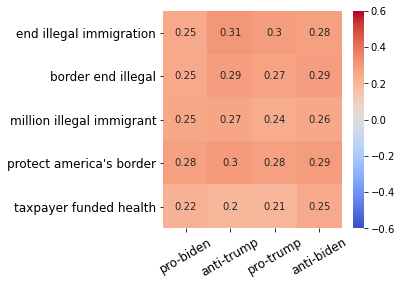

<Figure size 432x288 with 0 Axes>

In [2205]:
import seaborn as sn
plt.figure(figsize = (4,4))
sn.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, vmin=-.6, vmax=.6, square=False)
#plt.subplots_adjust(left=0.4)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.plot()
#plt.savefig('image/heatmap_covid_pt.png', dpi=200, bbox_inches = "tight") 
#plt.savefig('image/heatmap_immigration_change.png', dpi=200, bbox_inches = "tight") 
plt.show()
plt.close()
plt.cla()
plt.clf()


In [1043]:
# def normalize_mf(mf):
#     if mf == 'fairness/cheating':
#         return 'fair/cheat'
#     elif mf == 'liberty/oppression':
#         return 'lib/opp'
#     elif mf == 'authority/subversion':
#         return 'auth/subv'
#     elif mf == 'sanctity/degradation':
#         return 'pure/degrade'
#     elif mf == 'purity/degradation':
#         return 'pure/degrade'
#     elif mf == 'loyalty/betrayal':
#         return 'loyal/betray'
#     else:
#         return mf


# id2theme = {}
# with open('data/has_theme_original.txt') as fp:
#     for line in fp:
#         _id, _theme = line.strip().split('\t')
#         id2theme[_id] = _theme
# #print(id2theme)
# id2stance = {}
# with open('data/has_stance.txt') as fp:
#     for line in fp:
#         _id, _stance = line.strip().split('\t')
#         id2stance[_id] = int(_stance)
# id2mf = {}
# with open('data/has_mf.txt') as fp:
#     for line in fp:
#         _id, _mf = line.strip().split('\t')
#         id2mf[_id] = normalize_mf(_mf)

# topics = []; stances = []; mfs = []
# for _id in id2theme:
#     if _id in id2stance and _id in id2mf:
#         topics.append(id2theme[_id])
#         stances.append(id2stance[_id])
#         mfs.append(id2mf[_id])
# #print(topics)
# #print('stance', stances)

In [1044]:
# def get_stance_correlation(topic_labels, stance_labels):
# #     topic_label_set = set(topic_labels)

# #     topic_variables = {}
# #     for lbl in topic_label_set:
# #         topic_variables[lbl] = []
#     topic_variables = {'t1': [], 't2': [], 't3': [], 't4': [], 't5': []}
#     topic_idx_map = ['t1','t2','t3','t4','t5']
#     stance_variables = {'pro-biden': [], 'anti-trump': [], 'pro-trump': [], 'anti-biden': []}
#     stance_idx_map = ['pro-biden', 'anti-trump', 'pro-trump', 'anti-biden']
# #    topic_variables = topic_labels
# #     for topic_lbl, stance_lbl in zip(topic_labels, stance_labels):
# #         #print(topic_lbl)
# #         for var in topic_variables:
# #             if topic_lbl == var:
# #                 topic_variables[var].append(1)
# #             else:
# #                 topic_variables[var].append(0)
# #         for var in stance_variables:
# #             if stance_idx_map[stance_lbl] == var:
# #                 stance_variables[var].append(1)
# #             else:
# #                 stance_variables[var].append(0)
#     df1 = pd.DataFrame(topic_labels)
#     #print(df1)
#     df2 = pd.DataFrame(stance_labels)
#     #print(df2)
#     #corrMatrix = corr(df2, df1)
#     corrMatrix = pd.concat([df2, df1], axis=1, keys=['df2', 'df1']).corr().loc['df1', 'df2']
#     print(corrMatrix)
#     return corrMatrix



def get_stance_correlation(topic_labels, stance_labels):
    #print(len(topic_labels ))
    topic_label_set = set(topic_labels)
    #print(topic_label_set)
    topic_variables = {}
    for lbl in topic_label_set:
        topic_variables[lbl] = []
    #print(topic_variables)
    stance_variables = {'pro-vax': [], 'anti-vax': [], 'neutral': [], 'stance-unknown': []}
    stance_idx_map = ['pro-vax', 'anti-vax', 'neutral', 'stance-unknown']

    for topic_lbl, stance_lbl in zip(topic_labels, stance_labels):
        #print('topic_lbl ', topic_lbl, 'stance_lbl ' , stance_lbl)
        for var in topic_variables:
            if topic_lbl == var:
                topic_variables[var].append(1)
            else:
                topic_variables[var].append(0)
        for var in stance_variables:
            if stance_idx_map[stance_lbl] == var:
                stance_variables[var].append(1)
            else:
                stance_variables[var].append(0)
    #print(topic_variables)
    df1 = pd.DataFrame(topic_variables, columns=topic_variables.keys())
    #print(df1)
    df2 = pd.DataFrame(stance_variables, columns=['pro-vax', 'anti-vax'])
    #print(stance_variables, df2)
    #corrMatrix = corr(df2, df1)
    corrMatrix = pd.concat([df2, df1], axis=1, keys=['df2', 'df1']).corr().loc['df1', 'df2']
    print(corrMatrix)
    return corrMatrix


                         pro-vax  anti-vax
BigPharmaAnti          -0.178888  0.178888
vaccineDoesntWork       0.210209 -0.210209
VaccineOppression      -0.038710  0.038710
GovDistrust            -0.048724  0.048724
VaccineDanger          -0.024617  0.024617
CovidFake               0.118974 -0.118974
VaccineNotTested       -0.053452  0.053452
NaturalImmunityPro      0.070271 -0.070271
vaccineAgainstReligion  0.049103 -0.049103
<class 'pandas.core.frame.DataFrame'> Index(['BigPharmaAnti', 'vaccineDoesntWork', 'VaccineOppression',
       'GovDistrust', 'VaccineDanger', 'CovidFake', 'VaccineNotTested',
       'NaturalImmunityPro', 'vaccineAgainstReligion'],
      dtype='object')


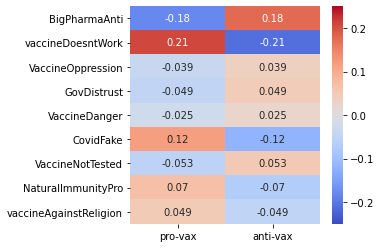

<Figure size 432x288 with 0 Axes>

In [1047]:
import seaborn as sn
corrMatrix = get_stance_correlation(topics, stances)
print(type(corrMatrix), corrMatrix.index)
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm', center=0, vmin=-0.25, vmax=0.25, square=False)
plt.subplots_adjust(left=0.35)
plt.plot()
#plt.savefig('{}_stance_correlations.png'.format(theme_file))
plt.show()
plt.close()
plt.cla()
plt.clf()



In [780]:
# true_trigrams_series.sort_values().plot.barh(color='blue', fontsize=14, width=.9, figsize=(12, 8))
# plt.title('15 Most Frequently Occurring Trigrams', fontsize=14)
# plt.ylabel('Trigram', fontsize=14)
# plt.xlabel('# of Occurances', fontsize=14)

# plt.savefig("image/at_trigram.png", dpi=200, bbox_inches = "tight") 
# plt.show()

In [542]:
#wd = new_df[new_df['ad_creative_body'].str.contains('healthcare')]
wd1 = new_df[ ~new_df['ad_creative_body'].str.contains('healthcare') ]

wd = wd1[ ~wd1['ad_creative_body'].str.contains('Make America Great Again')]
print(wd)
wd.to_csv('bal.csv')

                      id                                   ad_creative_body  \
0        760713291157800  Trump is a "climate arsonist" and "climate den...   
3        653784258879707  Trump is a "climate arsonist" and "climate den...   
6        621482761788913  Trump is a "climate arsonist" and "climate den...   
8        664254741166305  Trump is a "climate arsonist" and "climate den...   
11       810669683067159  83% of Trump's tax giveaway will flow to the t...   
...                  ...                                                ...   
852767  3097119380394798  Swats away flies and lies. Get yours today: \n...   
852768  3796917330330480  Swats away flies and lies. Get yours today: \n...   
852769  1103944103357386  Swats away flies and lies. Get yours today: \n...   
852770  1250093488683245  Swats away flies and lies. Get yours today: \n...   
852777   991508644587877  Swats away flies and lies. Get yours today: \n...   

             funding_entity ad_delivery_start_time 

In [543]:
wdg = basic_clean(''.join(str(wd['ad_creative_body'].tolist())))


In [544]:
wdg_series = (pd.Series(nltk.ngrams(wdg, 3)).value_counts())[:25]


In [545]:
wdg_series

(defeat, donald, trump)               9409
(outnrequest, ballot, today)          8397
(running, outnrequest, ballot)        8397
(time, running, outnrequest)          8397
(today, time, running)                8299
(ballot, today, time)                 8295
(candidate, candidate, committee)     8139
(authorized, candidate, candidate)    8130
(not, authorized, candidate)          8128
(action, not, authorized)             6020
(political, action, not)              6019
(affordable, care, act)               4350
(amy, coney, barrett)                 3642
(defeat, trump, gop)                  3257
(donald, trump, republican)           3101
(sign, vote, mail)                    3032
(trump, supreme, court)               2718
(donald, trump, november)             2526
(sure, joe, biden)                    2457
(president, donald, trump)            2404
(united, state, postal)               2330
(vote, mail, today)                   2313
(trump, doesnt, want)                 2308
(condemn, d

In [206]:
import scipy.stats as stats
stats.zscore(wdg_series)

array([ 1.61492157,  1.23863552,  1.23863552,  1.23863552,  1.20219675,
        1.20070945,  1.14270488,  1.13935847,  1.13861482,  0.35480949,
        0.35443766, -0.26613686, -0.52938837, -0.67254067, -0.73054524,
       -0.7562011 , -0.87295389, -0.94434413, -0.97      , -0.98970668,
       -1.01722167, -1.02354268, -1.0254018 , -1.03172281, -1.03395375])

In [178]:
new_df

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2
3,653784258879707,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001443', 'age': '18-24', 'g...",3,2,2
6,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001205', 'age': '25-34', 'g...",3,2,2
8,664254741166305,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.003391', 'age': '25-34', 'g...",3,2,2
11,810669683067159,83% of Trump's tax giveaway will flow to the t...,BIDEN FOR PRESIDENT,2020-11-03,2020-11-04,"{'lower_bound': '40000', 'upper_bound': '44999'}","{'lower_bound': '2000', 'upper_bound': '2499'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.001668', 'age': '35-44', 'g...",3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
852767,3097119380394798,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.035714', 'region': 'Minneso...","[{'percentage': '0.035714', 'age': '55-64', 'g...",3,6,2
852768,3796917330330480,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-04,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.041667', 'region': 'Marylan...","[{'percentage': '0.041667', 'age': '45-54', 'g...",3,6,2
852769,1103944103357386,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.083333', 'region': 'Massach...","[{'percentage': '0.166667', 'age': '55-64', 'g...",3,6,2
852770,1250093488683245,Swats away flies and lies. Get yours today: \n...,Dems For USA,2020-10-26,2020-11-03,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.071429', 'region': 'New Yor...","[{'percentage': '0.214286', 'age': '55-64', 'g...",3,6,2


## Wordclouds

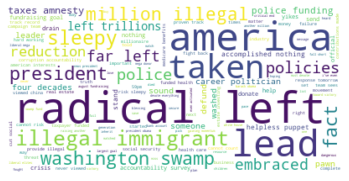

In [43]:
#!pip install wordcloud
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#get stop words of all languages
#STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
# # Create stopword list:
# stopwords = set(STOPWORDS)
stop_words.update(["would","get","going","across","held","join","joe", "biden", "kamala", "harris","make","donald","trump","pence","election","have","not"
                   "need","know", "november","will","be","is","us","now","tommorow","today","yesterday","take","democrats","democrat","republican", "republicans",
                   "sure", "country","state", "county","p","tonight","like","ready","time","tell","midnight","year","month","week","day",
                  "want","three","please","ever","years","months","days","hour","hours","amount","wants","democratic",
                   "show","pm","am","need","let","contribute","use","used","really","think","new","party","name",
                   ])

# stop_words.update(["would","get","going","across","held","join","joe", "biden", "kamala", "harris","make","donald","trump","pence","election","have","not"
#                    "need","know", "november","will","be","is","us","now","tommorow","today","yesterday","take","democrats","democrat","republican", "republicans",
#                    "sure", "country","state", "county","p","tonight","like","ready","time","tell","midnight","year","month","week","day",
#                   "want","three","please","ever","years","months","days","hour","hours","amount","wants","democratic",
#                    "show","pm","am","need","let","contribute","use","used","really","think","new","party","name",
#                    "defeat","vote","bernie","sanders","presidential","president","ballot","campaign","see","donation",
#                    "chip","candidate","moven","org", "senate","donate","one","people","jill","poll","niece","survey","minutes",
#                   "http","trump2020","coin","https","www","trump2020","biden-harris","trump-pence","biden2020","com","moveon",
#                    "conservatecollections",'hat','conservatecollection','conservativecollections.','even','give'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Demographic analysis for whole data with stance and issue

In [761]:
avg_imp = []
avg_spend = []
for j in range (0, predicted_fb_all.shape[0] ):
    dic_imp = eval(predicted_fb_all['impressions'][j])
    dic_cost = eval(predicted_fb_all['spend'][j])
    dic_imp_new = dict([k, float(v)] for k, v in dic_imp.items()) 
    dic_cost_new = dict([k, float(v)] for k, v in dic_cost.items()) 
    #print(dic_imp_new) 
    imp = sum(dic_imp_new.values()) / len(dic_imp_new)
    avg_imp.append(imp) # avg of impression
    cost = sum(dic_cost_new.values()) / len(dic_cost_new)
    avg_spend.append(cost) # avg of spend

In [762]:
predicted_fb_all['avg_imp'] = avg_imp
predicted_fb_all['avg_spend'] = avg_spend
predicted_fb_all['date']= pd.to_datetime(predicted_fb_all['ad_delivery_start_time']) #convert string to date-time

In [339]:
#eval(predicted_fb_all['demographic_distribution'][100]) #list

In [340]:
#eval(predicted_fb_all['demographic_distribution'][100])[0]

In [763]:
##### Demographic age
# - 13-17
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []
imp = []
reg = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['age'] == '18-24' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        
        elif dic['age'] == '65+' :
            ad_id.append(predicted_fb_all.id[j])
            text.append(predicted_fb_all.ad_creative_body[j])
            fe.append(predicted_fb_all.funding_entity[j])
            imp.append(predicted_fb_all.avg_imp[j])
            age.append(dic['age'])
            reg.append(predicted_fb_all.region_distribution[j])
            stance_p.append(predicted_fb_all.pred_stance[j])
            issue_p.append(predicted_fb_all.pred_issue[j])
        

In [764]:
age_df = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age': age, 'avg_imp' : imp, 'region_distribution': reg,'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [765]:
age_df 

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2
...,...,...,...,...,...,...,...,...
10028467,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2
10028468,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2
10028469,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2
10028470,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2


In [766]:
# dfc = age_df.groupby(['age', 'pred_stance']).agg({'id': 'count'})
dfc = age_df.groupby(['pred_stance', 'age']).agg({'id': 'count'})
dfc

id
pred_stance age           
-1          18-24       25
            25-34       25
            35-44       25
            45-54       24
            55-64       21
            65+         21
 0          13-17      193
            18-24    45634
            25-34    54622
            35-44    60896
            45-54    60425
            55-64    59892
            65+      59673
 1          13-17      911
            18-24   681327
            25-34   871622
            35-44   947448
            45-54   996610
            55-64  1021365
            65+     998114
 2          13-17      363
            18-24   168706
            25-34   210444
            35-44   231740
            45-54   240216
            55-64   246941
            65+     243474
 3          13-17     2302
            18-24   377257
            25-34   475758
            35-44   505406
            45-54   497137
            55-64   490712
            65+     479143

In [613]:
# gender_age_summary=age_df.groupby(['pred_stance','age']).agg(tot_stance=('id','count')).unstack()
# gender_age_summary.head()
# gender_age_summary.plot(kind='bar', figsize=(10,6), stacked=True);
# plt.title('Summary of stances by Gender & Age');
# plt.xlabel('Age');
# plt.ylabel('#Stances');

In [767]:
##### Demographic gender
# demo_genders:
#   - male
#   - female
#   - unknown

# ad_id = []
# stance_p = []
# text = []
# fe = []
gender = []
# issue_p = []
impression = []
for j in range (0, predicted_fb_all.shape[0] ):
    list_dic = eval(predicted_fb_all['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        impression.append(dic['percentage'])
        if dic['gender'] == 'male' :
#             ad_id.append(predicted_fb_all.id[j])
#             text.append(predicted_fb_all.ad_creative_body[j])
#             fe.append(predicted_fb_all.funding_entity[j])
            gender.append(dic['gender'])

#             stance_p.append(predicted_fb_all.pred_stance[j])
#             issue_p.append(predicted_fb_all.pred_issue[j])
            
        elif dic['gender'] == 'female' :
#             ad_id.append(predicted_fb_all.id[j])
#             text.append(predicted_fb_all.ad_creative_body[j])
#             fe.append(predicted_fb_all.funding_entity[j])
            gender.append(dic['gender'])
#             stance_p.append(predicted_fb_all.pred_stance[j])
#             issue_p.append(predicted_fb_all.pred_issue[j])
        elif dic['gender'] == 'unknown' :
#             ad_id.append(predicted_fb_all.id[j])
#             text.append(predicted_fb_all.ad_creative_body[j])
#             fe.append(predicted_fb_all.funding_entity[j])
            gender.append(dic['gender'])
#             stance_p.append(predicted_fb_all.pred_stance[j])
#             issue_p.append(predicted_fb_all.pred_issue[j])
        

In [768]:
gender_df = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender': gender, 'ag_imp':impression, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [769]:
age_df['gender'] = gender
age_df['ag_imp'] = impression

In [770]:
age_df

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue,gender,ag_imp
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.508772
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.274854
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.017544
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.076023
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.05848
...,...,...,...,...,...,...,...,...,...,...
10028467,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.191011
10028468,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.087079
10028469,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.058989
10028470,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,unknown,0.002809


## stance vs demographic

In [771]:
#drop "none" (-1) stance
new_age_df = age_df[age_df.pred_stance != -1]

In [772]:
new_age_df.id.nunique() #852790

852790

In [773]:
new_age_df

,id,ad_creative_body,funding_entity,age,avg_imp,region_distribution,pred_stance,pred_issue,gender,ag_imp
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.508772
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,female,0.274854
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.017544
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.076023
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,"[{'percentage': '1', 'region': 'Wisconsin'}]",3,2,male,0.05848
...,...,...,...,...,...,...,...,...,...,...
10028467,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.191011
10028468,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.087079
10028469,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,female,0.058989
10028470,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,"[{'percentage': '1', 'region': 'Texas'}]",0,2,unknown,0.002809


In [774]:
new_age_df['region_distribution']

0           [{'percentage': '1', 'region': 'Wisconsin'}]
1           [{'percentage': '1', 'region': 'Wisconsin'}]
2           [{'percentage': '1', 'region': 'Wisconsin'}]
3           [{'percentage': '1', 'region': 'Wisconsin'}]
4           [{'percentage': '1', 'region': 'Wisconsin'}]
                                ...                     
10028467        [{'percentage': '1', 'region': 'Texas'}]
10028468        [{'percentage': '1', 'region': 'Texas'}]
10028469        [{'percentage': '1', 'region': 'Texas'}]
10028470        [{'percentage': '1', 'region': 'Texas'}]
10028471        [{'percentage': '1', 'region': 'Texas'}]
Name: region_distribution, Length: 10028331, dtype: object

## chi-square test age and stance

In [646]:
####....age-gender-stance #

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female')]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female')]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female'))]

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female')]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female')]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female'))]


####....age-gender-stance-issue #

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 1) | (new_age_df['pred_stance'] == 2) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female')) &  (new_age_df['pred_issue'] == 0)]

#young adulthood age (18-34)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '18-24') | (new_age_df['age'] == '25-34') ) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#middle age (35-54)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '35-44') | (new_age_df['age'] == '45-54')) &  (new_age_df['gender'] == 'female') &  (new_age_df['pred_issue'] == 0)]
#older age (56+)
#chi_df = new_age_df.loc[((new_age_df['pred_stance'] == 0) | (new_age_df['pred_stance'] == 3) )  & ( (new_age_df['age'] == '55-64') | (new_age_df['age'] == '65+') ) &  ((new_age_df['gender'] == 'female')) &  (new_age_df['pred_issue'] == 0)]


# ####....age-gender-stance-state #
# #older age (56+)
# ad_id = []
# text = []
# fe = []
# imp = []
# age = []
# ag_imp = []
# gender = []
# stance_p = []
# issue_p = []
# for j in range (0, new_age_df.shape[0] ):
#     list_dic = eval(new_age_df['region_distribution'][j])
#     #print (list_dic)
#     #sys.exit()
#     for i in range (0, len(list_dic)):
#         dic = list_dic[i]
#         if  dic['region'] == 'Pennsylvania': #'Pennsylvania': #we checked for Alabama(c), Florida(s) in the paper
#             ad_id.append(new_age_df.id[j])
#             text.append(new_age_df.ad_creative_body[j])
#             fe.append(new_age_df.funding_entity[j])
#             imp.append(new_age_df.avg_imp[j])
#             age.append(new_age_df.age[j])
#             ag_imp.append(new_age_df.ag_imp[j])
#             gender.append(new_age_df.gender[j])
#             stance_p.append(new_age_df.pred_stance[j])
#             issue_p.append(new_age_df.pred_issue[j])
            
# reg_chi = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 'age' : age,
#                         'gender': gender, 'ag_imp':impression, 'avg_imp':imp, 'pred_stance' : stance_p, 'pred_issue' : issue_p
#                         }) 

# chi_df = reg_chi.loc[((reg_chi['pred_stance'] == 1) | (reg_chi['pred_stance'] == 2) )  & ( (reg_chi['age'] == '55-64') | (reg_chi['age'] == '65+') ) &  ((reg_chi['gender'] == 'female')) ]


chi_df = new_age_df.pivot_table(values = 'id', index='pred_stance', columns='age', aggfunc='count')
chi_df



age,13-17,18-24,25-34,35-44,45-54,55-64,65+
pred_stance,,,,,,,
0,193,45634,54622,60896,60425,59892,59673
1,911,681327,871622,947448,996610,1021365,998114
2,363,168706,210444,231740,240216,246941,243474
3,2302,377257,475758,505406,497137,490712,479143


In [ ]:
# ## indexing for further analysis
# chi_idx = chi_df.index
# print(chi_idx)
# chi_df['age'] = chi_idx.values
# chi_df = chi_df.reset_index(drop=True) 
# print(chi_df)
# #new_chi_df = chi_df.rename({})

In [775]:
#contingency = pd.crosstab(new_age_df['pred_stance'], new_age_df["age"]) # all age group and all stances
contingency_gen = pd.crosstab(new_age_df['pred_stance'], new_age_df["gender"]) # all gender and all stances
#contingency = pd.crosstab(new_age_df['pred_stance'], new_age_df["gender"]) # all gender group and all stances
#contingency = pd.crosstab(chi_df['pred_stance'], chi_df["age"]) #multiple stances, multiple age group, female

contingency_gen

gender,female,male,unknown
pred_stance,,,
0,129771,127488,84076
1,2210042,2246289,1061066
2,527956,548100,265828
3,1088720,1065174,673821


In [665]:
observed_values = contingency.values
observed_values


array([[    193,   45634,   54622,   60896,   60425,   59892,   59673],
       [    911,  681327,  871622,  947448,  996610, 1021365,  998114],
       [    363,  168706,  210444,  231740,  240216,  246941,  243474],
       [   2302,  377257,  475758,  505406,  497137,  490712,  479143]])

In [ ]:
import scipy.stats as stats
vals = stats.chi2_contingency(contingency)
vals

In [ ]:
alpha=0.05
dof = 1 #degree of freedom
critical_value = stats.chi2.ppf(q = 1-alpha, df = dof)
critical_value

### create column percentage for age from contingency table

In [694]:
col0_sum = contingency['13-17'].values.sum()
#print(col0_sum)
col0_per = ((contingency['13-17'].values/col0_sum)*100).round()
print(col0_per)

col1_sum = contingency['18-24'].values.sum()
col1_per = ((contingency['18-24'].values/col1_sum)*100).round()
print(col1_per)

col2_sum = contingency['25-34'].values.sum()
col2_per = ((contingency['25-34'].values/col2_sum)*100).round()
print(col2_per)


col3_sum = contingency['35-44'].values.sum()
#print(col3_sum)
col3_per = ((contingency['35-44'].values/col3_sum)*100).round()
print(col3_per)

col4_sum = contingency['45-54'].values.sum()
col4_per = ((contingency['45-54'].values/col4_sum)*100).round()
print(col4_per)

col5_sum = contingency['55-64'].values.sum()
col5_per = ((contingency['55-64'].values/col5_sum)*100).round()
print(col5_per)

col6_sum = contingency['65+'].values.sum()
col6_per = ((contingency['65+'].values/col6_sum)*100).round()
print(col6_per, col6_per[0],  col6_per[1])

[ 5. 24. 10. 61.]
[ 4. 54. 13. 30.]
[ 3. 54. 13. 30.]
[ 3. 54. 13. 29.]
[ 3. 56. 13. 28.]
[ 3. 56. 14. 27.]
[ 3. 56. 14. 27.] 3.0 56.0


<BarContainer object of 6 artists>

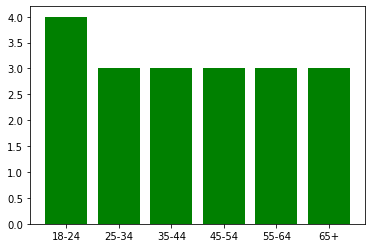

In [706]:
names_pb = ['18-24', '25-34', '35-44', '45-54','55-64', '65+']
values_pb = [ col1_per[0], col2_per[0], col3_per[0], col4_per[0], col5_per[0], col6_per[0]]
plt.bar(names_pb, values_pb, color = 'green')

<BarContainer object of 6 artists>

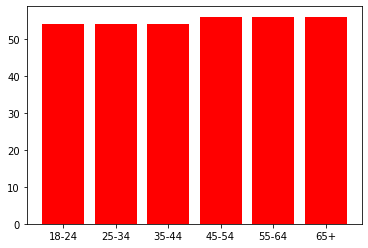

In [707]:
names_pt = ['18-24', '25-34', '35-44', '45-54','55-64', '65+']
values_pt = [ col1_per[1], col2_per[1], col3_per[1], col4_per[1], col5_per[1], col6_per[1]]
plt.bar(names_pt, values_pt, color = 'red')

<BarContainer object of 6 artists>

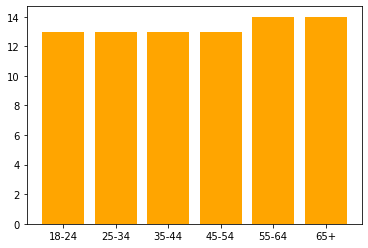

In [708]:
names_ab = ['18-24', '25-34', '35-44', '45-54','55-64', '65+']
values_ab = [col1_per[2], col2_per[2], col3_per[2], col4_per[2], col5_per[2], col6_per[2]]
plt.bar(names_ab, values_ab, color = 'orange')

<BarContainer object of 6 artists>

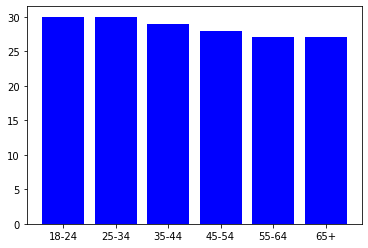

In [709]:
names_at = ['18-24', '25-34', '35-44', '45-54','55-64', '65+']
values_at = [col1_per[3], col2_per[3], col3_per[3], col4_per[3], col5_per[3], col6_per[3]]
plt.bar(names_at, values_at, color = 'blue')

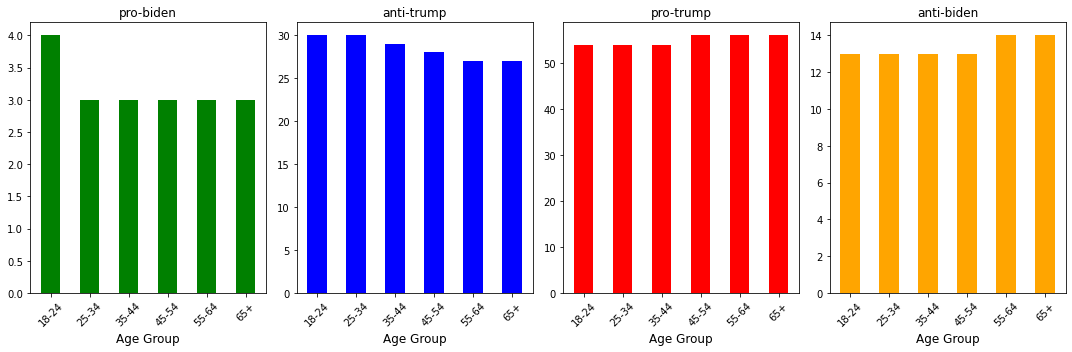

In [746]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.bar( names_pb, values_pb, color = 'green', width = 0.5)
plt.title('pro-biden', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 4, 2)
plt.bar( names_at, values_at, color = 'blue',  width = 0.5)
plt.title('anti-trump', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 4, 3)
plt.bar( names_pt, values_pt, color = 'red',  width = 0.5)
plt.title('pro-trump', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 4, 4)
plt.bar( names_ab, values_ab, color = 'orange',  width = 0.5)
plt.title('anti-biden', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("image/stance_age_per.png", dpi=300, bbox_inches = "tight") 

### create column percentage for gender from gender contingency table

In [776]:
contingency_gen

gender,female,male,unknown
pred_stance,,,
0,129771,127488,84076
1,2210042,2246289,1061066
2,527956,548100,265828
3,1088720,1065174,673821


In [777]:
col0_sum = contingency_gen['female'].values.sum()
print(col0_sum)
col0_per = ((contingency_gen['female'].values/col0_sum)*100).round()
print(col0_per)

col1_sum = contingency_gen['male'].values.sum()
col1_per = ((contingency_gen['male'].values/col1_sum)*100).round()
print(col1_per)

col2_sum = contingency_gen['unknown'].values.sum()
col2_per = ((contingency_gen['unknown'].values/col2_sum)*100).round()
print(col2_per)



3956489
[ 3. 56. 13. 28.]
[ 3. 56. 14. 27.]
[ 4. 51. 13. 32.]


<BarContainer object of 3 artists>

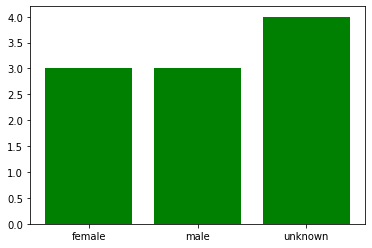

In [778]:
names_gen_pb = ['female', 'male', 'unknown']
values_gen_pb = [ col0_per[0], col1_per[0], col2_per[0]]
plt.bar(names_gen_pb, values_gen_pb, color = 'green')

<BarContainer object of 3 artists>

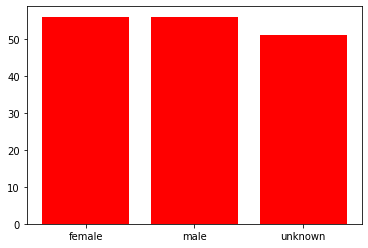

In [779]:
names_gen_pt = ['female', 'male', 'unknown']
values_gen_pt = [ col0_per[1], col1_per[1], col2_per[1]]
plt.bar(names_gen_pt, values_gen_pt, color = 'red')

<BarContainer object of 3 artists>

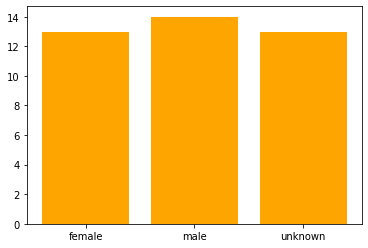

In [756]:
names_gen_ab = ['female', 'male', 'unknown']
values_gen_ab = [ col0_per[2], col1_per[2], col2_per[2]]
plt.bar(names_gen_ab, values_gen_ab, color = 'orange')

<BarContainer object of 3 artists>

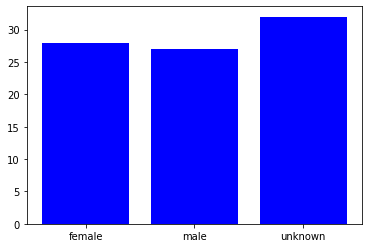

In [757]:
names_gen_at = ['female', 'male', 'unknown']
values_gen_at = [ col0_per[3], col1_per[3], col2_per[3]]
plt.bar(names_gen_at, values_gen_at, color = 'blue')

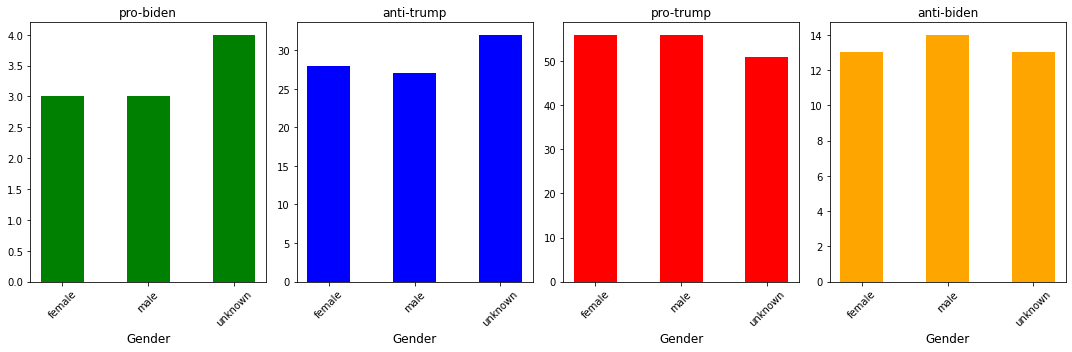

In [759]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.bar( names_gen_pb, values_gen_pb, color = 'green', width = 0.5)
plt.title('pro-biden', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 4, 2)
plt.bar( names_gen_at, values_gen_at, color = 'blue',  width = 0.5)
plt.title('anti-trump', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 4, 3)
plt.bar( names_gen_pt, values_gen_pt, color = 'red',  width = 0.5)
plt.title('pro-trump', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 4, 4)
plt.bar( names_gen_ab, values_gen_ab, color = 'orange',  width = 0.5)
plt.title('anti-biden', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("image/stance_gen_per.png", dpi=300, bbox_inches = "tight") 

<ipython-input-113-c4830b26bde5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


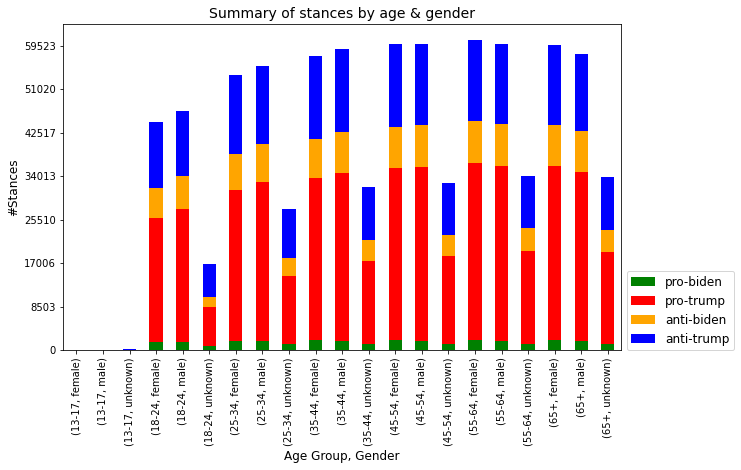

In [113]:
gender_age_summary=new_age_df.groupby(['age', 'gender','pred_stance']).agg(stance=('id','count')).unstack()
gender_age_summary.head()
g = gender_age_summary.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['green', 'red', 'orange', 'blue']);
plt.title('Summary of stances by age & gender', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Stances', fontsize=12);
plt.xticks(rotation=90)
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/11.76]
g.set_yticklabels(ylabels)
plt.savefig("image/age_gender_stance.png", dpi=300, bbox_inches = "tight") 
plt.show()


In [306]:
gender_age_summary

stance                       
pred_stance        0       1      2       3
age   gender                               
13-17 female      49     239     96     545
      male        55     247     95     529
      unknown     89     425    172    1228
18-24 female   18112  285234  69743  151464
      male     18005  306838  76305  148580
      unknown   9517   89255  22658   77213
25-34 female   20650  347839  82241  182268
      male     20484  365494  88106  180400
      unknown  13488  158289  40097  113090
35-44 female   22801  372899  89281  192823
      male     22479  384904  94621  189971
      unknown  15616  189645  47838  122612
45-54 female   22824  396593  93656  190943
      male     22370  399185  96731  186955
      unknown  15231  200832  49829  119239
55-64 female   22772  406921  96654  187952
      male     22120  401723  97285  182535
      unknown  15000  212721  53002  120225
65+   female   22563  400317  96285  182725
      male     21975  387898  94957  176204
      unknown  15135  209899  52232  120214

## issue vs demographic

In [114]:
#drop "none" (-1) issue
new_age_df = age_df[age_df.pred_issue != -1]
new_age_df = new_age_df.reset_index(drop=True)
new_age_df

,id,ad_creative_body,funding_entity,age,avg_imp,pred_stance,pred_issue,gender,ag_imp
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,3,2,female,0.508772
1,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,3,2,female,0.274854
2,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,35-44,499.5,3,2,male,0.017544
3,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,499.5,3,2,male,0.076023
4,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,499.5,3,2,male,0.05848
...,...,...,...,...,...,...,...,...,...
9485501,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,0,2,female,0.191011
9485502,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,0,2,female,0.087079
9485503,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,0,2,female,0.058989
9485504,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,0,2,unknown,0.002809


<ipython-input-115-99559078165a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


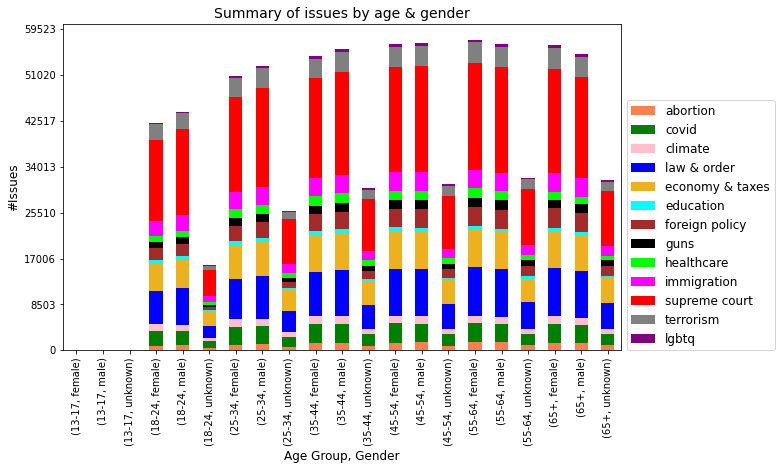

In [115]:
gender_age_summary=new_age_df.groupby(['age', 'gender','pred_issue']).agg(stance=('id','count')).unstack()
gender_age_summary.head()
g = gender_age_summary.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['coral', 'green', 'pink', 'blue', '#EDB120', 'cyan', 'brown', 'black', 'lime', 'magenta', 'red', 'gray','purple']);
plt.title('Summary of issues by age & gender', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Issues', fontsize=12);
plt.xticks(rotation=90)
newnames = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/11.76]
g.set_yticklabels(ylabels)
plt.savefig("image/age_gender_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [297]:
#gender_age_summary.to_csv("data/aba.csv")

In [298]:
# dfc = gender_df.groupby(['gender', 'pred_stance']).agg({'id': 'count'})
# dfc = gender_df.groupby(['pred_stance', 'gender']).agg({'id': 'count'})
# dfc

## impression vs demographic


### check pro-biden, pro-trump, anti-biden, anti-trump stance separately

In [369]:
#stance_imp_df = age_df.loc[(age_df['pred_stance'] == 0) | (age_df['pred_stance'] == 1) ]
stance_imp_df = age_df.loc[(age_df['pred_stance'] == 0)] #pro-biden , 341335
#stance_imp_df = age_df.loc[(age_df['pred_stance'] == 1)] #pro-trump , 5517397
#stance_imp_df = age_df.loc[(age_df['pred_stance'] == 2)] #anti-biden , 1341884
#stance_imp_df = age_df.loc[(age_df['pred_stance'] == 3)] #anti-trump, 2827715, 10028331
stance_imp_df = stance_imp_df.reset_index(drop=True)
#convert value of specific column of dataframe str to flot 
stance_imp_df['ag_imp'] =  stance_imp_df['ag_imp'].astype(float)
#stance_imp_df["ag_imp"] = 100 * stance_imp_df["ag_imp"]
stance_imp_df["ag_imp"] = (stance_imp_df["avg_imp"] * stance_imp_df["ag_imp"])
stance_imp_df

,id,ad_creative_body,funding_entity,age,avg_imp,pred_stance,pred_issue,gender,ag_imp
0,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,55-64,32499.5,0,8,unknown,33.441986
1,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,65+,32499.5,0,8,unknown,37.471923
2,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,65+,32499.5,0,8,male,1537.843840
3,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,55-64,32499.5,0,8,male,2111.265019
4,365500694665351,“The nation needs a candidate who can act with...,BIDEN FOR PRESIDENT,55-64,32499.5,0,8,female,4107.026814
...,...,...,...,...,...,...,...,...,...
341330,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,25-34,499.5,0,2,female,95.409994
341331,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,45-54,499.5,0,2,female,43.495961
341332,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,18-24,499.5,0,2,female,29.465006
341333,403567784005339,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,35-44,499.5,0,2,unknown,1.403095


In [370]:

# #group by age, gender based on sum of impression of age gender in pro-biden, anti trump ad
imp = stance_imp_df.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()
print(imp)


              ag_imp                            
gender        female          male       unknown
age                                             
13-17   1.741496e+04  8.535352e+03  4.200854e+02
18-24   3.344071e+07  2.188031e+07  3.486887e+05
25-34   7.199035e+07  5.783972e+07  9.798231e+05
35-44   6.797564e+07  4.939036e+07  1.062992e+06
45-54   6.637024e+07  4.692034e+07  9.374694e+05
55-64   7.550064e+07  4.478393e+07  1.027634e+06
65+     8.525197e+07  4.252124e+07  1.187567e+06


In [371]:
stance_imp_df.ag_imp.sum()/1000000 # total impression = 11733.104273 M (11.7 B)
# pb = 669 M, pt = 5241 M, ab = 1585, at = 5099

669.435992166669

<ipython-input-372-48f72ebe6134>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


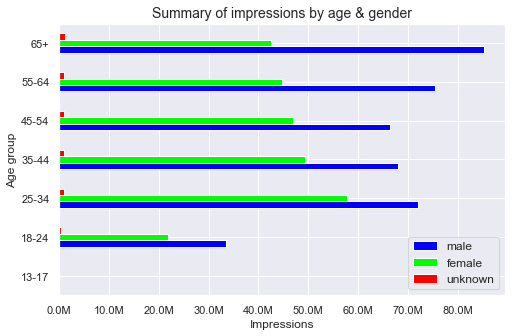

In [372]:
#imp.plot.barh()
g = imp.plot(kind='barh', figsize=(8,5), width = 0.5, color=['blue', 'lime', 'red']);
plt.title('Summary of impressions by age & gender', fontsize=14);
plt.xlabel('Impressions', fontsize=12);
plt.ylabel('Age group', fontsize=12);
xlabels = ['{}'.format(x) + 'M' for x in g.get_xticks()/1000000]
newnames = ['male', 'female', 'unknown']
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(4), fontsize=12)
#plt.savefig("image/age_gender_impression_pro_biden.png", dpi=300, bbox_inches = "tight") 
#plt.savefig("image/age_gender_impression_pro_trump.png", dpi=300, bbox_inches = "tight") 
#plt.savefig("image/age_gender_impression_anti_biden.png", dpi=300, bbox_inches = "tight") 
#plt.savefig("image/age_gender_impression_anti_trump.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [ ]:
# # ### which funding entity has high impression from demographics
# imp = age_df.groupby(['funding_entity'], as_index=False).agg({'ag_imp': 'mean'})
# #imp = pb_df.groupby(['funding_entity '], as_index=False).agg({'ag_imp': 'sum'})
# imp = age_df.groupby(['funding_entity', 'age', 'gender'], as_index=False).agg({'ag_imp': 'mean'})
# print(imp.sort_values(by = 'ag_imp', ascending = False))
# print(imp)

## State-wise Issue and Demographics

### Swing state - PA, age distribution

In [705]:
# ### age PA

# ##### Demographic age
# #   - 18-24
# #   - 25-34
# #   - 35-44
# #   - 45-54
# #   - 55-64
# #   - 65+

# ad_id = []
# stance_p = []
# text = []
# fe = []
# age = []
# issue_p = []

# for j in range (0, swing.shape[0] ):
#     list_dic = eval(swing['demographic_distribution'][j])
#     for i in range (0, len(list_dic)):
#         #print(list_dic[i])  
#         dic = list_dic[i]
#         #print(dic['age'] )
#         #sys.exit()
#         if dic['age'] == '13-17' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
#         elif dic['age'] == '18-24' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
#         elif dic['age'] == '25-34' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
        
#         elif dic['age'] == '35-44' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
            
#         elif dic['age'] == '45-54' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
        
#         elif dic['age'] == '55-64' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
        
#         elif dic['age'] == '65+' :
#             ad_id.append(swing.id[j])
#             text.append(swing.ad_creative_body[j])
#             fe.append(swing.funding_entity[j])
#             age.append(dic['age'])
#             stance_p.append(swing.pred_stance[j])
#             issue_p.append(swing.pred_issue[j])
            
        

In [131]:

### age PA

##### Demographic age
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, top_swing.shape[0] ):
    list_dic = eval(top_swing['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['age'] == '18-24' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        
        elif dic['age'] == '65+' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        

In [132]:
age_swing = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [133]:
new_age_swing = age_swing[age_swing.pred_stance != -1]
new_age_swing = new_age_swing.reset_index(drop=True)
new_age_swing

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2
1,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2
2,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2
3,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2
4,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2
...,...,...,...,...,...,...
1177883,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,55-64,3,6
1177884,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,55-64,3,6
1177885,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,65+,3,6
1177886,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,65+,3,6


In [134]:
dfc = new_age_swing.groupby(['age_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                      
pred_stance           0       1      2      3
age_distribution                             
13-17                15      56     22    194
18-24              8881   90471  17982  42587
25-34             10032  112618  22408  48987
35-44             10048  118773  24337  49724
45-54              9705  125053  24816  46827
55-64              9486  128308  25999  45508
65+                9515  125016  25921  44599

In [135]:
new_age_swing.id.nunique() #102439

102439

<ipython-input-137-45e44dd129bf>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


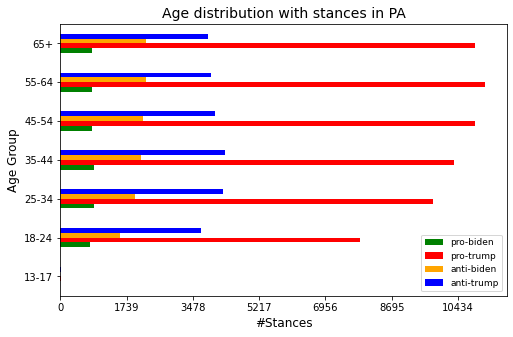

In [137]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.5, color=['green', 'red', 'orange', 'blue']);
plt.title('Age distribution with stances in PA', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Age Group', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#xlabels = ['{}'.format(x) + 'K' for x in g.get_xticks()/1000]
xlabels = ['{}'.format(int(x)) for x in g.get_xticks()/11.5]
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(4), fontsize=9)
#g.get_legend().remove()
plt.savefig("image/age_PA.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Blue state - NY, age distribution

In [145]:
### age NY

##### Demographic age
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, top_blue.shape[0] ):
    list_dic = eval(top_blue['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        if dic['age'] == '13-17' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['age'] == '18-24' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        
        elif dic['age'] == '35-44' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
            
        elif dic['age'] == '45-54' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        
        elif dic['age'] == '55-64' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        
        elif dic['age'] == '65+' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        

In [146]:
age_blue = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [147]:
new_age_blue = age_blue[age_blue.pred_stance != -1]
new_age_blue = new_age_blue.reset_index(drop=True)
new_age_blue

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue
0,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,55-64,3,4
1,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,35-44,3,4
2,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,45-54,3,4
3,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,25-34,3,4
4,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,55-64,3,4
...,...,...,...,...,...,...
488177,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,18-24,0,10
488178,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10
488179,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,55-64,0,10
488180,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10


In [148]:
dfc = new_age_blue.groupby(['age_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                    
pred_stance          0      1     2      3
age_distribution                          
13-17               28     54    18    256
18-24             4314  15699  2458  34687
25-34             5760  21872  3680  47113
35-44             6173  24339  4570  48938
45-54             6081  27099  5059  49431
55-64             6034  28604  5356  50013
65+               6185  27899  5185  51277

In [149]:
new_age_blue.id.nunique() #44586

44586

<ipython-input-150-337029c2ff47>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


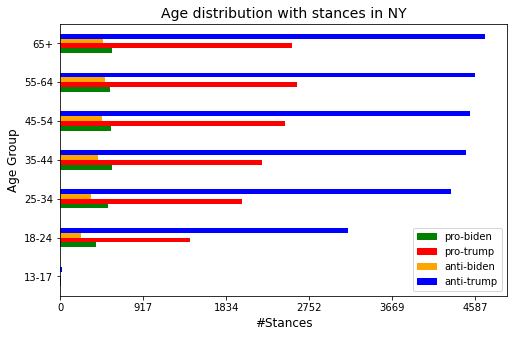

In [150]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.5, color=['green', 'red', 'orange', 'blue']);
plt.title('Age distribution with stances in NY', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Age Group', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
# xlabels = ['{}'.format(x) + 'K' for x in g.get_xticks()/1000]
xlabels = ['{}'.format(int(x)) for x in g.get_xticks()/10.9]
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(4), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/age_NY.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Red state - ID, age distribution

In [151]:
### age Idaho

##### Demographic age
# - 13-17
#   - 18-24
#   - 25-34
#   - 35-44
#   - 45-54
#   - 55-64
#   - 65+

ad_id = []
stance_p = []
text = []
fe = []
age = []
issue_p = []

for j in range (0, top_red.shape[0] ):
    list_dic = eval(top_red['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['age'] == '13-17' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        elif dic['age'] == '18-24' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
            
        elif dic['age'] == '25-34' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        
        elif dic['age'] == '35-44' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
            
        elif dic['age'] == '45-54' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        
        elif dic['age'] == '55-64' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        
        elif dic['age'] == '65+' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            age.append(dic['age'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        

In [152]:
age_red = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'age_distribution': age, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [153]:
new_age_red = age_red[age_red.pred_stance != -1]
new_age_red = new_age_red.reset_index(drop=True)
new_age_red

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue
0,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,65+,2,3
1,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,65+,2,3
2,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,45-54,2,3
3,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,55-64,2,3
4,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,55-64,2,3
...,...,...,...,...,...,...
6882,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,35-44,0,2
6883,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,65+,0,2
6884,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,55-64,0,2
6885,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,45-54,0,2


In [154]:
dfc = new_age_red.groupby(['age_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

# # #group by age, gender based on sum of impression of age gender in pro-biden, anti trump ad
# imp = stance_imp_df.groupby([ 'age' , 'gender']).agg({'ag_imp': 'sum'}).unstack()
# print(imp)

id                      
pred_stance          0       1      2      3
age_distribution                            
13-17              NaN     2.0    NaN    NaN
18-24              1.0   378.0   14.0   72.0
25-34              3.0   602.0   52.0  126.0
35-44              7.0   772.0  100.0  142.0
45-54              9.0  1014.0  152.0  140.0
55-64             15.0  1224.0  192.0  204.0
65+               12.0  1214.0  183.0  257.0

In [155]:
new_age_red.id.nunique() #1406

1406

<ipython-input-156-100d8d33eed5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


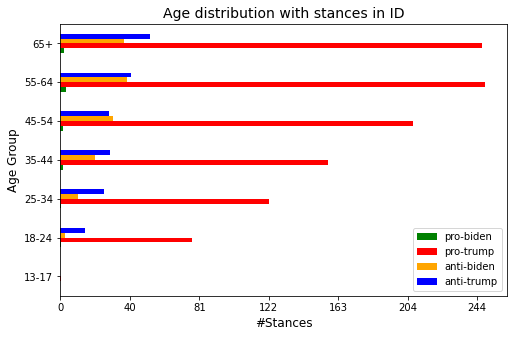

In [156]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.5, color=['green', 'red', 'orange', 'blue']);
plt.title('Age distribution with stances in ID', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Age Group', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#xlabels = ['{}'.format(x) + 'K' for x in g.get_xticks()/1000]
xlabels = ['{}'.format(int(x)) for x in g.get_xticks()/4.9]
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(4), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/age_ID.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Swing state - PA, gender distribution

In [138]:
##### Demographic gender #PA
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, top_swing.shape[0] ):
    list_dic = eval(top_swing['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
            
        elif dic['gender'] == 'unknown' :
            ad_id.append(top_swing.id[j])
            text.append(top_swing.ad_creative_body[j])
            fe.append(top_swing.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_swing.pred_stance[j])
            issue_p.append(top_swing.pred_issue[j])
        

In [139]:
swing_gender = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [140]:
new_swing_gender = swing_gender[swing_gender.pred_stance != -1]
new_swing_gender = new_swing_gender.reset_index(drop=True)
new_swing_gender

,id,ad_creative_body,funding_entity,gender_distribution,pred_stance,pred_issue
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,unknown,3,2
1,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,unknown,3,2
2,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,female,3,2
3,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,female,3,2
4,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,male,3,2
...,...,...,...,...,...,...
1177883,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,female,3,6
1177884,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,male,3,6
1177885,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,male,3,6
1177886,2480065575627370,Swats away flies and lies. Get yours today: \n...,Dems For USA,female,3,6


In [141]:
dfc = new_swing_gender.groupby(['gender_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                       
pred_stance              0       1      2       3
gender_distribution                              
female               22246  284299  55690  107878
male                 21691  288271  58941  104967
unknown              13745  127725  26854   65581

In [142]:
new_swing_gender.id.nunique() #102439

102439

<ipython-input-144-89908d213834>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


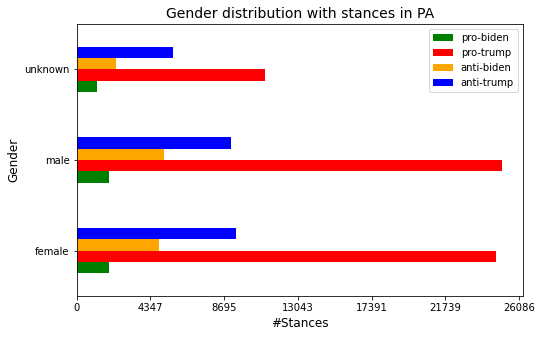

In [144]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.5, color=['green', 'red', 'orange', 'blue']);
plt.title('Gender distribution with stances in PA', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Gender', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#xlabels = ['{}'.format(x) + 'K' for x in g.get_xticks()/1000]
xlabels = ['{}'.format(int(x)) for x in g.get_xticks()/11.5]
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(1), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/gen_PA.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [ ]:
#age_swing  swing_gender

In [45]:
age_swing['gender'] = gender


In [48]:
age_swing

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue,gender
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2,unknown
1,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2,unknown
2,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2,female
3,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2,female
4,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2,male
...,...,...,...,...,...,...,...
6135131,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,male
6135132,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,female
6135133,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,25-34,0,10,female
6135134,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10,unknown


In [52]:
st1 = age_swing[age_swing.pred_stance != -1]
st2 = st1[st1.pred_issue != -1]
st2 = st2.reset_index(drop=True)
st2

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue,gender
0,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2,unknown
1,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2,unknown
2,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2,female
3,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,25-34,3,2,female
4,621482761788913,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,18-24,3,2,male
...,...,...,...,...,...,...,...
5751577,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,male
5751578,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,female
5751579,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,25-34,0,10,female
5751580,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10,unknown


In [83]:
st2.id.nunique() #424895

424895

<ipython-input-117-34a0e9aa0767>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


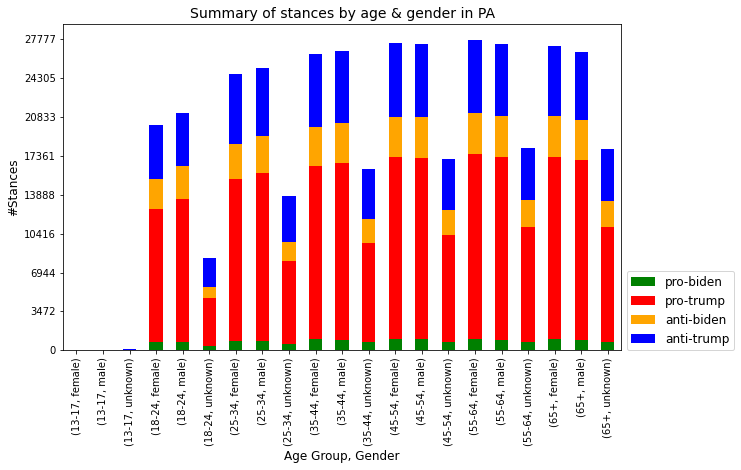

In [117]:
st=st2.groupby(['age_distribution', 'gender','pred_stance']).agg(stance=('id','count')).unstack()
st.head()
g = st.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['green', 'red', 'orange', 'blue']);
plt.title('Summary of stances by age & gender in PA', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Stances', fontsize=12);
plt.xticks(rotation=90)
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
#plt.savefig("image/age_gender_stance.png", dpi=300, bbox_inches = "tight") 
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/14.4]
g.set_yticklabels(ylabels)
plt.savefig("image/PA_age_gender_stance.png", dpi=300, bbox_inches = "tight") 
plt.show()

<ipython-input-107-bb4a164d2ead>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


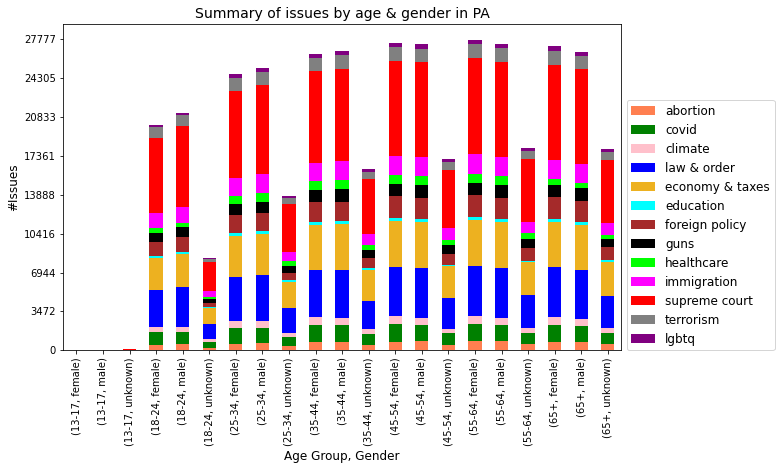

In [107]:
st=st2.groupby(['age_distribution', 'gender','pred_issue']).agg(stance=('id','count')).unstack()
st.head()
g = st.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['coral', 'green', 'pink', 'blue', '#EDB120', 'cyan', 'brown', 'black', 'lime', 'magenta', 'red', 'gray','purple']);
plt.title('Summary of issues by age & gender in PA', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Issues', fontsize=12);
plt.xticks(rotation=90)
newnames = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/14.4]
g.set_yticklabels(ylabels)
plt.savefig("image/cor_PA_age_gender_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Blue state - NY, gender distribution

In [157]:
##### Demographic gender #NY
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, top_blue.shape[0] ):
    list_dic = eval(top_blue['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
            
        elif dic['gender'] == 'unknown' :
            ad_id.append(top_blue.id[j])
            text.append(top_blue.ad_creative_body[j])
            fe.append(top_blue.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_blue.pred_stance[j])
            issue_p.append(top_blue.pred_issue[j])
        

In [158]:
blue_gender = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [159]:
new_blue_gender = blue_gender[blue_gender.pred_stance != -1]
new_blue_gender = new_blue_gender.reset_index(drop=True)
new_blue_gender

,id,ad_creative_body,funding_entity,gender_distribution,pred_stance,pred_issue
0,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,unknown,3,4
1,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,female,3,4
2,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,unknown,3,4
3,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,unknown,3,4
4,2840069269573211,A lot of pundits are in denial. They think thi...,BIDEN VICTORY FUND,male,3,4
...,...,...,...,...,...,...
488177,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,male,0,10
488178,852836738857491,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,female,0,10
488179,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,male,0,10
488180,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,female,0,10


In [160]:
dfc = new_blue_gender.groupby(['gender_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                      
pred_stance              0      1      2       3
gender_distribution                             
female               13282  61403  10990  109852
male                 13046  67196  12340  107233
unknown               8247  16967   2996   64630

In [161]:
new_blue_gender.id.nunique() #44586

44586

<ipython-input-162-2812a76ff0e5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


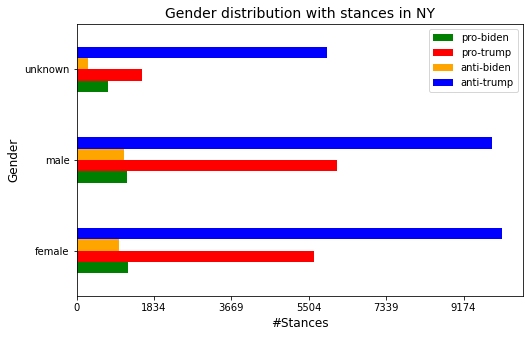

In [162]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.5, color=['green', 'red', 'orange', 'blue']);
plt.title('Gender distribution with stances in NY', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Gender', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#xlabels = ['{}'.format(x) + 'K' for x in g.get_xticks()/1000]
xlabels = ['{}'.format(int(x)) for x in g.get_xticks()/10.9]
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(1), fontsize=10)
plt.savefig("image/gen_NY.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [99]:
age_blue['gender'] = gender
age_blue

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue,gender
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,35-44,3,1,female
1,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,25-34,3,1,male
2,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,18-24,3,1,female
3,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,18-24,3,1,male
4,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,25-34,3,1,female
...,...,...,...,...,...,...,...
5422845,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,male
5422846,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,female
5422847,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,25-34,0,10,female
5422848,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10,unknown


In [100]:
bt1 = age_blue[age_blue.pred_stance != -1]
bt2 = bt1[bt1.pred_issue != -1]
bt2 = bt2.reset_index(drop=True)
bt2

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue,gender
0,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,35-44,3,1,female
1,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,25-34,3,1,male
2,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,18-24,3,1,female
3,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,18-24,3,1,male
4,668248187163165,4 million jobs lost. Thousands of businesses s...,Independence USA PAC,25-34,3,1,female
...,...,...,...,...,...,...,...
5048947,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,male
5048948,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,female
5048949,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,25-34,0,10,female
5048950,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10,unknown


In [101]:
bt2.id.nunique() #363737

363737

<ipython-input-102-94f31966f327>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


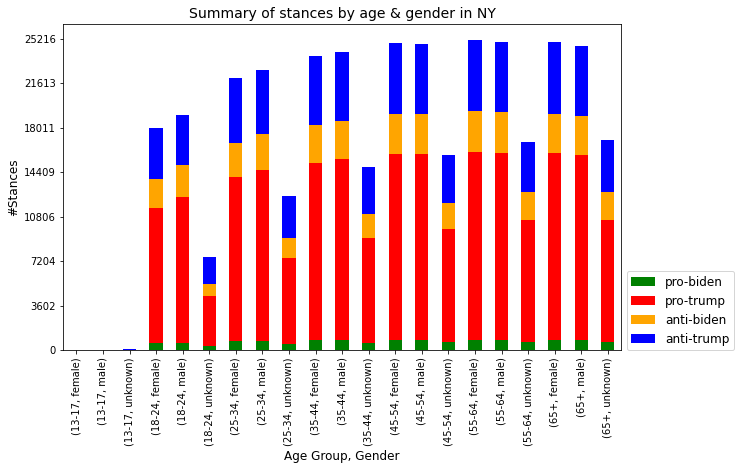

In [102]:
bt=bt2.groupby(['age_distribution', 'gender','pred_stance']).agg(stance=('id','count')).unstack()
bt.head()
g = bt.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['green', 'red', 'orange', 'blue']);
plt.title('Summary of stances by age & gender in NY', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Stances', fontsize=12);
plt.xticks(rotation=90)
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
#plt.savefig("image/age_gender_stance.png", dpi=300, bbox_inches = "tight") 
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/13.88]

g.set_yticklabels(ylabels)
plt.savefig("image/cor_NY_age_gender.png", dpi=300, bbox_inches = "tight") 
plt.show()

<ipython-input-108-dd84571cc8de>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


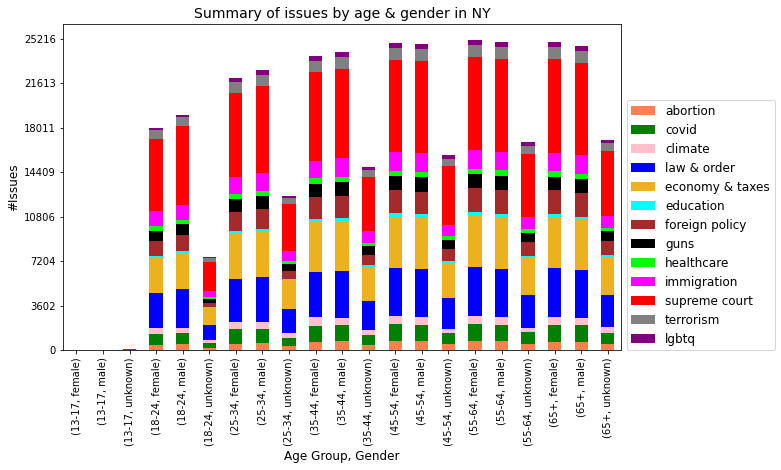

In [108]:
bt=bt2.groupby(['age_distribution', 'gender','pred_issue']).agg(stance=('id','count')).unstack()
bt.head()
g = bt.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['coral', 'green', 'pink', 'blue', '#EDB120', 'cyan', 'brown', 'black', 'lime', 'magenta', 'red', 'gray','purple']);
plt.title('Summary of issues by age & gender in NY', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Issues', fontsize=12);
plt.xticks(rotation=90)
newnames = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/13.88]
g.set_yticklabels(ylabels)
plt.savefig("image/cor_NY_age_gender_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()

### Red state - ID, gender distribution

In [163]:
##### Demographic gender #ID
# demo_genders:
#   - male
#   - female
#   - unknown

ad_id = []
stance_p = []
text = []
fe = []
gender = []
issue_p = []

for j in range (0, top_red.shape[0] ):
    list_dic = eval(top_red['demographic_distribution'][j])
    for i in range (0, len(list_dic)):
        #print(list_dic[i])  
        dic = list_dic[i]
        #print(dic['age'] )
        #sys.exit()
        
        if dic['gender'] == 'male' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
            
        elif dic['gender'] == 'female' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        elif dic['gender'] == 'unknown' :
            ad_id.append(top_red.id[j])
            text.append(top_red.ad_creative_body[j])
            fe.append(top_red.funding_entity[j])
            gender.append(dic['gender'])
            stance_p.append(top_red.pred_stance[j])
            issue_p.append(top_red.pred_issue[j])
        

In [164]:
red_gender = pd.DataFrame({'id': ad_id, 'ad_creative_body': text, 'funding_entity': fe, 
                             'gender_distribution': gender, 'pred_stance' : stance_p, 'pred_issue' : issue_p
                            }) 

In [165]:
new_red_gender = red_gender[red_gender.pred_stance != -1]
new_red_gender = new_red_gender.reset_index(drop=True)
new_red_gender

,id,ad_creative_body,funding_entity,gender_distribution,pred_stance,pred_issue
0,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,female,2,3
1,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,male,2,3
2,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,male,2,3
3,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,female,2,3
4,696114684345232,"After FOUR DECADES in the Washington Swamp, Jo...",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,male,2,3
...,...,...,...,...,...,...
6882,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,female,0,2
6883,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,female,0,2
6884,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,male,0,2
6885,3917411804969983,"Hi, this is Campaign Manager Jen O’Malley Dill...",BIDEN VICTORY FUND,female,0,2


In [166]:
dfc = new_red_gender.groupby(['gender_distribution', 'pred_stance']).agg({'id': 'count'}).unstack()
dfc

id                      
pred_stance             0       1      2      3
gender_distribution                            
female               28.0  2232.0  286.0  506.0
male                 19.0  2548.0  385.0  383.0
unknown               NaN   426.0   22.0   52.0

In [167]:
new_red_gender.id.nunique() #1406

1406

<ipython-input-168-25afa5ff2f8b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


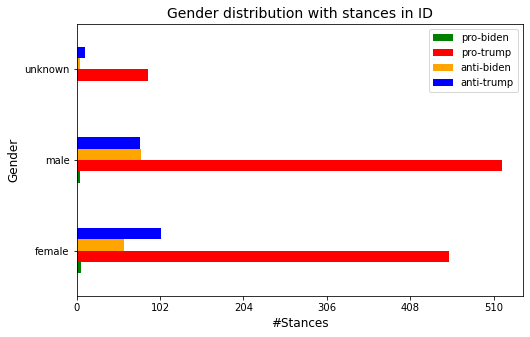

In [168]:
g = dfc.plot(kind='barh', figsize=(8,5), width = 0.5, color=['green', 'red', 'orange', 'blue']);
plt.title('Gender distribution with stances in ID', fontsize=14);
plt.xlabel('#Stances', fontsize=12);
plt.ylabel('Gender', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
#xlabels = ['{}'.format(x) + 'K' for x in g.get_xticks()/1000]
xlabels = ['{}'.format(int(x)) for x in g.get_xticks()/4.9]
g.set_xticklabels(xlabels)
g.legend(newnames,loc=(1), fontsize=10)
#g.get_legend().remove()
plt.savefig("image/gen_ID.png", dpi=300, bbox_inches = "tight") 
plt.show()

In [66]:
age_red['gender'] = gender
age_red

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue,gender
0,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,18-24,3,4,unknown
1,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,25-34,3,4,unknown
2,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,35-44,3,4,female
3,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,18-24,3,4,female
4,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,35-44,3,4,male
...,...,...,...,...,...,...,...
4583209,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,male
4583210,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,female
4583211,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,25-34,0,10,female
4583212,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10,unknown


In [67]:
rt1 = age_red[age_red.pred_stance != -1]
rt2 = rt1[rt1.pred_issue != -1]
rt2 = rt2.reset_index(drop=True)
rt2

,id,ad_creative_body,funding_entity,age_distribution,pred_stance,pred_issue,gender
0,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,18-24,3,4,unknown
1,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,25-34,3,4,unknown
2,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,35-44,3,4,female
3,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,18-24,3,4,female
4,356082002354620,"COVID-19 is rising in Florida, and Trump has n...",Independence USA PAC,35-44,3,4,male
...,...,...,...,...,...,...,...
4277408,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,male
4277409,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,35-44,0,10,female
4277410,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,25-34,0,10,female
4277411,681457645825247,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,65+,0,10,unknown


In [73]:
rt2.id.nunique() #286649

286649

[     0.  50000. 100000. 150000. 200000. 250000. 300000.] 1050000.0 [    0.          3351.20643432  6702.41286863 10053.61930295
 13404.82573727 16756.03217158 20107.2386059 ] 70000.0


<ipython-input-103-ef6a7394663c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


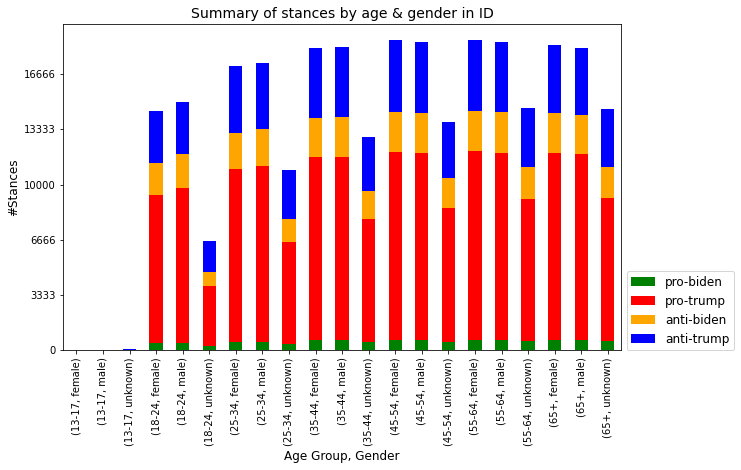

In [103]:
rt=rt2.groupby(['age_distribution', 'gender','pred_stance']).agg(stance=('id','count')).unstack()
rt.head()
g = rt.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['green', 'red', 'orange', 'blue']);
plt.title('Summary of stances by age & gender in ID', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Stances', fontsize=12);
plt.xticks(rotation=90)
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
print(g.get_yticks(), sum (g.get_yticks()), g.get_yticks()/14.92, sum (g.get_yticks()/15))
#plt.savefig("image/age_gender_stance.png", dpi=300, bbox_inches = "tight") 
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/15]

g.set_yticklabels(ylabels)
plt.savefig("image/cor_ID_age_gender.png", dpi=300, bbox_inches = "tight") 
plt.show()

<ipython-input-109-1cb257546b1d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


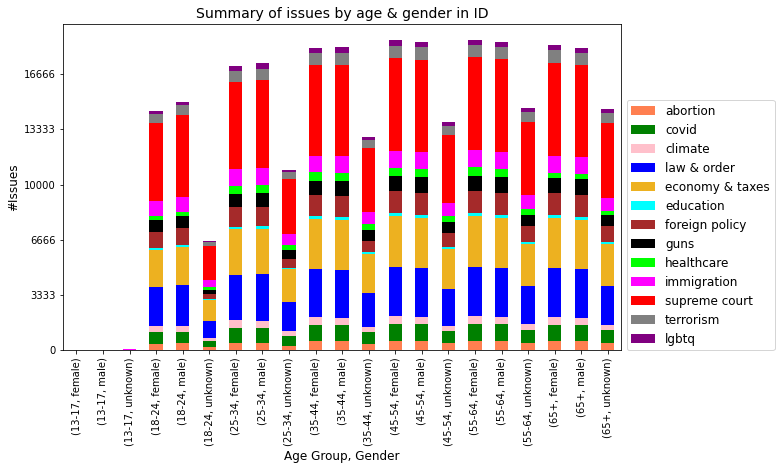

In [109]:
rt=rt2.groupby(['age_distribution', 'gender','pred_issue']).agg(stance=('id','count')).unstack()
rt.head()
g = rt.plot(kind='bar', figsize=(10,6), width = 0.5, stacked=True, color=['coral', 'green', 'pink', 'blue', '#EDB120', 'cyan', 'brown', 'black', 'lime', 'magenta', 'red', 'gray','purple']);
plt.title('Summary of issues by age & gender in ID', fontsize=14);
plt.xlabel('Age Group, Gender', fontsize=12);
plt.ylabel('#Issues', fontsize=12);
plt.xticks(rotation=90)
newnames = ['abortion', 'covid', 'climate', 'law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
plt.legend(newnames,loc=(1.01,0), fontsize=12)
ylabels = ['{}'.format(int(y)) for y in g.get_yticks()/15]
g.set_yticklabels(ylabels)
plt.savefig("image/cor_ID_age_gender_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()

## Temporal Analysis

In [169]:
new_pred = predicted_fb_all[predicted_fb_all.pred_issue != -1]
temp = new_pred[new_pred.pred_stance != -1]
temp = temp.reset_index(drop = True)
#temp

In [170]:
hi = temp[temp.pred_stance != -1]
fi = hi[hi.pred_issue != -1]
fi.avg_imp.sum()/1000000 


11733.104273

In [171]:
avg_imp = []
avg_spend = []
for j in range (0, temp.shape[0] ):
    dic_imp = eval(temp['impressions'][j])
    dic_cost = eval(temp['spend'][j])
    dic_imp_new = dict([k, float(v)] for k, v in dic_imp.items()) 
    dic_cost_new = dict([k, float(v)] for k, v in dic_cost.items()) 
    #print(dic_imp_new) 
    imp = sum(dic_imp_new.values()) / len(dic_imp_new)
    avg_imp.append(imp) # avg of impression
    cost = sum(dic_cost_new.values()) / len(dic_cost_new)
    avg_spend.append(cost) # avg of spend

In [172]:
temp['avg_imp'] = avg_imp
temp['avg_spend'] = avg_spend
temp['date']= pd.to_datetime(temp['ad_delivery_start_time']) #convert string to date-time

In [231]:
# #new_temp = temp.loc[(temp['pred_issue'] == 0 )]
# new_temp = temp.loc[(temp['pred_issue'] == 0) | 
#                       (temp['pred_issue'] == 3)]


In [232]:
# new_temp

In [233]:

# grp_temp = temp.groupby([ 'pred_stance' , 'date']).agg({'avg_imp': 'sum'})
# print(grp_temp)

In [234]:

# pb = temp.resample('W-MON', on='date').avg_imp.sum()
# pb

## Timeseries of impressions based on 4 stances

In [173]:
#Group by on stance and then resample 'weekly' on date and sum up average impression

# grp_temp = temp.groupby('pred_stance').resample('W-MON', on='date').agg({'avg_imp': 'sum'})
# print(grp_temp, grp_temp.shape) #169
# grp_temp.to_csv("data/bl.csv")

grp_temp = temp.pivot_table('avg_imp', index='date', columns='pred_stance', aggfunc='sum')
grp_temp

pred_stance,0,1,2,3
date,,,,
2020-01-01,9499.5,6999.0,NaN,8999.0
2020-01-02,NaN,12999.0,115498.5,2499.5
2020-01-03,NaN,NaN,NaN,766979.5
2020-01-04,NaN,NaN,112499.5,1498.5
2020-01-05,NaN,32499.5,NaN,2997.0
...,...,...,...,...
2020-10-31,20996883.5,22474818.0,3429652.0,5979282.5
2020-11-01,13835274.0,3040446.0,6539075.5,18641819.0
2020-11-02,3933833.0,8695740.5,5717440.0,2148404.0


<ipython-input-185-f3f466269ada>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


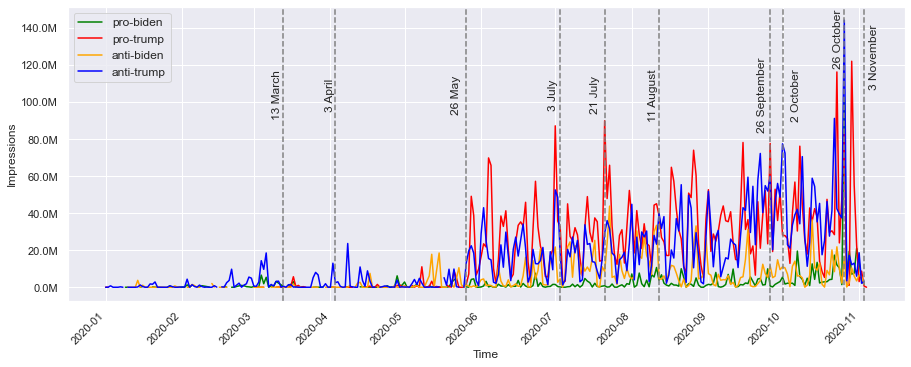

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
sns.set()  # use Seaborn styles
g = grp_temp.plot(kind='line', figsize=(15,6), color=['green', 'red', 'orange', 'blue'])
plt.xlabel('Time', fontsize=12);
plt.ylabel('Impressions', fontsize=12);
newnames = ['pro-biden', 'pro-trump', 'anti-biden', 'anti-trump' ]
ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(2), fontsize=12)
plt.xticks(rotation = 45)
# add vertical line
#plt.vlines(x=16.5, ymin=0, ymax=5, color='gray', label='political event')
#trans = g.get_xaxis_transform()

# March 13, President Trump called a national emergency, due to COVID-19.
g.axvline("2020-03-13", color="gray", linestyle="dashed")
plt.text(0.25, 0.7, '13 March', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#On April 3, President Trump fired Michael Atkinson, a senior official. 
g.axvline("2020-04-03", color="gray", linestyle="dashed")
plt.text(0.314, 0.7, '3 April', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#BLM -- May 26, 2020
g.axvline("2020-05-26", color="gray", linestyle="dashed")
#plt.text("2020-05-26", .7, 'May 26', transform=trans)
plt.text(0.464, 0.7, '26 May', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #June 2 Blackout Tuesday
# g.axvline("2020-06-02", color="gray", linestyle="dashed")
# plt.text(0.51, 0.7, '2 June', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# July 3, Trump holds a campaign rally at taxpayer expense at Mount Rushmore, South Dakota, as social distancing is ignored and few mask are worn by the 7,500 participants
g.axvline("2020-07-03", color="gray", linestyle="dashed")
plt.text(0.58, 0.7, '3 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#On July 22, it was announced that the Chinese consulate in Houston will close. 
#US Secretary of State Mike Pompeo stated the decision came after it was revealed that China was ?stealing? intellectual property. China condemned the decision, and various people can be seen burning papers outside the Houston consulate
# July 21, Twitter bans 7,000 QAnon accounts and limits 150,000 others.
g.axvline("2020-07-21", color="gray", linestyle="dashed")
plt.text(0.63, 0.7, '21 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#11 August Joe Biden Announces Running Mate Kamala Harris, the first African American woman to serve in the role
g.axvline("2020-08-12", color="gray", linestyle="dashed")
#plt.text("2020-08-12", .7, 'August 12', transform=trans)
plt.text(0.7, 0.7, '11 August', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#g.axvline("2020-09-16", color="gray", linestyle="dashed")

#President Trump Appoint Amy Coney Barrett = September 26, 2020 
g.axvline("2020-09-26", color="gray", linestyle="dashed")
plt.text(0.83, 0.7, '26 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

# #President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden
# g.axvline("2020-09-29", color="gray", linestyle="dashed")
# plt.text(0.86, 0.7, '29 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance
g.axvline("2020-10-01", color="gray", linestyle="dashed")
plt.text(.87, .7, '2 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# October 22, the second 2020 presidential debate takes place in Nashville, Tennessee.
#October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.
g.axvline("2020-10-26", color="gray", linestyle="dashed")
plt.text(.92, .89, '26 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #On October 25, Vice President Mike Pence have tested positive for coronavirus.
# g.axvline("2020-10-25", color="gray", linestyle="dashed")
# plt.text(.91, .83, '25 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #On October 27, police in Philadelphia fatally shot a black man = October 27
# g.axvline("2020-10-27", color="gray", linestyle="dashed")
# plt.text(.91, .83, '27 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# US 2020 election
g.axvline("2020-11-03", color="gray", linestyle="dashed")
plt.text(.964, .83, '3 November',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


plt.savefig("image/temporal_imp_stance.png", dpi=300, bbox_inches = "tight") 
plt.show()

###### Major events 

## collected from : https://www.infoplease.com/june-2020-current-events-us-news

March 13, President Trump called a national emergency, due to COVID-19.

On April 4, President Trump fired Michael Atkinson, a senior official. It is believed that Atkinson is the whistleblower that began the impeachment process of President Trump. 

blm protest start date = May 26, 2020 -- stance

Black Lives Matter Leads to Reforms = June 27, 2020 -- stance

July 2, 2020 Several states, including California and Indiana, postpone or reverse plans to reopen their economies, as the United States records 50,000 new cases of COVID-19—the largest one-day spike since the pandemic’s onset.

Joe Biden Announces Running Mate Kamala Harris who is a strong advocate for diversity and equality = August 11, 2020 

Protests Against Police Brutality Continue = August 24, 2020

President Trump to Appoint Amy Coney Barrett = September 26, 2020 

September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden

President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance

Trump Administration Imposes Restrictions on H-1B Visa as a result of the high unemployment rate in the country = October 7, 2020 -- anti-trump

October 19 various states reported record-breaking numbers regarding early votes ahead of the November 3 election. Many states have seen a dramatic increase in the number of absentee ballots. States are also seeing a boom in US postal ballot requests. So far, registered Democrats have voted more than registered Republicans. 

October 22 - The second 2020 presidential debate takes place in Nashville, Tennessee.

On October 25, Vice President Mike Pence have tested positive for coronavirus.

On October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.[385]


On October 26, police in Philadelphia fatally shot a black man = October 27




## Timeseries of impressions based on issues

In [191]:
temp

,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para,avg_imp,avg_spend,date
0,760713291157800,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.508772', 'age': '25-34', 'g...",3,2,2,499.5,49.5,2020-09-23
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0,499.5,49.5,2020-09-23
3,653784258879707,"Trump is a ""climate arsonist"" and ""climate den...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.001443', 'age': '18-24', 'g...",3,2,2,1499.5,49.5,2020-09-23
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811084,826169988159765,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Virginia'}]","[{'percentage': '0.089286', 'age': '18-24', 'g...",0,2,0,499.5,49.5,2020-10-26
811085,947699922418371,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Georgia'}]","[{'percentage': '0.153846', 'age': '25-34', 'g...",0,2,0,499.5,49.5,2020-10-26
811086,349059406397986,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-29,"{'lower_bound': '1000', 'upper_bound': '1999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Texas'}]","[{'percentage': '0.000573', 'age': '25-34', 'g...",0,2,0,1499.5,49.5,2020-10-26
811087,351032559507313,🗣 🗣 An important message from your union:\n\nH...,AFL-CIO,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.333333', 'age': '25-34', 'g...",0,2,0,499.5,49.5,2020-10-26


In [198]:
temp['pred_issue'].value_counts().head(5)

10    272862
3     128017
4      94313
11     55113
1      54222
Name: pred_issue, dtype: int64

In [200]:
top5_issue = temp.loc[(temp.pred_issue == 10) | (temp.pred_issue == 3) | (temp.pred_issue == 4) | (temp.pred_issue == 11) | (temp.pred_issue == 1)]


top5_issue



,id,ad_creative_body,funding_entity,ad_delivery_start_time,ad_delivery_stop_time,impressions,spend,region_distribution,demographic_distribution,pred_stance,pred_issue,pred_stance_para,avg_imp,avg_spend,date
1,780204089445065,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.063973', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
2,3789635211066136,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.06383', 'age': '35-44', 'ge...",2,3,0,499.5,49.5,2020-09-23
4,706426256619411,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.002273', 'age': '18-24', 'g...",2,3,2,499.5,49.5,2020-09-23
5,784599888779200,"Biden joins his running mate, Sen. Kamala Harr...",ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '1', 'region': 'Wisconsin'}]","[{'percentage': '0.032787', 'age': '35-44', 'g...",2,3,0,499.5,49.5,2020-09-23
7,810003639786906,The former vice president emphasized his commi...,ACRONYM,2020-09-23,2020-10-02,"{'lower_bound': '4000', 'upper_bound': '4999'}","{'lower_bound': '100', 'upper_bound': '199'}","[{'percentage': '1', 'region': 'Pennsylvania'}]","[{'percentage': '0.000543', 'age': '25-34', 'g...",2,3,2,4499.5,149.5,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811070,2558726044418112,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.333333', 'region': 'Califor...","[{'percentage': '0.333333', 'age': '55-64', 'g...",0,10,0,499.5,49.5,2020-10-26
811071,2997002313735160,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-03,"{'lower_bound': '35000', 'upper_bound': '39999'}","{'lower_bound': '1000', 'upper_bound': '1499'}","[{'percentage': '0.003499', 'region': 'Mississ...","[{'percentage': '0.000838', 'age': '35-44', 'g...",0,10,0,37499.5,1249.5,2020-10-26
811072,348424536442015,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-11-01,"{'lower_bound': '250000', 'upper_bound': '2999...","{'lower_bound': '10000', 'upper_bound': '14999'}","[{'percentage': '0.008934', 'region': 'Alabama...","[{'percentage': '0.000468', 'age': '25-34', 'g...",0,10,0,274999.5,12499.5,2020-10-26
811073,2765797337011737,You’ve heard from Joe. You’ve heard from Kamal...,BIDEN VICTORY FUND,2020-10-26,2020-10-26,"{'lower_bound': '0', 'upper_bound': '999'}","{'lower_bound': '0', 'upper_bound': '99'}","[{'percentage': '0.1', 'region': 'California'}...","[{'percentage': '0.1', 'age': '55-64', 'gender...",0,10,0,499.5,49.5,2020-10-26


In [214]:
grp_temp_issue = temp.pivot_table('avg_imp', index='date', columns='pred_issue', aggfunc='sum')
#grp_temp_issue = top5_issue.pivot_table('avg_imp', index='date', columns='pred_issue', aggfunc='sum')

In [215]:
grp_temp_issue

pred_issue,0,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9499.5,NaN,11498.5,4499.5,NaN
2020-01-02,NaN,NaN,2499.5,112999.0,NaN,NaN,NaN,NaN,NaN,NaN,2999.0,NaN,12499.5
2020-01-03,NaN,NaN,NaN,12499.5,199481.5,NaN,549999.5,NaN,NaN,NaN,NaN,4999.0,NaN
2020-01-04,NaN,499.5,NaN,112499.5,NaN,NaN,NaN,NaN,NaN,NaN,999.0,NaN,NaN
2020-01-05,NaN,NaN,NaN,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,33498.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,692995.0,623319.5,2475897.5,17625420.5,6203266.5,323489.5,622836.5,215475.5,2128434.0,1030938.0,17178831.0,3747233.0,12499.5
2020-11-01,295497.0,863469.5,105490.5,7773931.0,26437297.5,22997.0,677450.5,8494.5,477982.0,69990.0,2098550.5,1415471.0,1809993.5
2020-11-02,9498.5,86995.5,22497.5,7439882.0,3706841.5,30998.0,23498.5,4495.5,570485.5,146484.5,8281245.0,172495.5,NaN


<ipython-input-220-3d70204e531c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


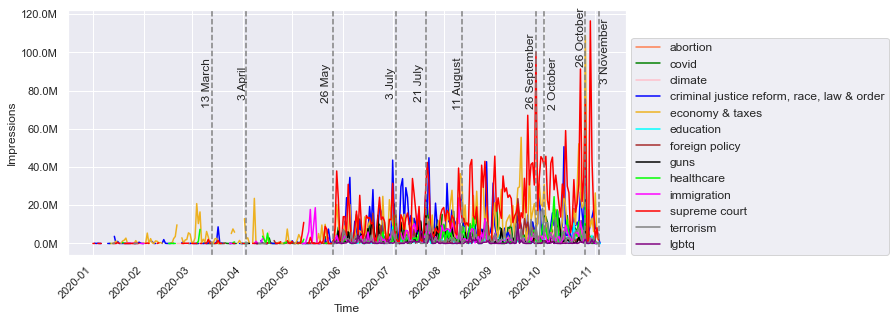

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles
g = grp_temp_issue.plot(kind='line', figsize=(10,5), color=['coral', 'green', 'pink', 'blue', '#EDB120', 'cyan', 'brown', 'black', 'lime', 'magenta', 'red', 'gray','purple'])
#g = grp_temp_issue.plot(kind='line', figsize=(10,5), color=['cyan', 'green', 'orange', 'blue', 'red'])
plt.xlabel('Time', fontsize=12);
plt.ylabel('Impressions', fontsize=12);
newnames = ['abortion', 'covid', 'climate', 'criminal justice reform, race, law & order', 'economy & taxes', 'education', 'foreign policy', 'guns', 'healthcare', 'immigration', 'supreme court', 'terrorism', 'lgbtq']
#newnames = [ 'covid', 'criminal justice reform, race, law & order', 'economy & taxes',  'supreme court', 'terrorism']
ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels)
# g.legend(newnames,loc=(1.01, 0), fontsize=12)
# plt.xticks(rotation = 45)
# #g.get_legend().remove()
# #plt.savefig("image/temporal_imp_issue.png", dpi=300, bbox_inches = "tight") 
# plt.show()

g.set_yticklabels(ylabels)
g.legend(newnames,loc=(2), fontsize=12)
plt.xticks(rotation = 45)
# add vertical line
#plt.vlines(x=16.5, ymin=0, ymax=5, color='gray', label='political event')
#trans = g.get_xaxis_transform()

# March 13, President Trump called a national emergency, due to COVID-19.
g.axvline("2020-03-13", color="gray", linestyle="dashed")
plt.text(0.25, 0.7, '13 March', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#On April 3, President Trump fired Michael Atkinson, a senior official. 
g.axvline("2020-04-03", color="gray", linestyle="dashed")
plt.text(0.314, 0.7, '3 April', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#BLM -- May 26, 2020
g.axvline("2020-05-26", color="gray", linestyle="dashed")
#plt.text("2020-05-26", .7, 'May 26', transform=trans)
plt.text(0.464, 0.7, '26 May', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #June 2 Blackout Tuesday
# g.axvline("2020-06-02", color="gray", linestyle="dashed")
# plt.text(0.51, 0.7, '2 June', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# July 3, Trump holds a campaign rally at taxpayer expense at Mount Rushmore, South Dakota, as social distancing is ignored and few mask are worn by the 7,500 participants
g.axvline("2020-07-03", color="gray", linestyle="dashed")
plt.text(0.58, 0.7, '3 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


#On July 22, it was announced that the Chinese consulate in Houston will close. 
#US Secretary of State Mike Pompeo stated the decision came after it was revealed that China was ?stealing? intellectual property. China condemned the decision, and various people can be seen burning papers outside the Houston consulate
# July 21, Twitter bans 7,000 QAnon accounts and limits 150,000 others.
g.axvline("2020-07-21", color="gray", linestyle="dashed")
plt.text(0.63, 0.7, '21 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



#11 August Joe Biden Announces Running Mate Kamala Harris, the first African American woman to serve in the role
g.axvline("2020-08-12", color="gray", linestyle="dashed")
#plt.text("2020-08-12", .7, 'August 12', transform=trans)
plt.text(0.7, 0.7, '11 August', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#g.axvline("2020-09-16", color="gray", linestyle="dashed")

#President Trump Appoint Amy Coney Barrett = September 26, 2020 
g.axvline("2020-09-26", color="gray", linestyle="dashed")
plt.text(0.83, 0.75, '26 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

# #President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden
# g.axvline("2020-09-29", color="gray", linestyle="dashed")
# plt.text(0.86, 0.7, '29 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

#President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance
g.axvline("2020-10-01", color="gray", linestyle="dashed")
plt.text(.87, .7, '2 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# October 22, the second 2020 presidential debate takes place in Nashville, Tennessee.
#October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.
g.axvline("2020-10-26", color="gray", linestyle="dashed")
plt.text(.92, .89, '26 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #On October 25, Vice President Mike Pence have tested positive for coronavirus.
# g.axvline("2020-10-25", color="gray", linestyle="dashed")
# plt.text(.91, .83, '25 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #On October 27, police in Philadelphia fatally shot a black man = October 27
# g.axvline("2020-10-27", color="gray", linestyle="dashed")
# plt.text(.91, .83, '27 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# US 2020 election
g.axvline("2020-11-03", color="gray", linestyle="dashed")
plt.text(.964, .83, '3 November',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)
g.legend(newnames,loc=(1.01, 0), fontsize=12)

plt.savefig("image/temporal_imp_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()


## poll data
### https://projects.fivethirtyeight.com/2020-general-data/presidential_poll_averages_2020.csv
### details here: https://github.com/fivethirtyeight/data/tree/master/election-forecasts-2020

#### pct_estimate = Polling average for the candidate listed in candidate_name on modeldate

In [147]:
# ### Load poll data
poll = pd.read_csv( 'data/presidential_poll_averages_2020.csv',low_memory=False) 
poll #29085 rows × 6 columns

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101
...,...,...,...,...,...,...
29080,2020,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325
29081,2020,Colorado,2/27/2020,Donald Trump,44.27899,44.07662
29082,2020,California,2/27/2020,Donald Trump,34.66504,34.69761
29083,2020,Arizona,2/27/2020,Donald Trump,47.79450,48.07208


In [148]:
poll['date']= pd.to_datetime(poll['modeldate']) #convert string to date-time
poll

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted,date
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599,2020-11-03
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584,2020-11-03
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517,2020-11-03
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408,2020-11-03
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101,2020-11-03
...,...,...,...,...,...,...,...
29080,2020,Connecticut,2/27/2020,Donald Trump,33.66370,34.58325,2020-02-27
29081,2020,Colorado,2/27/2020,Donald Trump,44.27899,44.07662,2020-02-27
29082,2020,California,2/27/2020,Donald Trump,34.66504,34.69761,2020-02-27
29083,2020,Arizona,2/27/2020,Donald Trump,47.79450,48.07208,2020-02-27


In [149]:
grp_poll = poll.pivot_table('pct_estimate', index='date', columns='candidate_name', aggfunc='sum')

In [150]:
grp_poll

candidate_name,Convention Bounce for Donald Trump,Convention Bounce for Joseph R. Biden Jr.,Donald Trump,Joseph R. Biden Jr.
date,,,,
2020-02-27,NaN,NaN,1469.716190,1428.02355
2020-02-28,NaN,NaN,1523.854630,1470.34322
2020-02-29,NaN,NaN,1523.834290,1470.31869
2020-03-01,NaN,NaN,1524.369780,1471.39732
2020-03-02,NaN,NaN,1524.229280,1471.06990
...,...,...,...,...
2020-10-30,2258.00179,2246.55969,2495.264048,2769.07493
2020-10-31,2256.16503,2244.74233,2500.143010,2772.52089
2020-11-01,2253.64880,2243.04322,2508.531062,2777.79229


In [168]:

new_poll = grp_poll.drop(columns=['Convention Bounce for Donald Trump', 'Convention Bounce for Joseph R. Biden Jr.'])
new_poll

candidate_name,Donald Trump,Joseph R. Biden Jr.
date,,
2020-02-27,1469.716190,1428.02355
2020-02-28,1523.854630,1470.34322
2020-02-29,1523.834290,1470.31869
2020-03-01,1524.369780,1471.39732
2020-03-02,1524.229280,1471.06990
...,...,...
2020-10-30,2495.264048,2769.07493
2020-10-31,2500.143010,2772.52089
2020-11-01,2508.531062,2777.79229


<ipython-input-169-07facbb1d259>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


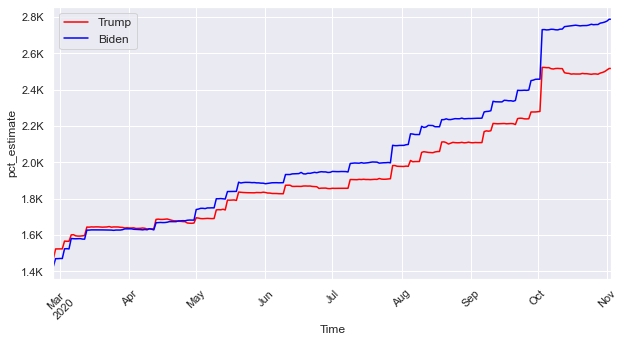

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles
g = new_poll.plot(kind='line', figsize=(10,5), color=['red', 'blue'])
plt.xlabel('Time', fontsize=12);
plt.ylabel('pct_estimate', fontsize=12);
newnames = ['Trump', 'Biden']
ylabels = ['{}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
g.legend(newnames,loc=(2), fontsize=12)
plt.xticks(rotation = 45)
#g.get_legend().remove()
#plt.savefig("image/temporal_imp_issue.png", dpi=300, bbox_inches = "tight") 
plt.show()


In [177]:
#replace nan with 0 in pandas
fb = grp_temp.fillna(0)
fb

pred_stance,0,1,2,3
date,,,,
2020-01-01,9499.5,6999.0,0.0,8999.0
2020-01-02,0.0,12999.0,115498.5,2499.5
2020-01-03,0.0,0.0,0.0,766979.5
2020-01-04,0.0,0.0,112499.5,1498.5
2020-01-05,0.0,32499.5,0.0,2997.0
...,...,...,...,...
2020-10-31,20996883.5,22474818.0,3429652.0,5979282.5
2020-11-01,13835274.0,3040446.0,6539075.5,18641819.0
2020-11-02,3933833.0,8695740.5,5717440.0,2148404.0


In [178]:
sum_trump = fb[1] + fb[2]
sum_biden = fb[0] + fb[3]
fb["ad_trump"] = sum_trump
fb["ad_biden"] = sum_biden
fb

pred_stance,0,1,2,3,ad_trump,ad_biden
date,,,,,,
2020-01-01,9499.5,6999.0,0.0,8999.0,6999.0,18498.5
2020-01-02,0.0,12999.0,115498.5,2499.5,128497.5,2499.5
2020-01-03,0.0,0.0,0.0,766979.5,0.0,766979.5
2020-01-04,0.0,0.0,112499.5,1498.5,112499.5,1498.5
2020-01-05,0.0,32499.5,0.0,2997.0,32499.5,2997.0
...,...,...,...,...,...,...
2020-10-31,20996883.5,22474818.0,3429652.0,5979282.5,25904470.0,26976166.0
2020-11-01,13835274.0,3040446.0,6539075.5,18641819.0,9579521.5,32477093.0
2020-11-02,3933833.0,8695740.5,5717440.0,2148404.0,14413180.5,6082237.0


In [179]:
fb = fb.drop(columns=[0,1,2,3])
fb

pred_stance,ad_trump,ad_biden
date,,
2020-01-01,6999.0,18498.5
2020-01-02,128497.5,2499.5
2020-01-03,0.0,766979.5
2020-01-04,112499.5,1498.5
2020-01-05,32499.5,2997.0
...,...,...
2020-10-31,25904470.0,26976166.0
2020-11-01,9579521.5,32477093.0
2020-11-02,14413180.5,6082237.0


<ipython-input-182-dac48c1f8638>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


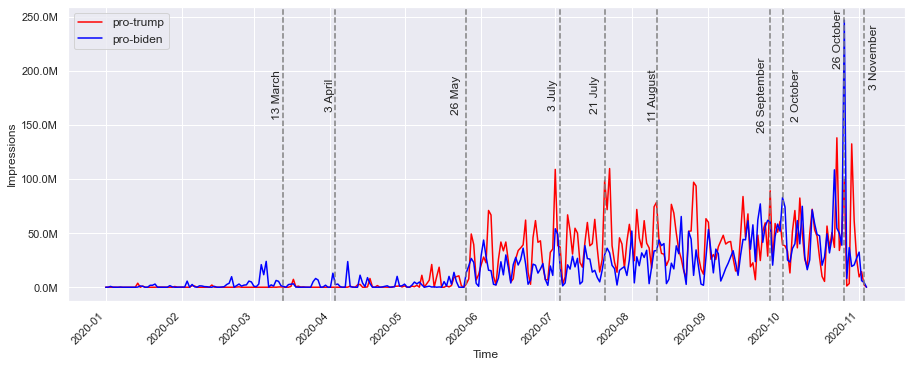

In [182]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.transforms as transforms
# sns.set()  # use Seaborn styles
# g = fb.plot(kind='line', figsize=(15,6), color=['red', 'blue'])
# plt.xlabel('Time', fontsize=12);
# plt.ylabel('Impressions', fontsize=12);
# newnames = ['pro-trump', 'pro-biden']
# ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
# g.set_yticklabels(ylabels)
# g.legend(newnames,loc=(2), fontsize=12)
# plt.xticks(rotation = 45)
# # add vertical line
# #plt.vlines(x=16.5, ymin=0, ymax=5, color='gray', label='political event')
# #trans = g.get_xaxis_transform()

# # March 13, President Trump called a national emergency, due to COVID-19.
# g.axvline("2020-03-13", color="gray", linestyle="dashed")
# plt.text(0.25, 0.7, '13 March', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



# #On April 3, President Trump fired Michael Atkinson, a senior official. 
# g.axvline("2020-04-03", color="gray", linestyle="dashed")
# plt.text(0.314, 0.7, '3 April', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# #BLM -- May 26, 2020
# g.axvline("2020-05-26", color="gray", linestyle="dashed")
# #plt.text("2020-05-26", .7, 'May 26', transform=trans)
# plt.text(0.464, 0.7, '26 May', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #June 2 Blackout Tuesday
# # g.axvline("2020-06-02", color="gray", linestyle="dashed")
# # plt.text(0.51, 0.7, '2 June', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# # July 3, Trump holds a campaign rally at taxpayer expense at Mount Rushmore, South Dakota, as social distancing is ignored and few mask are worn by the 7,500 participants
# g.axvline("2020-07-03", color="gray", linestyle="dashed")
# plt.text(0.58, 0.7, '3 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# #On July 22, it was announced that the Chinese consulate in Houston will close. 
# #US Secretary of State Mike Pompeo stated the decision came after it was revealed that China was ?stealing? intellectual property. China condemned the decision, and various people can be seen burning papers outside the Houston consulate
# # July 21, Twitter bans 7,000 QAnon accounts and limits 150,000 others.
# g.axvline("2020-07-21", color="gray", linestyle="dashed")
# plt.text(0.63, 0.7, '21 July', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)



# #11 August Joe Biden Announces Running Mate Kamala Harris, the first African American woman to serve in the role
# g.axvline("2020-08-11", color="gray", linestyle="dashed")
# #plt.text("2020-08-12", .7, 'August 12', transform=trans)
# plt.text(0.7, 0.7, '11 August', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #g.axvline("2020-09-16", color="gray", linestyle="dashed")

# #President Trump Appoint Amy Coney Barrett = September 26, 2020 
# g.axvline("2020-09-26", color="gray", linestyle="dashed")
# plt.text(0.83, 0.7, '26 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #September 27 - A New York Times report on President Trump's personal and business tax returns alleges years of tax avoidance and millions in debt and IRS penalties, among other allegations.

# # #President Trump and presidential candidate Joe Biden had the first debate = September 29,2020 -- pro-biden
# # g.axvline("2020-09-29", color="gray", linestyle="dashed")
# # plt.text(0.86, 0.7, '29 September', rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# #President Trump and his wife, First Lady Melania, both tested positive for COVID = October 2, 2020 -- stance
# g.axvline("2020-10-01", color="gray", linestyle="dashed")
# plt.text(.87, .7, '2 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # October 22, the second 2020 presidential debate takes place in Nashville, Tennessee.
# #October 26, Election officials in Pennsylvania report that one-fifth of the state's nine million voters have already cast their votes. 2.9 million mail-in requests were received by October 23.
# g.axvline("2020-10-26", color="gray", linestyle="dashed")
# plt.text(.92, .89, '26 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # # #On October 25, Vice President Mike Pence have tested positive for coronavirus.
# # g.axvline("2020-10-25", color="gray", linestyle="dashed")
# # plt.text(.91, .83, '25 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)

# # #On October 27, police in Philadelphia fatally shot a black man = October 27
# # g.axvline("2020-10-27", color="gray", linestyle="dashed")
# # plt.text(.91, .83, '27 October',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# # US 2020 election
# g.axvline("2020-11-03", color="gray", linestyle="dashed")
# plt.text(.964, .83, '3 November',  rotation = 90, horizontalalignment='center', verticalalignment='center', transform=g.transAxes)


# #plt.savefig("image/temporal_imp_stance.png", dpi=300, bbox_inches = "tight") 
# plt.show()

In [173]:
fb_idx = fb.index
poll_idx = new_poll.index

In [174]:
fb['date'] = fb_idx.values
new_poll['date'] = poll_idx.values

In [178]:
new_poll = new_poll.reset_index(drop=True)
fb = fb.reset_index(drop=True) 

In [179]:
new_poll

candidate_name,Donald Trump,Joseph R. Biden Jr.,date
0,1469.716190,1428.02355,2020-02-27
1,1523.854630,1470.34322,2020-02-28
2,1523.834290,1470.31869,2020-02-29
3,1524.369780,1471.39732,2020-03-01
4,1524.229280,1471.06990,2020-03-02
...,...,...,...
246,2495.264048,2769.07493,2020-10-30
247,2500.143010,2772.52089,2020-10-31
248,2508.531062,2777.79229,2020-11-01
249,2517.120871,2788.06803,2020-11-02


In [180]:
fb

pred_stance,ad_trump,ad_biden,date
0,6999.0,18498.5,2020-01-01
1,128497.5,2499.5,2020-01-02
2,0.0,766979.5,2020-01-03
3,112499.5,1498.5,2020-01-04
4,32499.5,2997.0,2020-01-05
...,...,...,...
302,25904470.0,26976166.0,2020-10-31
303,9579521.5,32477093.0,2020-11-01
304,14413180.5,6082237.0,2020-11-02
305,2230325.5,4498200.0,2020-11-03


In [181]:
#compare two dataframes based on certain column values and remove rest

new_fb = fb.merge(new_poll,how='left').dropna()
new_fb = new_fb.reset_index(drop = True)


In [182]:
new_fb

,ad_trump,ad_biden,date,Donald Trump,Joseph R. Biden Jr.
0,0.0,2207453.5,2020-02-27,1469.716190,1428.02355
1,0.0,5686820.5,2020-02-28,1523.854630,1470.34322
2,0.0,4909377.5,2020-02-29,1523.834290,1470.31869
3,12499.5,981944.5,2020-03-01,1524.369780,1471.39732
4,2999.0,527982.5,2020-03-02,1524.229280,1471.06990
...,...,...,...,...,...
245,61385394.0,20626131.0,2020-10-30,2495.264048,2769.07493
246,25904470.0,26976166.0,2020-10-31,2500.143010,2772.52089
247,9579521.5,32477093.0,2020-11-01,2508.531062,2777.79229
248,14413180.5,6082237.0,2020-11-02,2517.120871,2788.06803


In [188]:
ad_pol = new_fb.rename({'Donald Trump': 'poll_trump', 'Joseph R. Biden Jr.': 'poll_biden'}, axis='columns')


In [190]:
ad_pol

,ad_trump,ad_biden,date,poll_trump,poll_biden
0,0.0,2207453.5,2020-02-27,1469.716190,1428.02355
1,0.0,5686820.5,2020-02-28,1523.854630,1470.34322
2,0.0,4909377.5,2020-02-29,1523.834290,1470.31869
3,12499.5,981944.5,2020-03-01,1524.369780,1471.39732
4,2999.0,527982.5,2020-03-02,1524.229280,1471.06990
...,...,...,...,...,...
245,61385394.0,20626131.0,2020-10-30,2495.264048,2769.07493
246,25904470.0,26976166.0,2020-10-31,2500.143010,2772.52089
247,9579521.5,32477093.0,2020-11-01,2508.531062,2777.79229
248,14413180.5,6082237.0,2020-11-02,2517.120871,2788.06803


## Granger Causality

### Do AdsImpressions Granger-cause Poll count ??
#### Null hypothesis (H0): AdsImpressions do not Granger cause Poll count
#### Alternative Hypothesis (HA) : AdsImpressions Granger-cause Poll count




In [343]:
from statsmodels.tsa.stattools import grangercausalitytests



In [344]:
def do_granger(ac, pc, lags):
    #The data for test whether the time series in the second column Granger causes the time series in the first column.
    input = np.stack((pc, ac), 1) #Do AdsImpressions Granger-cause Poll count ?
    #input = np.stack((ac, pc), 1) #other way..Do Poll counts Granger-cause AdsImpressions ?
   
    gc = grangercausalitytests(input, maxlag = lags ) #outputs all lags
    p_val = []
    F = []
    for key, value in gc.items() :
        #print (key,value)
        #print ("value[0]", value[0])
#         p_val = []
        for k, v in value[0].items() :
            #print("k,v", k,v)
            #print(k)
            #print(v)
            #print(v[0])
            #print(type(v[0]))
            if k == 'ssr_ftest':
                #print(v, type (v))
                #print('p-value', v[1])
                if v[0] < 0.00001:
                    F.append(float(0.0001))
                else:    
                    F.append(v[0])
                p_val.append(v[1])

    print(p_val, F)
                
    return p_val, F    

In [345]:
#######......Granger ............

#For Trump ad and poll
act = np.array(ad_pol.ad_trump)
pct = np.array(ad_pol.poll_trump)

lags = 25
p_valt1, FT1 = do_granger(act, pct, lags)

#For Biden ad and poll
acb = np.array(ad_pol.ad_biden)
pcb = np.array(ad_pol.poll_biden)
p_valb1, FB1 = do_granger(acb, pcb, lags)


    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9926  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9926  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9926  , df=1
parameter F test:         F=0.0001  , p=0.9926  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0068  , p=0.9932  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=0.0140  , p=0.9930  , df=2
likelihood ratio test: chi2=0.0140  , p=0.9930  , df=2
parameter F test:         F=0.0068  , p=0.9932  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0229  , p=0.9953  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=0.0708  , p=0.9951  , df=3
likelihood ratio test: chi2=0.0708  , p=0.9951  , df=3
parameter F test:         F=0.0229  , p=0.9953  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0175  , p=0.9994  

ssr based F test:         F=0.9653  , p=0.4272  , df_denom=237, df_num=4
ssr based chi2 test:   chi2=4.0079  , p=0.4049  , df=4
likelihood ratio test: chi2=3.9756  , p=0.4093  , df=4
parameter F test:         F=0.9653  , p=0.4272  , df_denom=237, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.8791  , p=0.4958  , df_denom=234, df_num=5
ssr based chi2 test:   chi2=4.6021  , p=0.4663  , df=5
likelihood ratio test: chi2=4.5594  , p=0.4720  , df=5
parameter F test:         F=0.8791  , p=0.4958  , df_denom=234, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.7031  , p=0.6474  , df_denom=231, df_num=6
ssr based chi2 test:   chi2=4.4557  , p=0.6152  , df=6
likelihood ratio test: chi2=4.4156  , p=0.6206  , df=6
parameter F test:         F=0.7031  , p=0.6474  , df_denom=231, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.3522  , p=0.2268  , df_denom=228, df_num=7
ssr based chi2 test: 

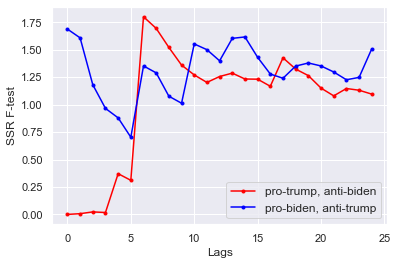

In [352]:
import matplotlib.pyplot as plt
plt.plot(FT1, '.-', color='red',  label='pro-trump, anti-biden')
plt.plot(FB1, '.-', color='blue', label='pro-biden, anti-trump')
plt.xlabel('Lags', fontsize=12)
plt.ylabel('SSR F-test', fontsize=12)
plt.legend(loc=(4), fontsize=12)
#plt.legend()

plt.savefig("image/gc2.png",  bbox_inches = "tight") 
plt.show()

### Now repeat the Granger causality test in the opposite direction.

### Do Poll counts Granger-cause  AdsImpressions  ??
#### Null Hypothesis (H0) : Poll counts do not Granger-cause  AdsImpressions
#### Alternative Hypothesis (HA) : Poll counts Granger-cause  AdsImpressions

In [347]:
def do_grangerAlt(ac, pc, lags):
    #The data for test whether the time series in the second column Granger causes the time series in the first column.
    input = np.stack((ac, pc), 1) #other way..Do Poll counts Granger-cause AdsImpressions ?
   
    gc = grangercausalitytests(input, maxlag = lags ) #outputs all lags
    p_val = []
    F = []
    for key, value in gc.items() :
        #print (key,value)
        #print ("value[0]", value[0])
#         p_val = []
        for k, v in value[0].items() :
            #print("k,v", k,v)
            #print(k)
            #print(v)
            #print(v[0])
            #print(type(v[0]))
            if k == 'ssr_ftest':
                #print(v, type (v))
                #print('p-value', v[1])
                if v[0] < 0.00001:
                    F.append(float(0.0001))
                else:    
                    F.append(v[0])
                p_val.append(v[1])

    print(p_val, F)
                
    return p_val, F    

In [349]:
#For Trump ad and poll
act = np.array(ad_pol.ad_trump)
pct = np.array(ad_pol.poll_trump)

lags = 25
p_valt2, FT2 = do_grangerAlt(act, pct, lags)

#For Biden ad and poll
acb = np.array(ad_pol.ad_biden)
pcb = np.array(ad_pol.poll_biden)
p_valb2, FB2 = do_grangerAlt(acb, pcb, lags)


    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=33.0782 , p=0.0000  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=33.4816 , p=0.0000  , df=1
likelihood ratio test: chi2=31.4140 , p=0.0000  , df=1
parameter F test:         F=33.0782 , p=0.0000  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.5121 , p=0.0000  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=31.6626 , p=0.0000  , df=2
likelihood ratio test: chi2=29.7984 , p=0.0000  , df=2
parameter F test:         F=15.5121 , p=0.0000  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5357  , p=0.0001  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=23.2664 , p=0.0000  , df=3
likelihood ratio test: chi2=22.2349 , p=0.0001  , df=3
parameter F test:         F=7.5357  , p=0.0001  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9151  , p=0.0008  

ssr based F test:         F=2.5876  , p=0.0074  , df_denom=222, df_num=9
ssr based chi2 test:   chi2=25.2813 , p=0.0027  , df=9
likelihood ratio test: chi2=24.0413 , p=0.0042  , df=9
parameter F test:         F=2.5876  , p=0.0074  , df_denom=222, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3203  , p=0.0130  , df_denom=219, df_num=10
ssr based chi2 test:   chi2=25.4282 , p=0.0046  , df=10
likelihood ratio test: chi2=24.1693 , p=0.0072  , df=10
parameter F test:         F=2.3203  , p=0.0130  , df_denom=219, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=2.4057  , p=0.0078  , df_denom=216, df_num=11
ssr based chi2 test:   chi2=29.2805 , p=0.0021  , df=11
likelihood ratio test: chi2=27.6211 , p=0.0037  , df=11
parameter F test:         F=2.4057  , p=0.0078  , df_denom=216, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.9957  , p=0.0259  , df_denom=213, df_num=12
ssr based

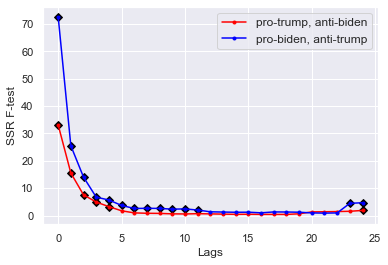

In [351]:
import matplotlib.pyplot as plt
markers_xT = [0, 1, 2, 3, 4, 24]
for i in markers_xT:
    plt.plot(i, FT2[i], 'D', color = 'black')
    
markers_xB = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 24]
for i in markers_xB:
    plt.plot(i, FB2[i], 'D', color = 'black')
    
plt.plot(FT2, '.-', color='red', label='pro-trump, anti-biden')
plt.plot(FB2, '.-', color='blue', label='pro-biden, anti-trump')
plt.xlabel('Lags', fontsize=12)
plt.ylabel('SSR F-test', fontsize=12)
plt.legend(loc=(1), fontsize=12)
#g.legend(newnames,loc=(2), fontsize=12)
plt.savefig("image/gc1.png",  bbox_inches = "tight") 
plt.show()